<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Note-Embedding" data-toc-modified-id="Note-Embedding-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Note Embedding</a></span></li><li><span><a href="#Class-Imbalance" data-toc-modified-id="Class-Imbalance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Class Imbalance</a></span><ul class="toc-item"><li><span><a href="#Class-Weight" data-toc-modified-id="Class-Weight-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Class Weight</a></span></li><li><span><a href="#Oversampling" data-toc-modified-id="Oversampling-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Oversampling</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>K Nearest Neighbors</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#Information-Gain-Models" data-toc-modified-id="Information-Gain-Models-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Information Gain Models</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifer" data-toc-modified-id="Random-Forest-Classifer-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Random Forest Classifer</a></span></li><li><span><a href="#Adaptive-Boosting-Classifier" data-toc-modified-id="Adaptive-Boosting-Classifier-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Adaptive Boosting Classifier</a></span></li></ul></li><li><span><a href="#Gradient-Boosting-Models" data-toc-modified-id="Gradient-Boosting-Models-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Gradient Boosting Models</a></span><ul class="toc-item"><li><span><a href="#Extreme-Gradient-Boosting" data-toc-modified-id="Extreme-Gradient-Boosting-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Extreme Gradient Boosting</a></span></li><li><span><a href="#Categorical-Boosting" data-toc-modified-id="Categorical-Boosting-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Categorical Boosting</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Model-Performances" data-toc-modified-id="Model-Performances-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Performances</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Model-Deployment" data-toc-modified-id="Model-Deployment-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model Deployment</a></span></li></ul></li><li><span><a href="#Conclusion-and-Recommendation" data-toc-modified-id="Conclusion-and-Recommendation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion and Recommendation</a></span></li></ul></div>

# Business Understanding

A client has come to SFL Scientific trying to build a composer classifier based on live captured audio that can be set to stream chunks of data to our model at 15, 30, 60-second intervals if desired. In the interest of time, 30-seconds is the desired default setting analysis of how data quantity affects performance is not expected but will earn additional points. 

For this project, the client has collected and annotated several hundred audio files they have saved as simple midi files. The `PS1` folder contains known midi files pertaining to four (4) composers, specifically: Bach, Beethoven, Schubert, and Brahms. 

# Exploratory Data Analysis 

The data primarily includes MIDI files, which convey information to recompose music using notes, delays, instruments and other parameters so that they can easily be reproduced. MIDIs are generally smaller in size compared to even the most compressed formats like MP3. They also include octave tone information, which means that spectral analysis is not necessary. To read MIDI files, a library called `music21` is installed. 

In [1]:
# ! pip install music21 

In [2]:
# Import important libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split
import shap 
import dill as pickle
from utils import *
from music_utils import *
from gensim.models import Word2Vec
from Custom_GridSearchCV import Custom_GridSearchCV as CGS

# Define 'ClassType' for pickled models 
pickle._dill._reverse_typemap['ClassType'] = type 

# Enable inline ploting
%matplotlib inline 

# Random number SEED 
SEED = 123

Functions to analyze MIDI files were taken from [Waldecir Faria]( https://towardsdatascience.com/midi-music-data-extraction-using-music21-and-word2vec-on-kaggle-cb383261cd4e) and [his post on Kaggle]( https://www.kaggle.com/code/wfaria/midi-music-data-extraction-using-music21). Before data preparation, let’s take a look at one of the MIDI files.  

In [3]:
# Define exploratory audio path
audio_file_path='MusicNet/PS1/Bach/Cello Suite 3_BWV1009_2217_cs3-1pre.mid'

In [4]:
# Open MIDI file 
base_midi = open_midi(audio_file_path)

To get a general view of what notes are played, `music21` allows for a scatter plot for pitch class and offset. 

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score 0x1d2263e5100>>

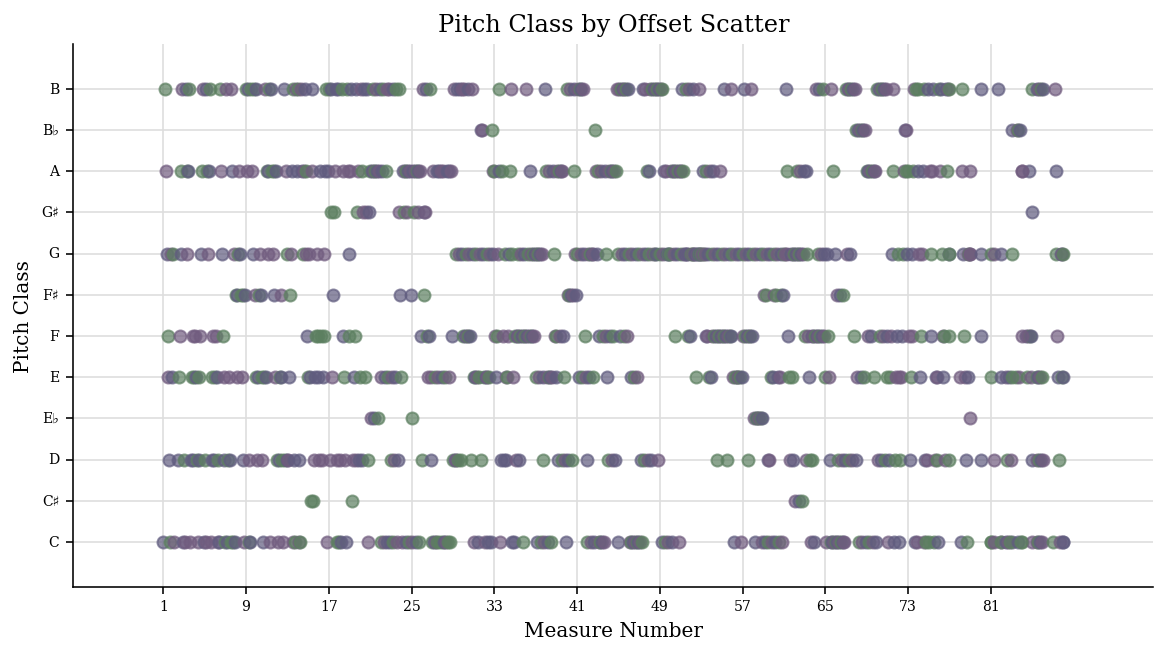

In [5]:
# Display pitch class by offset 
base_midi.plot('scatter', 'offset', 'pitchClass')

MIDI files also include parts and instrument information, which are displayed in the plot below. Based on the contour plot, the MIDI file has four parts.   

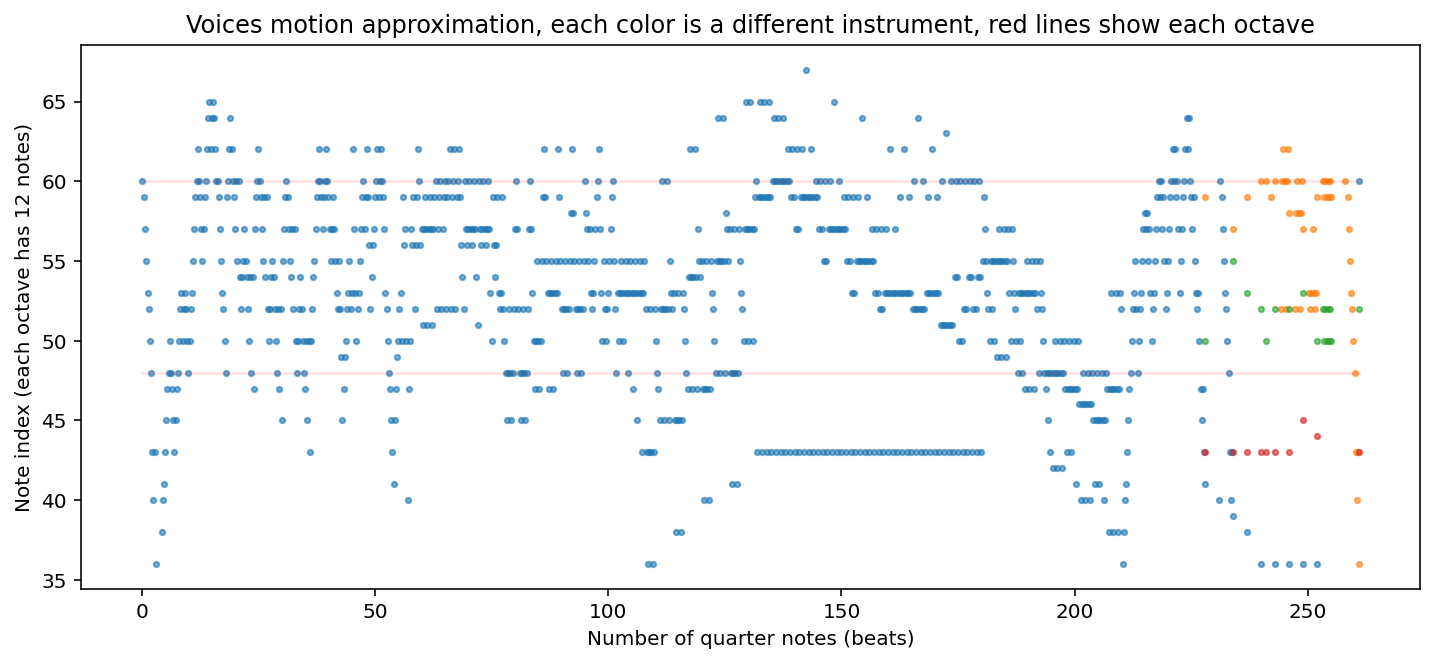

<Figure size 432x288 with 0 Axes>

In [130]:
# Display contour of a midi file
print_parts_countour(base_midi)

The MIDI file can also be played like so:

In [7]:
# Play MIDI
base_midi.show('midi')

In [8]:
# Display the types of instruments used
def list_instruments(midi):
    '''
    Prints the type of instrument used in a MIDI file
    midi: music21 MIDI file  
    '''
    
    partStream = midi.parts.stream()
    print("List of instruments found on MIDI file:")
    for p in partStream:
        aux = p
        print (p.partName)

list_instruments(base_midi)

List of instruments found on MIDI file:
Solo Cello
--------------------------------------
Johann Sebastian Bach  (1685-1750)
Six Suites for Solo Cello


Analyzing each part of the MIDI is going to take a long time, even for the most adept ML tools. Instead, the notes can be flattened and compressed into a single flat part. In addition, Waldecir Faria suggested a harmonic reduction, where the most chord played can be used as an indicator for each MIDI. Key chords are converted to Roman numerals for simplicity.

In [9]:
# Perform harmonic reduction 
harmonic_reduction(base_midi)

['I6',
 'vi',
 'vii42',
 'ii7',
 'vii42',
 'I',
 'V',
 'I',
 '#iv',
 'vii',
 'iii',
 'vi',
 'vii42',
 'vi42',
 '#i',
 'IV',
 '#v',
 'vi42',
 '#v',
 '#v',
 'vi',
 'vi',
 'I65',
 '#iv',
 'IV',
 'III',
 'vi53',
 'vi53',
 'V6',
 'V65',
 'I7',
 'vi65',
 'ii53',
 'I53',
 'ii42',
 'IV',
 'I7',
 'IV65',
 'ii7',
 'V65',
 'iii7',
 'vi65',
 'IV7',
 'ii7',
 'V7',
 'I64',
 'V',
 'V53',
 'vi42',
 'IV',
 'V7',
 'iii6',
 'IV',
 'ii',
 'V7',
 'I64',
 'V7',
 'i64',
 'I',
 'I',
 'iii42',
 'VI65',
 'ii42',
 'V65',
 'vi42',
 'II65',
 'V42',
 'I65',
 'IV42',
 'vii6',
 'ii42',
 'iii',
 'IV',
 'V',
 'vi',
 'V7',
 'V42',
 'I',
 'vi43',
 'V43',
 'V',
 'I53',
 'I7',
 'IV64',
 'I',
 'vii',
 'I6',
 'I53']

# Data Preparation

Now that it has been demonstrated it is possible to reduce MIDIs to harmonics, we can now apply that all files in the `PS1` folder, and create a dataframe. 

In [10]:
# Check if a saved dataframe exists
if not os.path.exists('data/midi_harmonic.pkl'):
    train_file_path = 'MusicNet/PS1'
    # MIDI information storing dict 
    midi_files = {'title':[], 'harmonic_Keys':[], 'composer':[]}

    # Iterate through each composer 
    for composer in os.listdir(train_file_path):
        # Iterate through each MIDI by the composer 
        for _loc in os.listdir(train_file_path+'/'+composer):
            # Find all .mid files 
            if _loc.endswith('.mid'):
                # Some files cannot be read so 'try...except' is used here
                try:
                    # Load MIDI file 
                    midi_file = open_midi('/'.join([train_file_path,composer,_loc]))
                    # Perform harmonic reduction 
                    harmonic = harmonic_reduction(midi_file)
                    # Store values
                    midi_files['title'].append(_loc.split('.')[0])
                    midi_files['harmonic_Keys'].append(harmonic)
                    midi_files['composer'].append(composer)
                except:
                    continue
    # Convert dictionary to a dataframe 
    df = pd.DataFrame(midi_files)
    # Save dataframe to file 
    with open('data/midi_harmonic.pkl', 'wb') as f:
        pickle.dump(df, f)
else:
    # Read dataframe from file
    with open('data/midi_harmonic.pkl', 'rb') as f:
        df = pickle.load(f)    

Displaying the head of the dataframe:

In [11]:
df.head()

,title,harmonic_Keys,composer
0,Cello Suite 3_BWV1009_2217_cs3-1pre,"[I6, vi, vii42, ii7, vii42, I, V, I, #iv, vii,...",Bach
1,Cello Suite 3_BWV1009_2218_cs3-2all,"[V, ii42, iii, ii42, I7, II6, II42, V7, iii7, ...",Bach
2,Cello Suite 3_BWV1009_2219_cs3-3cou,"[iii, III6, ii, VII53, i42, VI42, VI, VII, IV4...",Bach
3,Cello Suite 3_BWV1009_2220_cs3-4sar,"[I, IV42, iii65, V42, vi43, II, #iv7, v, I, IV...",Bach
4,Cello Suite 3_BWV1009_2221_cs3-5bou,"[iv42, i42, V53, V, I53, I65, vii7, v43, v7, i...",Bach


To see if there is an imbalanced data, the compositions are grouped by composers, as shown below. 

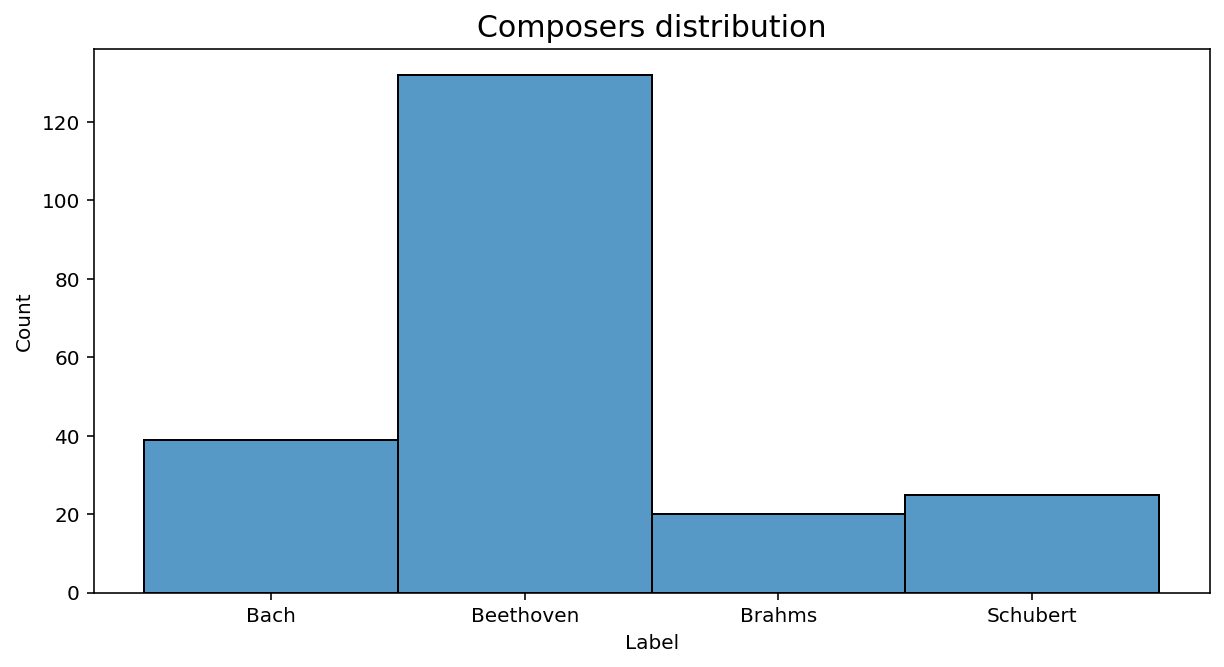

In [12]:
# Plot the distribution of numeric columns
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df.composer, color='tab:blue',
             ax=ax).set_title('Composers distribution',fontsize=15)

# Customize xlabel
ax.set_xlabel('Label')

# Save plot
plt.savefig('images/composer_dist.png')

It appears that compositions by Beethoven are overrepresented. Therefore, we need to address the class imbalance issue. 

## Data Preprocessing

The first step is to do label encoding. One-hot encoding was considered for this problem but additional steps, like reconfiguring metrics had to be done. Unlike [the citation paper]( https://arxiv.org/pdf/1611.09827.pdf) provided for this work,  treating this problem as a classification problem rather than a regression one helps us use fast models instead of neural networks. 

In [13]:
# Transform composer column with label encoder
label_composer = LabelEncoder().fit_transform(df.composer)
# Create a simpler dataframe containing keys and encoded composer
df_dummy = pd.concat([df.harmonic_Keys, pd.DataFrame(label_composer)], axis=1)
df_dummy.columns = ['harmonic_Keys','encoded_composer'] 
df_dummy.head()

,harmonic_Keys,encoded_composer
0,"[I6, vi, vii42, ii7, vii42, I, V, I, #iv, vii,...",0
1,"[V, ii42, iii, ii42, I7, II6, II42, V7, iii7, ...",0
2,"[iii, III6, ii, VII53, i42, VI42, VI, VII, IV4...",0
3,"[I, IV42, iii65, V42, vi43, II, #iv7, v, I, IV...",0
4,"[iv42, i42, V53, V, I53, I65, vii7, v43, v7, i...",0


As a reference to the confusion matrices, the class names are instantiated, like so: 

In [14]:
# Create class names dictionary 
class_names = {0:'Bach', 1:'Beethoven', 2:'Brahms', 3:'Schubert'}

In [15]:
# Split to into data and label
X = df_dummy.harmonic_Keys
y = df_dummy.encoded_composer

In [16]:
# Split the training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, 
                                                    test_size = 0.25,
                                                    stratify=y)

## Note Embedding 

Since notes are provided for each composer, this can be treated as a word embedding problem, where it is possible to train a `Word2Vec` model. 

In [17]:
# Load Word2Vec from file
if os.path.exists('data/wv.pkl') :    
    # Load models 
    with open('data/wv.pkl', 'rb') as f:
            wv = pickle.load(f)  
else:
    model = Word2Vec(X_train, size=100, window=5, min_count=1, workers=4)
    model.train(X_train, total_examples=model.corpus_count, epochs=100)
    wv = model.wv
    with open('data/wv.pkl', 'wb') as f:
        pickle.dump(wv, f) 

Based on the word embedding, we can now convert the tokenized harmonic keys to vectors. 

In [18]:
# Convert keys to word embedding 
def embedding(x):
    # Initialize embedded  
    embed = []
    for i in range(x.shape[0]):
        # Initialize vector for each composition 
        tmp = []
        # Iterate through each note
        for k in x.iloc[i]:
            # Some notes might not be represented in the embedding
            # In such cases, a vector of zeros is taken
            try:
                tmp.append(wv[k].T)
            except:
                tmp.append(np.zeros(100))
        # Convert list to numpy array 
        tmp = np.array(tmp)
        # Sum along columns
        v = tmp.sum(axis=0)
        # If the sum is zeros (no embedding found), return a vector of zeros
        if type(v) != np.ndarray:
            embed.append(np.zeros(100))
        else:
            # Else normalize the sum of embeddings 
            embed.append(v/np.sqrt((v ** 2).sum()))
    return pd.DataFrame(embed)    

Now, the notes can be replaced by embedding matrices as follows. 

In [19]:
# Convert notes to vectors
X_train_embed = embedding(X_train)
X_test_embed = embedding(X_test)

In [20]:
X_train_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.085370,-0.003346,0.092675,0.078159,-0.113041,0.054859,-0.029175,0.079683,-0.202764,0.015759,...,-0.115591,0.075498,-0.025985,0.014176,0.109655,0.089496,0.080963,-0.010561,-0.023448,-0.067309
1,-0.147842,0.017226,0.148169,-0.002734,-0.092119,0.034364,-0.086148,0.163336,-0.085655,0.077628,...,0.106665,0.149334,-0.216788,0.029287,-0.008025,0.117332,0.188600,0.089860,0.065797,0.002506
2,-0.067340,-0.011725,0.085416,0.112038,-0.137634,0.033319,-0.071284,0.055733,-0.197800,-0.033057,...,-0.085650,0.053817,-0.085921,-0.002502,0.074150,0.056353,0.110442,0.002193,-0.001163,-0.122717
3,-0.013473,-0.009018,-0.027914,-0.050683,-0.155460,0.049548,-0.165901,0.188239,-0.156416,0.117964,...,0.064915,0.143033,-0.172547,0.064285,0.044598,0.166769,0.218104,0.022006,0.056347,0.044452
4,-0.089058,-0.024086,0.088722,-0.012960,-0.124896,0.020417,-0.136001,0.120119,-0.094217,0.053441,...,-0.006737,0.171305,-0.197528,-0.081396,0.052817,0.075398,0.229553,0.064154,0.071078,-0.026234


Now, we can start data preparation. 

## Class Imbalance

Based on the categorical plot from earlier, it is clear that there is a class imbalance. Lets quantify the amount. 

In [21]:
# Show class imbalance 
y_train.value_counts()

1    99
0    29
3    19
2    15
Name: encoded_composer, dtype: int64

To mitigate this during the modeling process, either the models are assigned class weights, computed below, or oversampled using SMOTE, ADASYN or random oversampler. 

### Class Weight

The class weights are computed with `sklearn`'s `compute_class_weight` and converted to dictionary. 

In [22]:
# Use compute_class_weight to compute the class weight. 
# Balanced is used to match results with oversampled data. 
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(y_train),
                                     y = y_train)

# class_weights is changed into a dictionary for better handling
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.396551724137931, 1: 0.4090909090909091, 2: 2.7, 3: 2.1315789473684212}

These results make sense given that compositions by Beethoven are disproportionally overrepresented are given more weight.   

### Oversampling

The following oversampling techniques are prepared from the `imblearn` library. 

In [23]:
# Initialize SMOTE oversampler 
smote = SMOTE(random_state=SEED)

# Resample scaled training data
X_train_resam_smote, y_train_resam_smote = smote.fit_resample(X_train_embed, y_train) 

# Check the number of labels in the oversampled data 
y_train_resam_smote.value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: encoded_composer, dtype: float64

In [24]:
# Initialize ADASYN oversampler 
adasyn = ADASYN(random_state=SEED)

# Resample scaled training data
X_train_resam_ada, y_train_resam_ada = adasyn.fit_resample(X_train_embed, y_train) 

# Check the number of labels in the oversampled data 
y_train_resam_ada.value_counts(normalize=True)

3    0.256858
2    0.249377
1    0.246883
0    0.246883
Name: encoded_composer, dtype: float64

In [25]:
# Initialize RandomOverSampler oversampler
rand_ov_sam = RandomOverSampler(random_state=SEED)

# Resample scaled training data
X_train_resam_rand, y_train_resam_rand = rand_ov_sam.fit_resample(X_train_embed, y_train) 

# Check the number of labels in the oversampled data 
y_train_resam_rand.value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: encoded_composer, dtype: float64

The concept is to do a cross-validation using either the class weights and the oversampled data (SMOTE, ADASYN, or random) and choose the dataset that provides the highest metrics, which will then be used to train over the set of models with a combination of parameters.    

# Modeling

To expedite modeling, models take a long time to run are forced to use all but one CPU cores available in the system.  

In [26]:
# Get the number of CPUs available in the system
n_cpu = os.cpu_count()-1
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 7


The other method employed in this project to fast-pace modeling is to save grid search values to file and load them when needed. 

In [27]:
# Check if the models exist 
if os.path.exists('data/model.pkl') :    
    # Load models 
    with open('data/model.pkl', 'rb') as f:
            models_cv = pickle.load(f)  

Best performing models and their predictions will be stored in these variables.

<b><font color='red'>CAUTION: running the entire notebook without saved model takes at least 4 hours.</font></b> 

The pretrained model can be found in [this link](https://drive.google.com/file/d/1AIfB3vJbeuspk3Q1dkVRn98Ft1Wz4hyk/view?usp=sharing) and save to `data/` directory. 

Variables to store the best performing model, model names, best model metrics and the metrics used in the modeling are initialized below. 

In [28]:
# Best models list 
best_models = []

# Model names list
model_names = []

# Metrics for best models 
best_models_metrics = None 

# Define metrics by importance
metrics = ['f1', 'recall', 'precision', 'accuracy']

To aide with model performance visualization, I wrote a custom grid-search class, imported as `CGS`. Documentations on how to use the class are provided as doc-string of the class and methods used. Also, utility functions used to plot confusion matrix, model performances and Pearson correlations are also imported. 

## Logistic Regression

The first model used is logistic regression. Regularization factor, fit intercept, and L1 or L2 penalty were considered for grid search. `lbfgs` solver does not allow for L1 penalty. So, `liblinear` solver used instead. The downside is that ` liblinear` does not allow for parallelized jobs, which is why `n_jobs` is missing as an input parameter.  

In [29]:
# Set model name
model_name = 'LogisticRegression'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():    
    # Define regularization range 
    C = np.linspace(0.1, 1, 10)

    # Define parameters ranges 
    params = {'C':[str(s) for s in C],
              'fit_intercept':['False','True'],
              'max_iter':['1e3'],
              'penalty':["'l1'","'l2'"],
              'solver':["'liblinear'"]}

    # Create a Custom_GridSearchCV instance
    logreg_gs = CGS(model_name, param_grid=params)
else:
    # Load 'logreg_gs' from models_cv
    logreg_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = logreg_gs.cross_validate(X_train_embed, y_train, 
                                                     scoring='accuracy', 
                                                     SEED=SEED)

The `cross_validate` function normalizes that dataset,  splits it into 5 (default) cross validations, fits the model over `StratifiedKFold` training and validation splits. It also considers oversampling and class weight to choose which imbalance method gives the best metrics. The computed metrics are displayed below. 

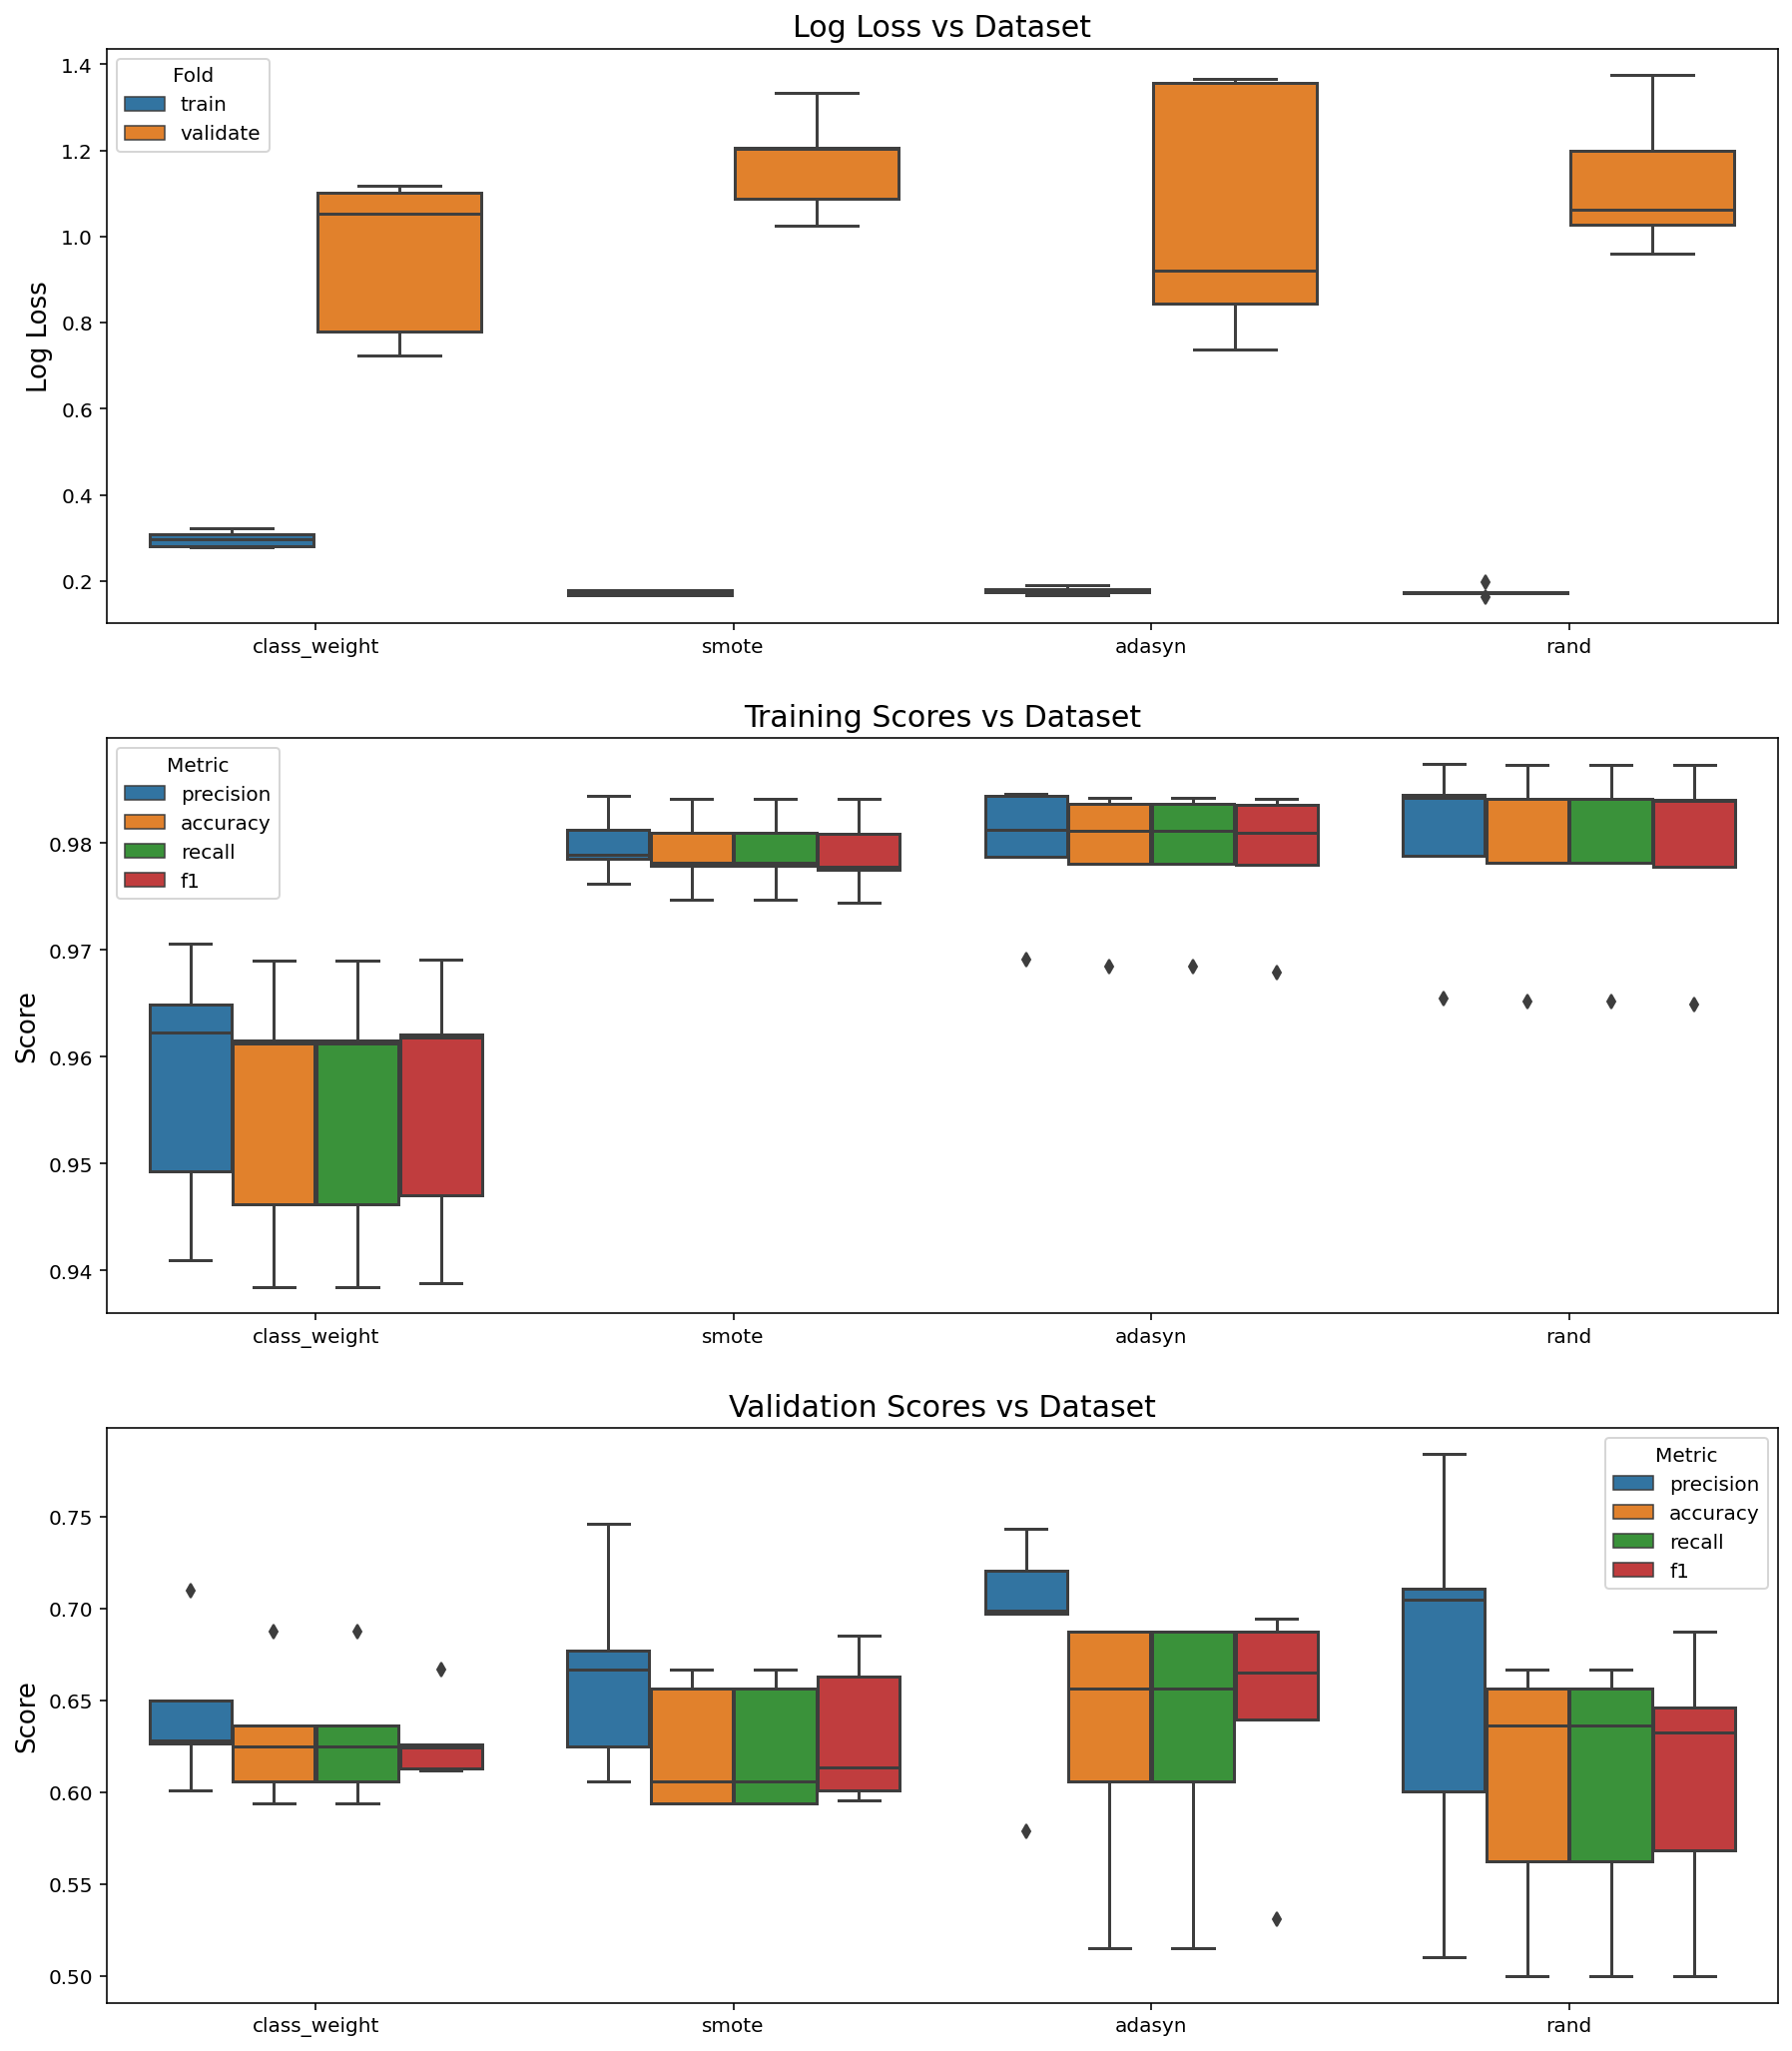

In [30]:
# Plot the metrics for training and validation datasets
plot_metrics(logreg_gs)

Up on a cursory look, `SMOTE` oversampling gives relatively better results compared to other methods. This needs to be quantified further. The following script tabulates the average metrics for each imbalance method. 

In [31]:
# Find training and validation metrics
logreg_gs_metrics_train,_ = prepare_metrics(logreg_gs, train_val='train')
logreg_gs_metrics_valid,_ = prepare_metrics(logreg_gs, train_val='validate')

# Combine metrics 
logreg_gs_metrics = pd.concat([logreg_gs_metrics_train,logreg_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
logreg_gs_metrics.dataset = logreg_gs_metrics.dataset+'_'+logreg_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
logreg_gs_metrics_mean = pd.DataFrame(columns=logreg_gs_metrics.metric.unique(),
                                  index=logreg_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in logreg_gs_metrics_mean.columns:
    for idx in logreg_gs_metrics_mean.index:
        avg = logreg_gs_metrics.loc[(logreg_gs_metrics.metric==col) & (logreg_gs_metrics.dataset==idx),'value']
        logreg_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy        
logreg_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
rand_train,0.980077,0.979802,0.979802,0.979611
smote_train,0.979846,0.979169,0.979169,0.97894
adasyn_train,0.979629,0.979127,0.979127,0.978906
class_weight_train,0.957617,0.955277,0.955277,0.95577
adasyn_validate,0.687669,0.630492,0.630492,0.643549
smote_validate,0.664226,0.623295,0.623295,0.631567
class_weight_validate,0.643023,0.629735,0.629735,0.628513
rand_validate,0.662178,0.604356,0.604356,0.606818


As expected, `SMOTE` has a good balance of recall and F1 with the highest AUC in both train and validation splits. Therefore, the models with a combination of parameters of logistic regression will be fitted with `SMOTE` oversampled training data. 

In [32]:
# Fit grid search models with the best training dataset
logreg_gs.fit(X_train_resam_smote, y_train_resam_smote)

The predictions are made on test and training datasets. 

In [33]:
# Predict test and training datasets 
# Also get the metrics of fit
# Check if the models have not been predicted yet 
if not isinstance(logreg_gs.predictions, pd.DataFrame): 
    logreg_gs.predict(X_test_embed, y_test)
    logreg_gs.predict(X_train_resam_smote, y_train_resam_smote, train_test='train')
logreg_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, ...",1.386294,0.185185,0.034294,0.185185,0.057870
1,test,"[2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.22787039054380534, 0.2604667280920995, 0.2...",1.233803,0.648148,0.623932,0.648148,0.622428
2,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.21991719011301034, 0.3686534347490396, 0.2...",1.212212,0.611111,0.373457,0.611111,0.463602
3,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.22653557011816308, 0.28802720075281174, 0....",1.181300,0.648148,0.518133,0.648148,0.560357
4,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.24563755042114707, 0.2550829369252623, 0.2...",1.280134,0.574074,0.378889,0.574074,0.456493


Displaying the fit performances:

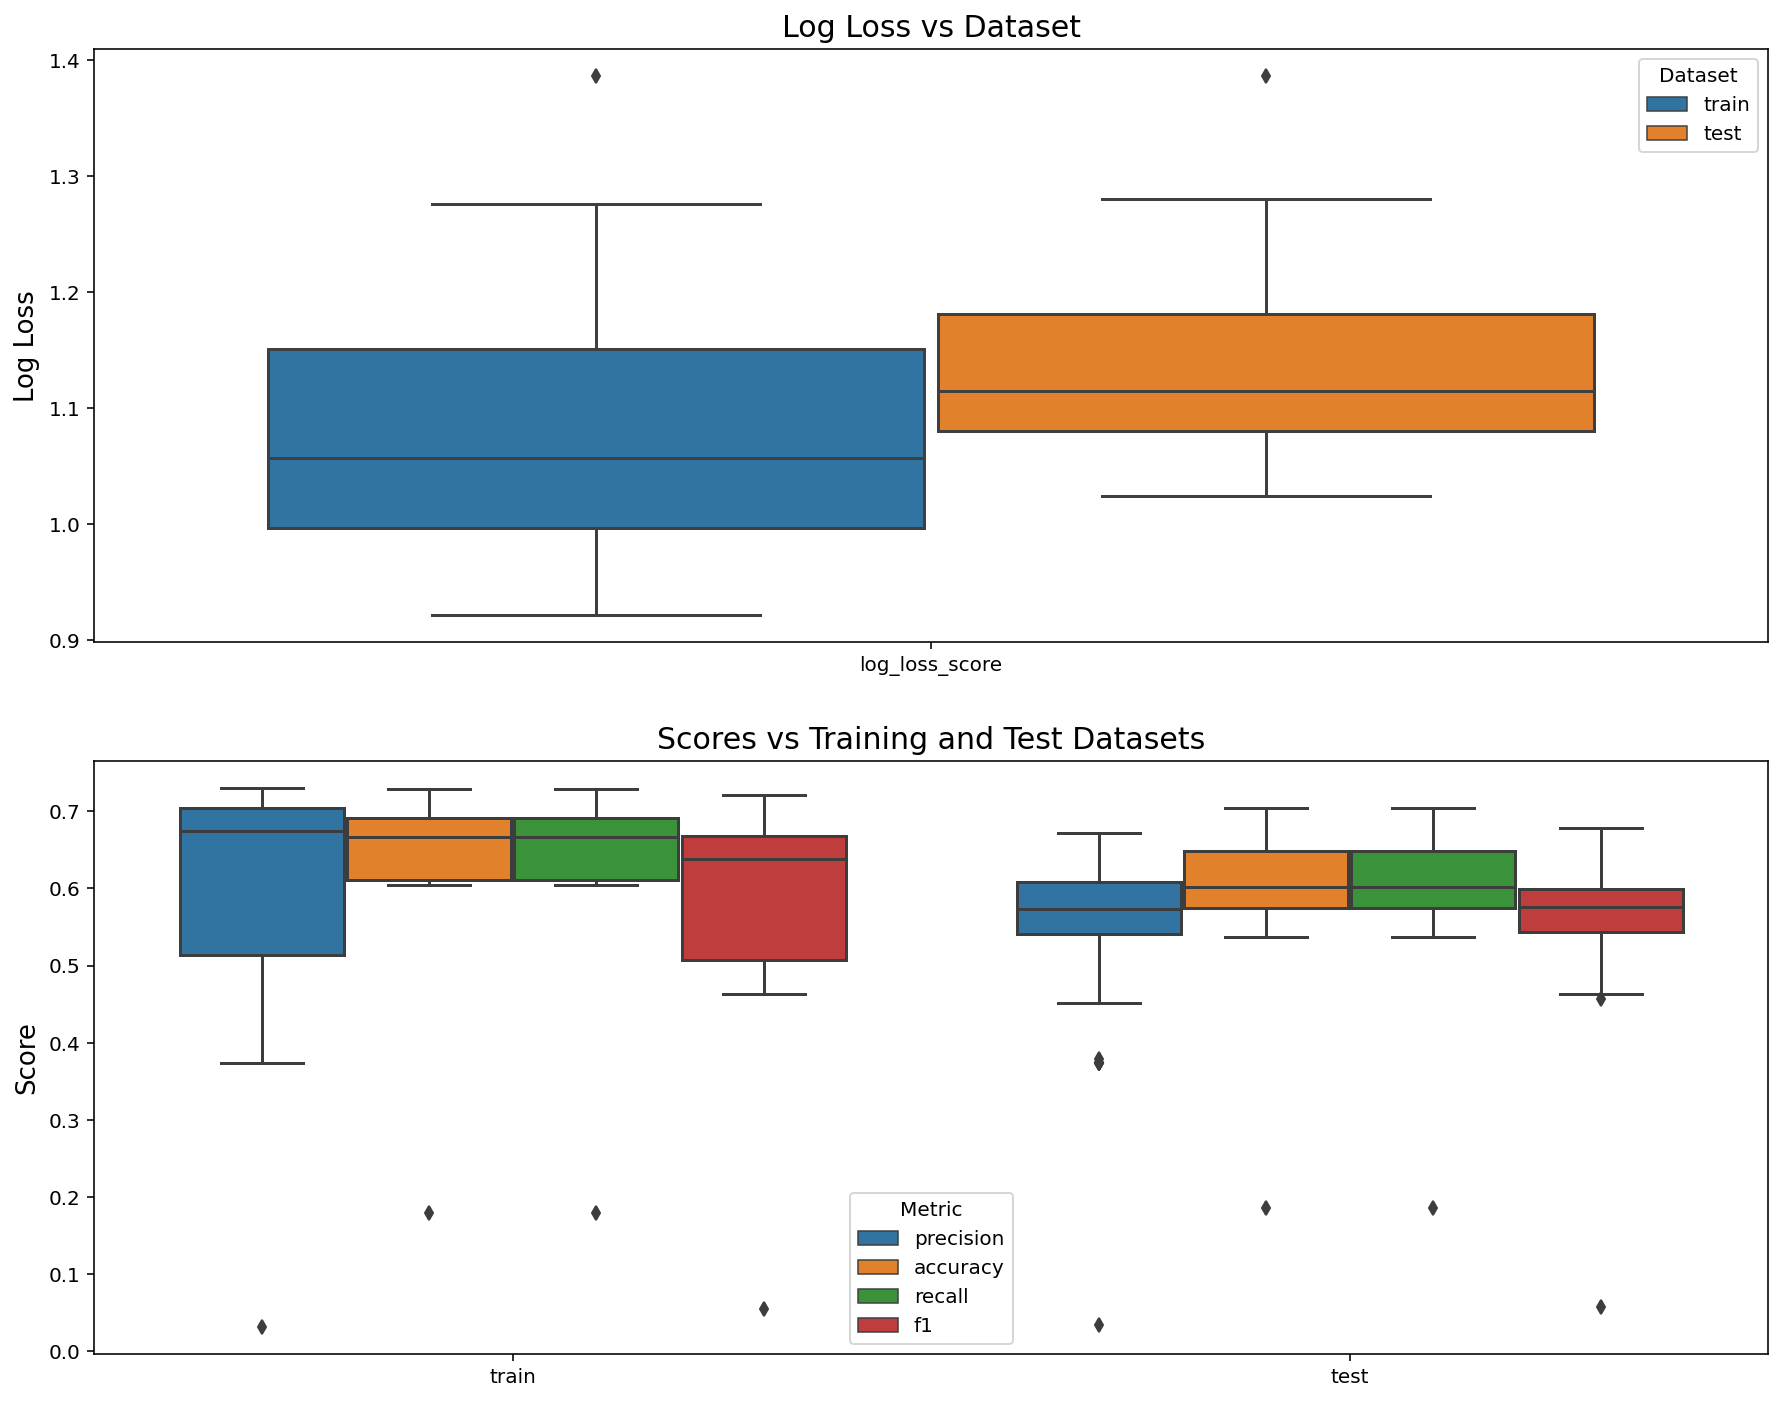

In [34]:
# Plot metrics for predicted values
plot_predictions(logreg_gs)

The best model with the importance of metrics given above, is chosen as the best logistic regression model and saved in a variable. 

In [35]:
# Find the best model and model metrics based on given metrics 
best_logreg_model, best_logreg_model_metrics = logreg_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_logreg_model)

# Store best model metrics 
best_models_metrics = pd.DataFrame(best_logreg_model_metrics).transpose()

# Display best model parameters 
best_logreg_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.30000000000000004,
                   class_weight={0: 1.396551724137931, 1: 0.4090909090909091,
                                 2: 2.7, 3: 2.1315789473684212},
                   max_iter=1000.0, solver='liblinear')>

Displaying the metrics for the best logistic regression model:

In [36]:
# Best logreg model metrics
best_logreg_model_metrics

index                                                            11
train_test                                                     test
preds             [2, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
prob_preds        [[0.21146470084415467, 0.24862024219158596, 0....
log_loss_score                                              1.10825
accuracy                                                   0.703704
precision                                                  0.671732
recall                                                     0.703704
f1                                                         0.677713
Name: 0, dtype: object

A confusion matrix, showing the accuracy of best logistic regression model. 

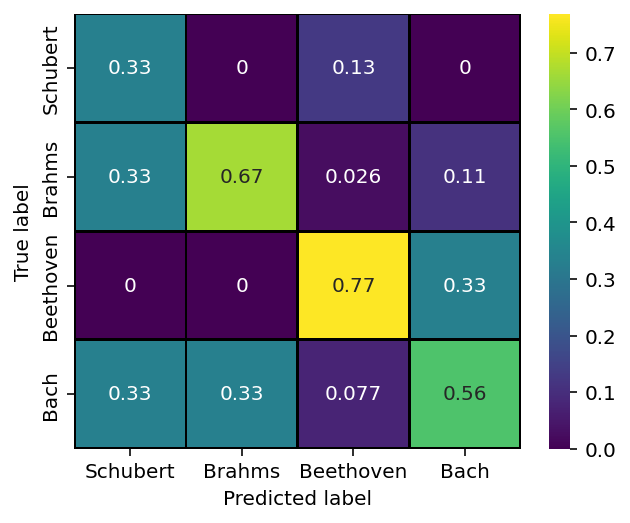

In [37]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_logreg_model_metrics.preds, 
                      normalize='pred', class_names=class_names);

The same template is used with the subsequent models. 

## K Nearest Neighbors

For K nearest neighbors, number of neighbors and weights were optimized for a grid search. Unfortunately, KNN does not allow for class imbalance to be passed as a parameter. 

In [38]:
# Set model name
model_name = 'KNeighborsClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():
    # Define neigbors range 
    n = np.arange(1, 60, 1)

    # Define parameters
    params = {'n_jobs':[str(n_cpu)], 'n_neighbors':[str(s) for s in n],
              'weights':["'uniform'", "'distance'"]}

    # Create a Custom_GridSearchCV instance
    knn_gs = CGS(model_name, param_grid=params)
else:
    # Replace 'knn_gs' by models_cv[1]
    knn_gs = models_cv[model_name]
    
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = knn_gs.cross_validate(X_train_embed, y_train, 
                                                  scoring='accuracy',
                                                  SEED=SEED)

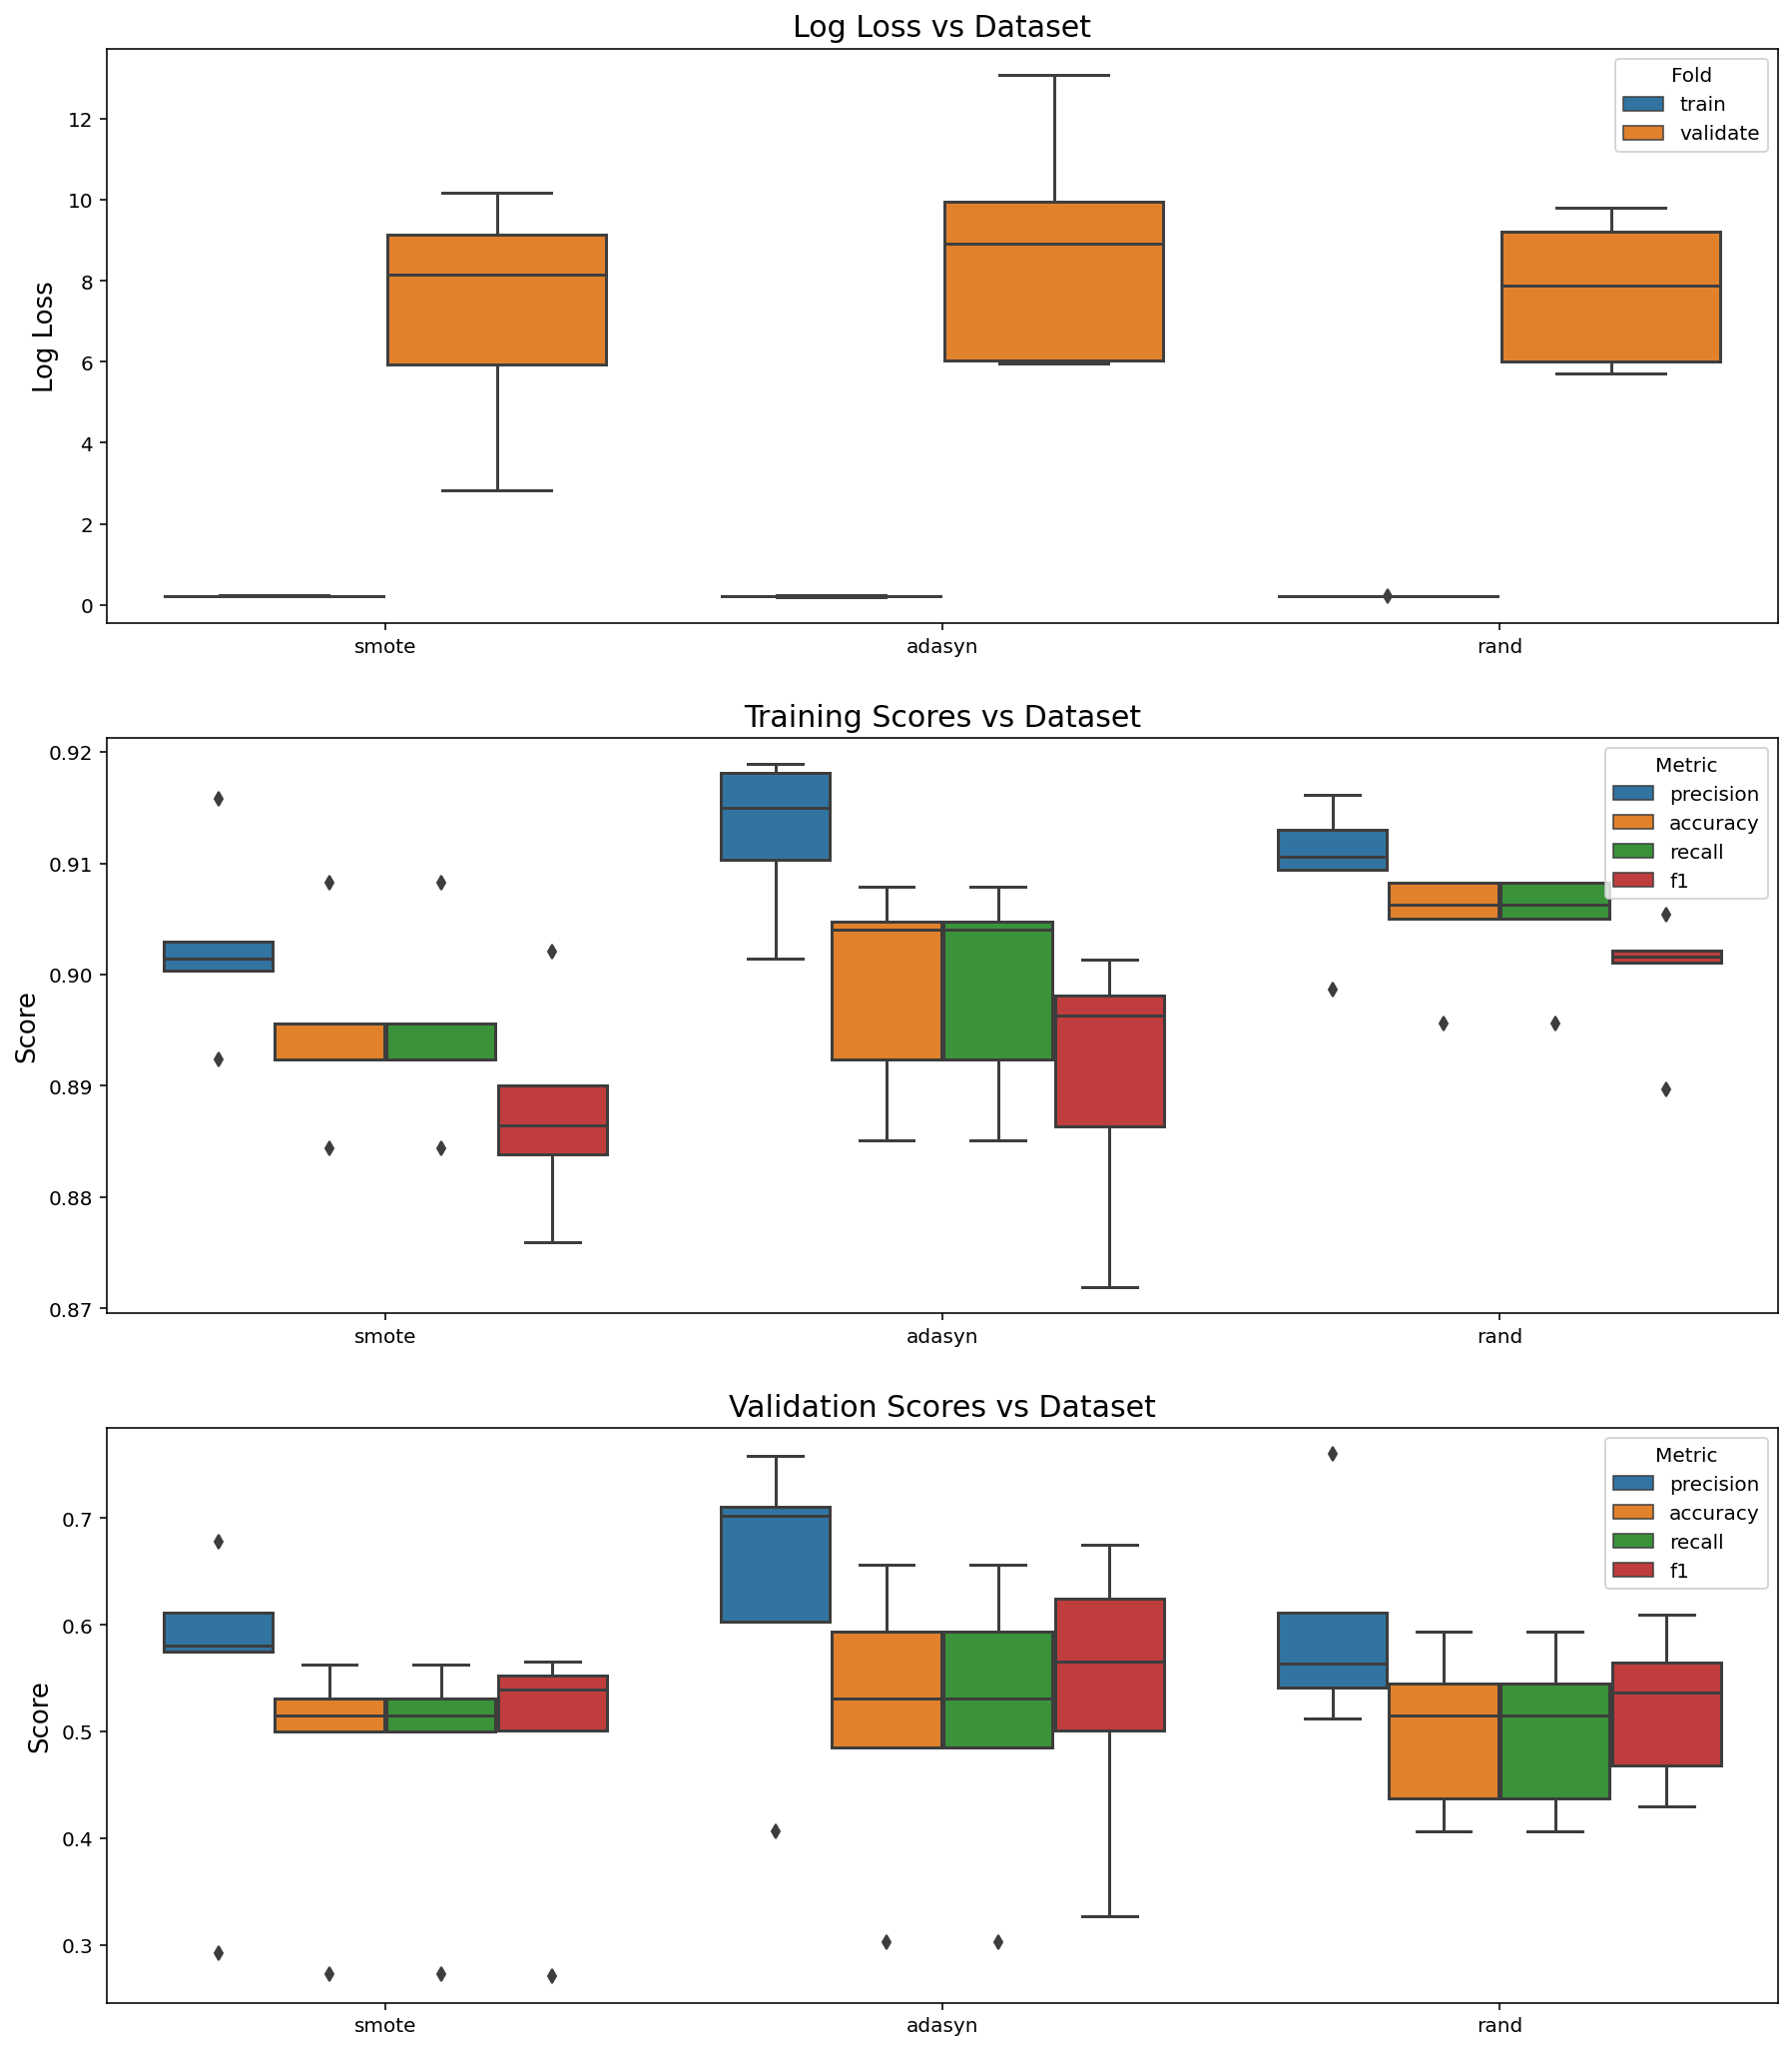

In [39]:
# Plot the metrics for training and validation datasets
plot_metrics(knn_gs)

Upon cursory look, it appears that random oversampling gives better recall, if not accuracy. More analysis is done later. The plots for training and validation metrics are provided below. 

In [40]:
# Find training and validation metrics
knn_gs_metrics_train,_ = prepare_metrics(knn_gs, train_val='train')
knn_gs_metrics_valid,_ = prepare_metrics(knn_gs, train_val='validate')

# Combine metrics 
knn_gs_metrics = pd.concat([knn_gs_metrics_train,knn_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
knn_gs_metrics.dataset = knn_gs_metrics.dataset+'_'+knn_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
knn_gs_metrics_mean = pd.DataFrame(columns=knn_gs_metrics.metric.unique(),
                                  index=knn_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in knn_gs_metrics_mean.columns:
    for idx in knn_gs_metrics_mean.index:
        avg = knn_gs_metrics.loc[(knn_gs_metrics.metric==col) & (knn_gs_metrics.dataset==idx),'value']
        knn_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy
knn_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
rand_train,0.909549,0.904668,0.904668,0.899982
adasyn_train,0.91276,0.898844,0.898844,0.890832
smote_train,0.902579,0.894597,0.894597,0.887681
adasyn_validate,0.636105,0.513826,0.513826,0.538624
rand_validate,0.597873,0.499621,0.499621,0.521913
smote_validate,0.547429,0.476326,0.476326,0.485781


In [41]:
# Fit grid search models with the best training dataset
knn_gs.fit(X_train_resam_ada, y_train_resam_ada)

In [42]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(knn_gs.predictions, pd.DataFrame):
    knn_gs.predict(X_test_embed, y_test)
    knn_gs.predict(X_train_resam_ada, y_train_resam_ada, train_test='train')
knn_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",13.431746,0.611111,0.633280,0.611111,0.615850
1,test,"[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",13.431746,0.611111,0.633280,0.611111,0.615850
2,test,"[2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 0.5, 0.0, 0.5], [...",11.705466,0.592593,0.609150,0.592593,0.594742
3,test,"[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 0.549808417954735...",11.662522,0.611111,0.633280,0.611111,0.615850
4,test,"[2, 3, 3, 0, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 0.333333333333333...",11.179705,0.481481,0.587158,0.481481,0.511611


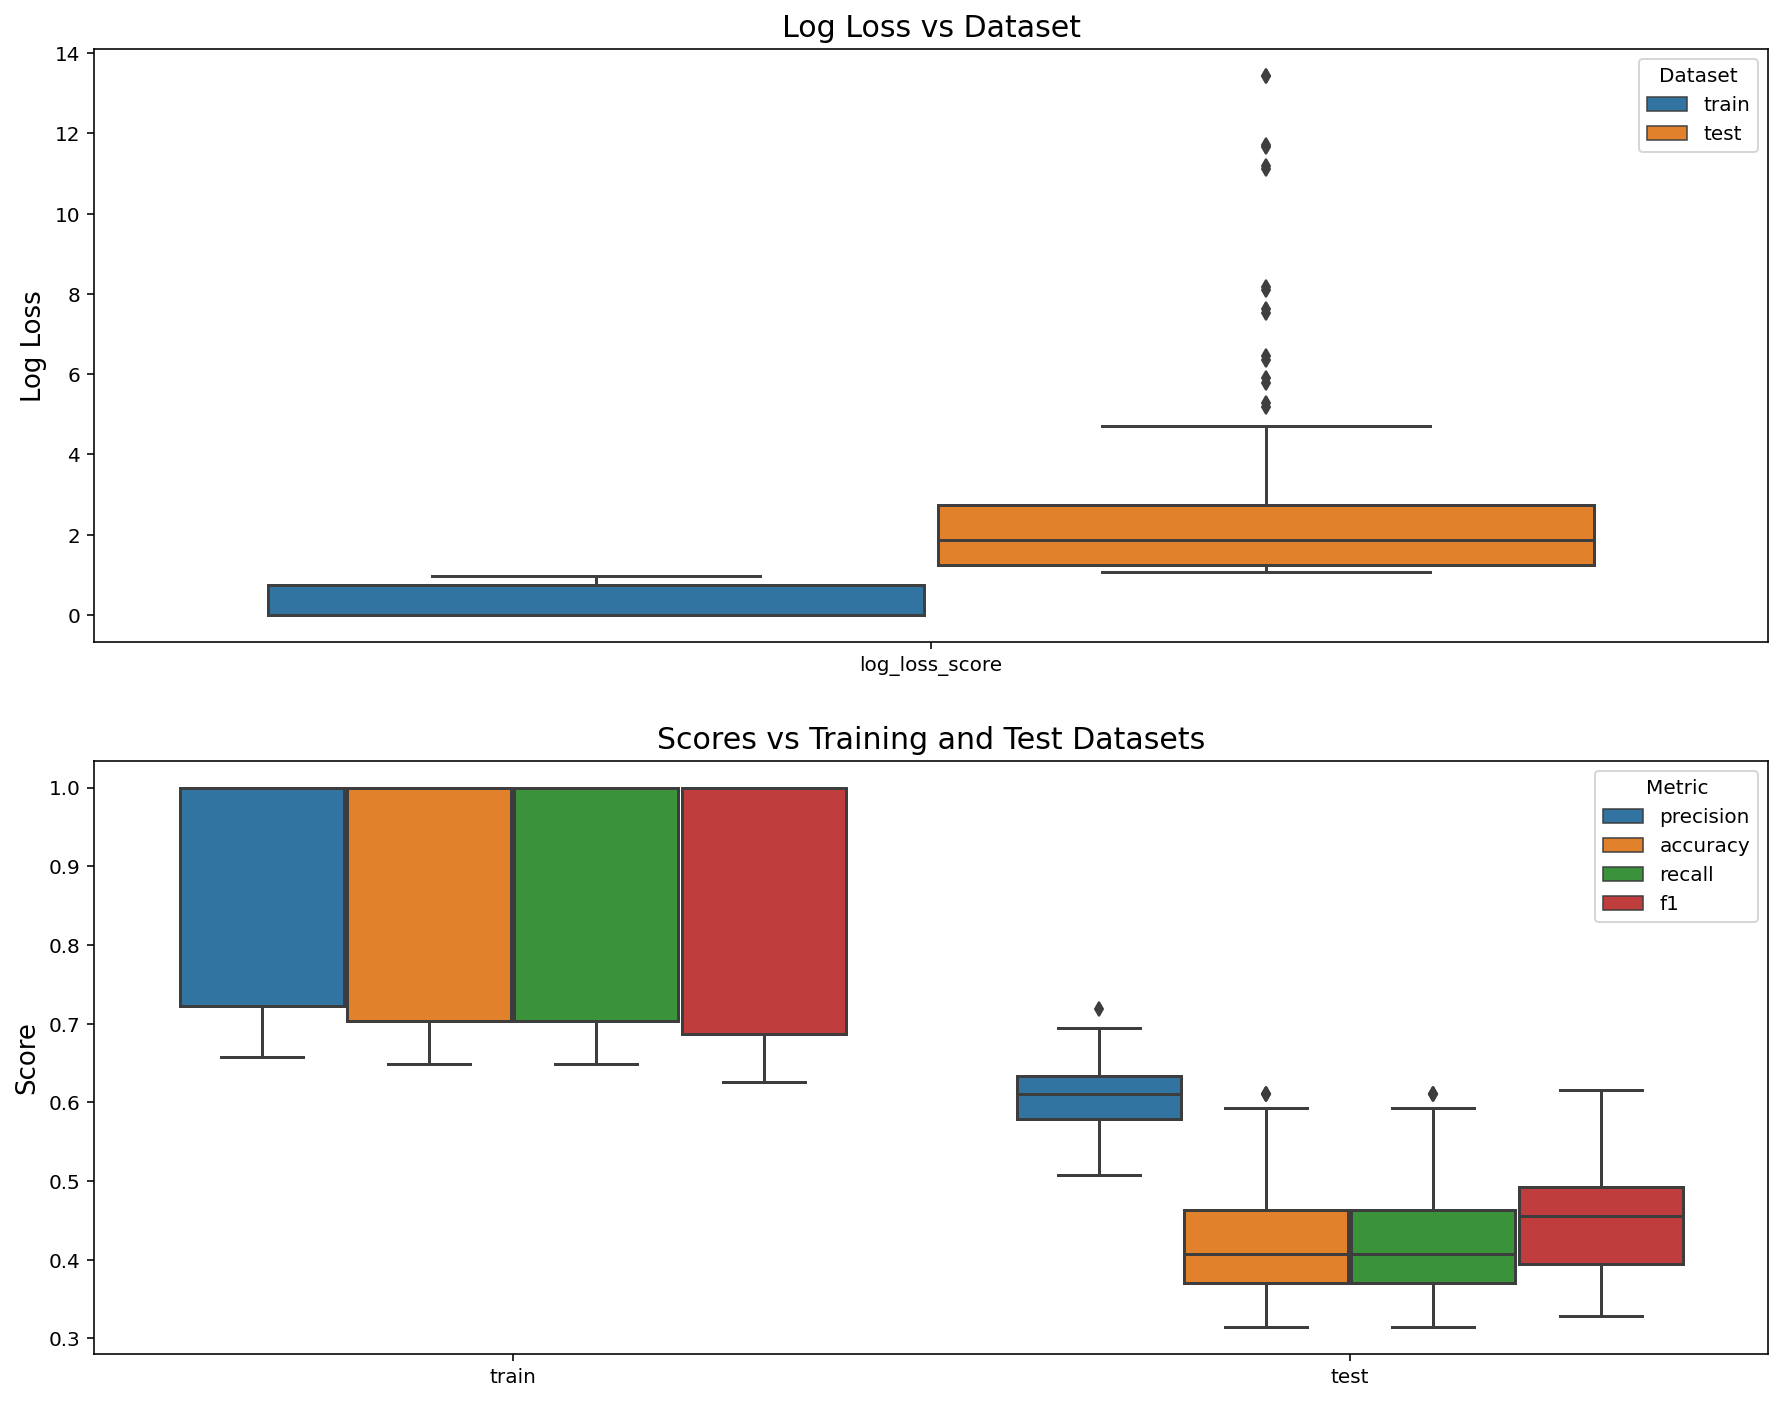

In [43]:
# Plot metrics for predicted values
plot_predictions(knn_gs)

In [44]:
# Find the best model and model metrics based on given metrics 
best_knn_model, best_knn_model_metrics = knn_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_knn_model)

# Store best model metrics 
best_knn_model_metrics = pd.DataFrame(best_knn_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_knn_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_knn_model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_jobs=7, n_neighbors=1)>

In [45]:
# Best knn model metrics 
best_knn_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,0,test,"[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",13.4317,0.611111,0.63328,0.611111,0.61585


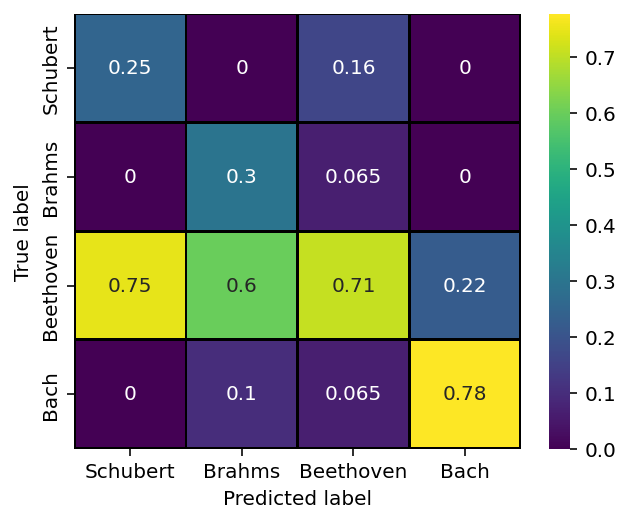

In [46]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_knn_model_metrics.preds[0], 
                      normalize='pred', class_names=class_names);

## Support Vector Classifier

For support vector machine, regularization values, gamma and kernel type were considered. 

In [47]:
# Set model name
model_name = 'SVC'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():
    # Define regularization range
    C = np.linspace(0.1, 1, 10)

    # Define gamma range
    gamma = np.array([0.1, 1, 10])

    # Define parameters ranges 
    params = {'C':[str(s) for s in C],
              'gamma':[str(g) for g in gamma],
              'kernel':["'linear'", "'rbf'", "'sigmoid'"],
              'max_iter':['5e3'],
              'probability':['True']}
    
    # Create a Custom_GridSearchCV instance
    # cv reduced to 2 as SVC takes a long time to converge 
    svc_gs = CGS(model_name, param_grid=params, cv=2)
else:
    # Get 'svc_gs' from models_cv
    svc_gs = models_cv[model_name]
    
# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = svc_gs.cross_validate(X_train_embed, y_train, 
                                                  scoring='accuracy',
                                                  SEED=SEED)

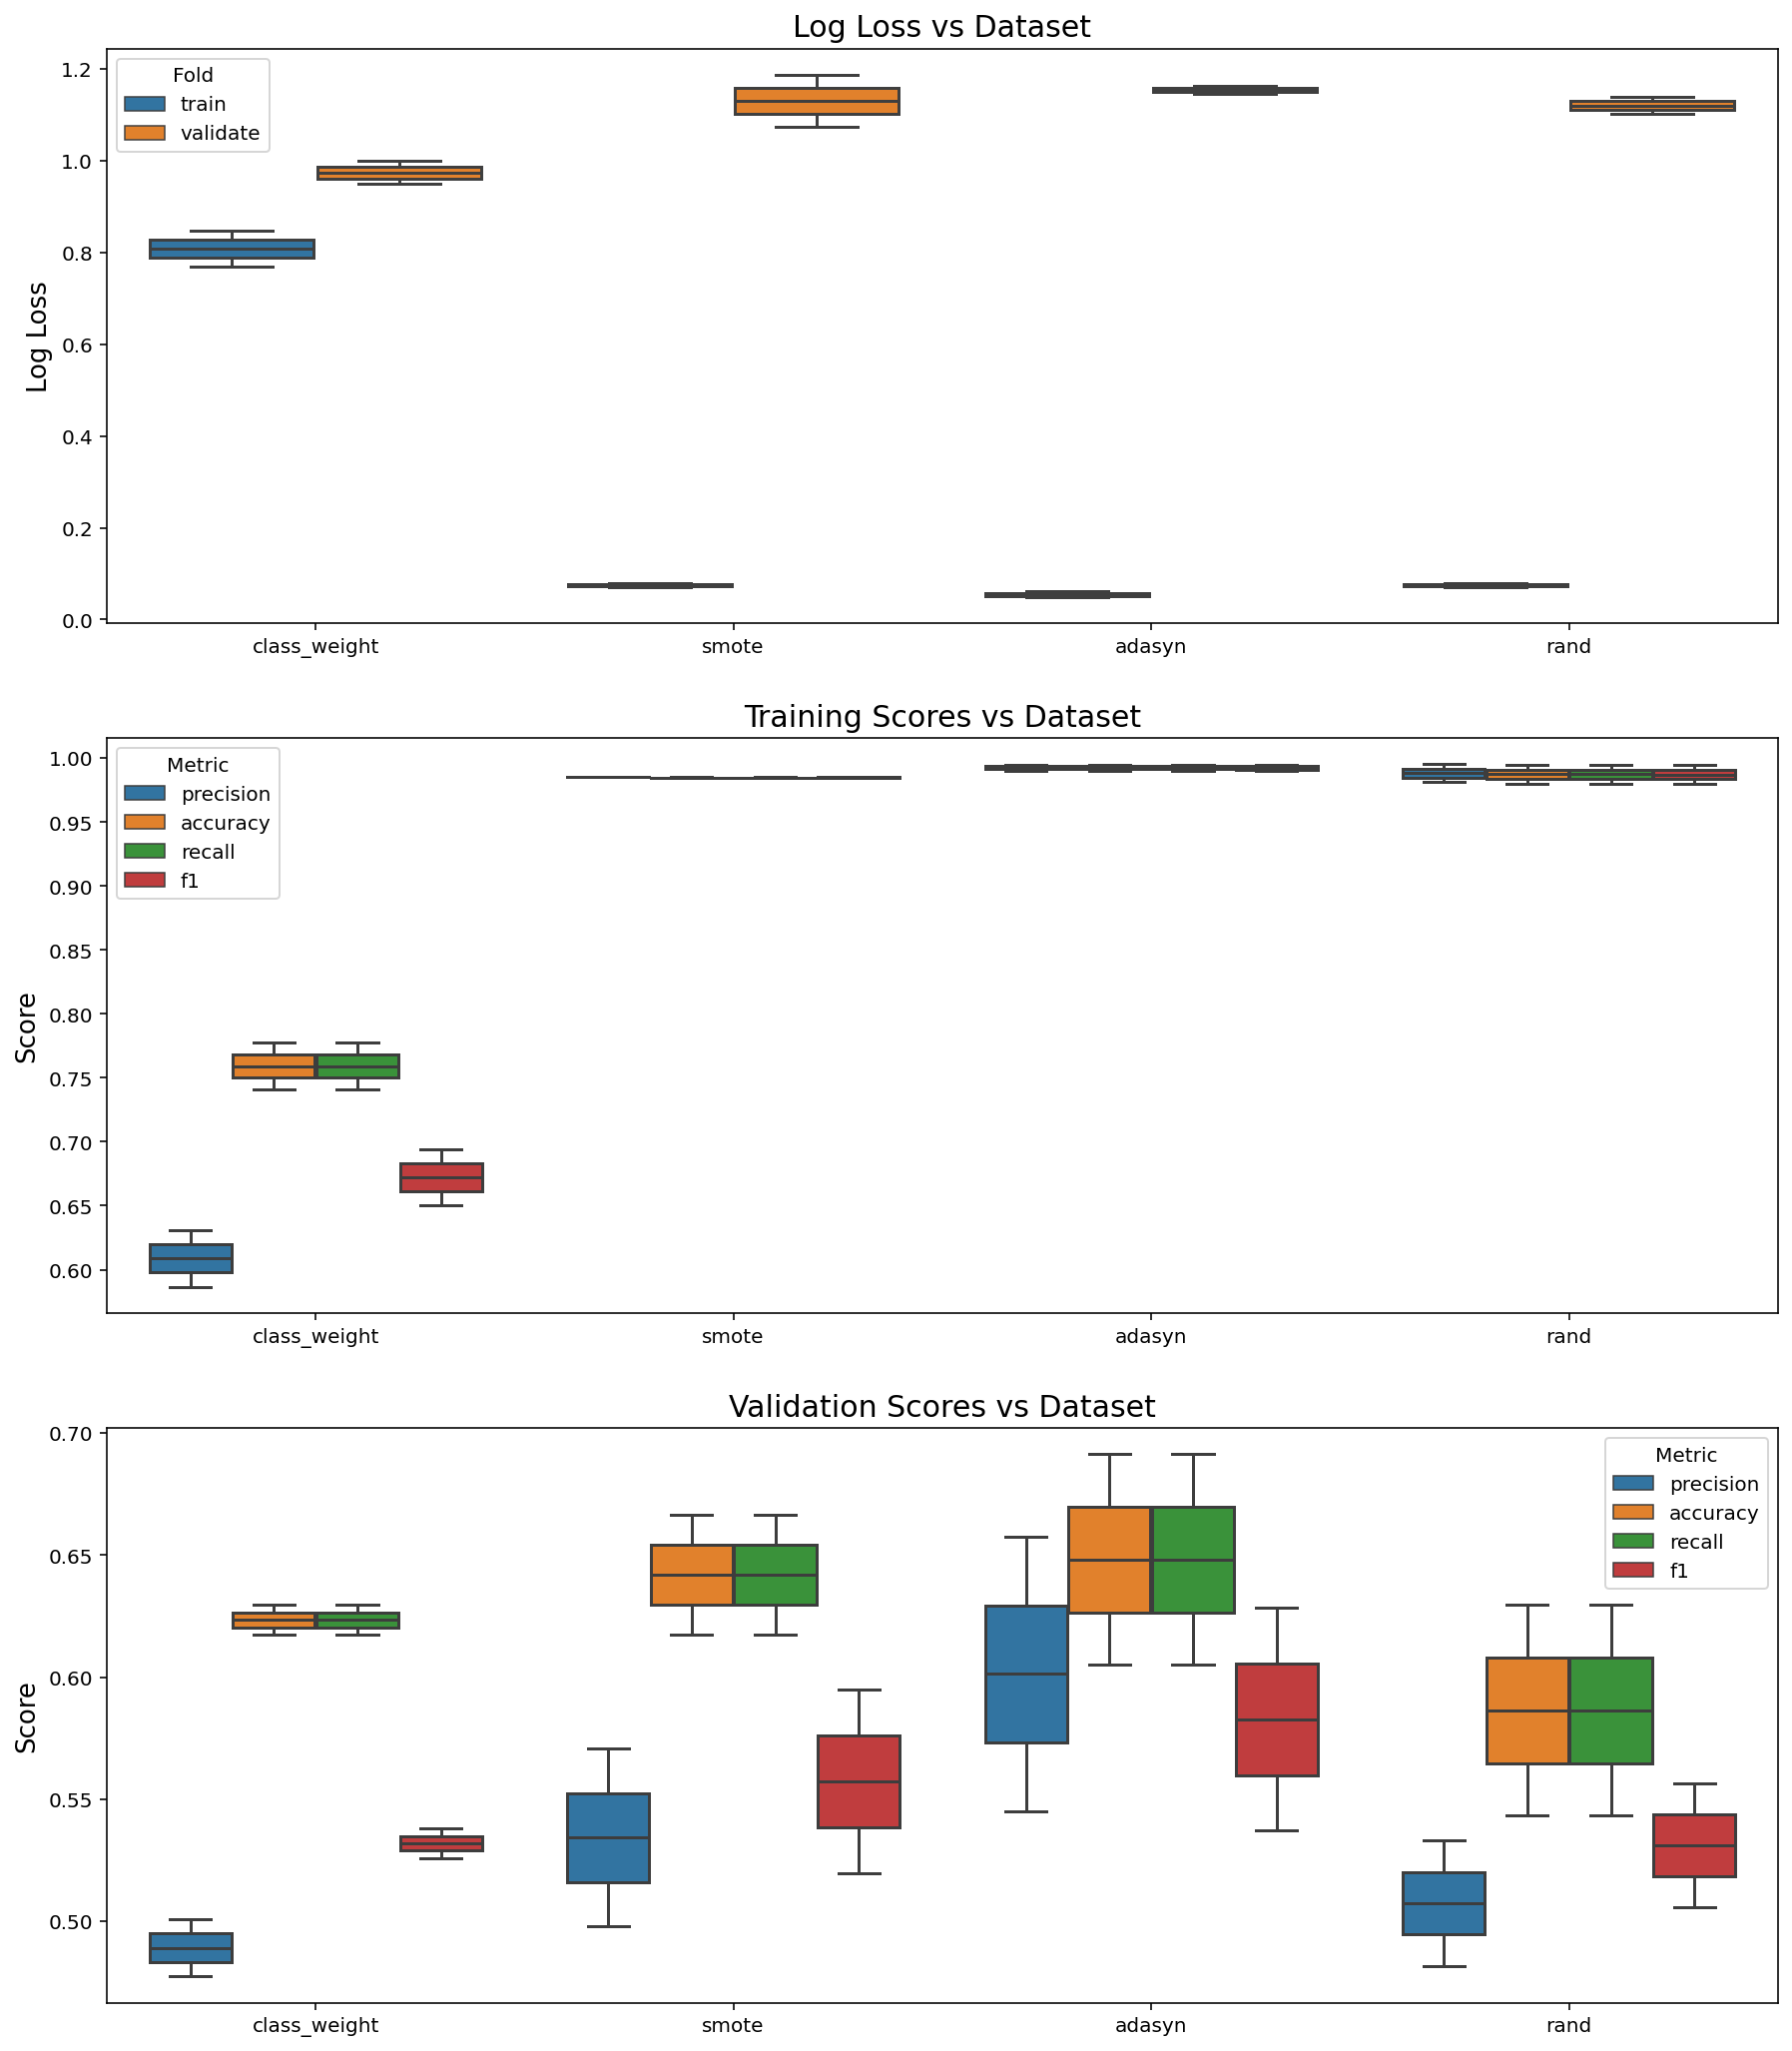

In [48]:
# Plot the metrics for training and validation datasets
plot_metrics(svc_gs)

In [49]:
# Find training and validation metrics
svc_gs_metrics_train,_ = prepare_metrics(svc_gs, train_val='train')
svc_gs_metrics_valid,_ = prepare_metrics(svc_gs, train_val='validate')

# Combine metrics 
svc_gs_metrics = pd.concat([svc_gs_metrics_train,svc_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
svc_gs_metrics.dataset = svc_gs_metrics.dataset+'_'+svc_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
svc_gs_metrics_mean = pd.DataFrame(columns=svc_gs_metrics.metric.unique(),
                                  index=svc_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in svc_gs_metrics_mean.columns:
    for idx in svc_gs_metrics_mean.index:
        avg = svc_gs_metrics.loc[(svc_gs_metrics.metric==col) & (svc_gs_metrics.dataset==idx),'value']
        svc_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy
svc_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
adasyn_train,0.9926,0.99245,0.99245,0.992422
rand_train,0.988115,0.987296,0.987296,0.987279
smote_train,0.985436,0.984847,0.984847,0.984893
class_weight_train,0.608843,0.759259,0.759259,0.672166
adasyn_validate,0.601293,0.648148,0.648148,0.582673
smote_validate,0.534294,0.641975,0.641975,0.557282
class_weight_validate,0.489139,0.623457,0.623457,0.531896
rand_validate,0.507378,0.58642,0.58642,0.530981


`ADASYN` oversampling does marginally well the validation dataset. 

In [50]:
# Fit grid search models with the best training dataset
svc_gs.fit(X_train_resam_ada, y_train_resam_ada)

In [51]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(svc_gs.predictions, pd.DataFrame):
    svc_gs.predict(X_test_embed, y_test)
    svc_gs.predict(X_train_resam_ada, y_train_resam_ada, train_test='train')
svc_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[2, 1, 3, 1, 1, 1, 0, 3, 2, 2, 3, 1, 3, 3, 1, ...","[[0.13922856236233394, 0.11963793179928404, 0....",1.223623,0.296296,0.471939,0.296296,0.324033
1,test,"[2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, ...","[[0.22186113148153447, 0.24680170676706173, 0....",1.389659,0.129630,0.027795,0.129630,0.044217
2,test,"[2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, ...","[[0.24304806258719586, 0.2507276217560443, 0.2...",1.390142,0.129630,0.030385,0.129630,0.046789
3,test,"[2, 1, 3, 0, 1, 1, 0, 3, 2, 2, 1, 1, 1, 1, 1, ...","[[0.14225724400831907, 0.11534511219798191, 0....",1.229095,0.425926,0.579538,0.425926,0.467744
4,test,"[2, 1, 3, 1, 1, 1, 0, 3, 2, 2, 3, 1, 3, 1, 1, ...","[[0.17437964715344403, 0.1434184087817899, 0.5...",1.130098,0.388889,0.566455,0.388889,0.407901


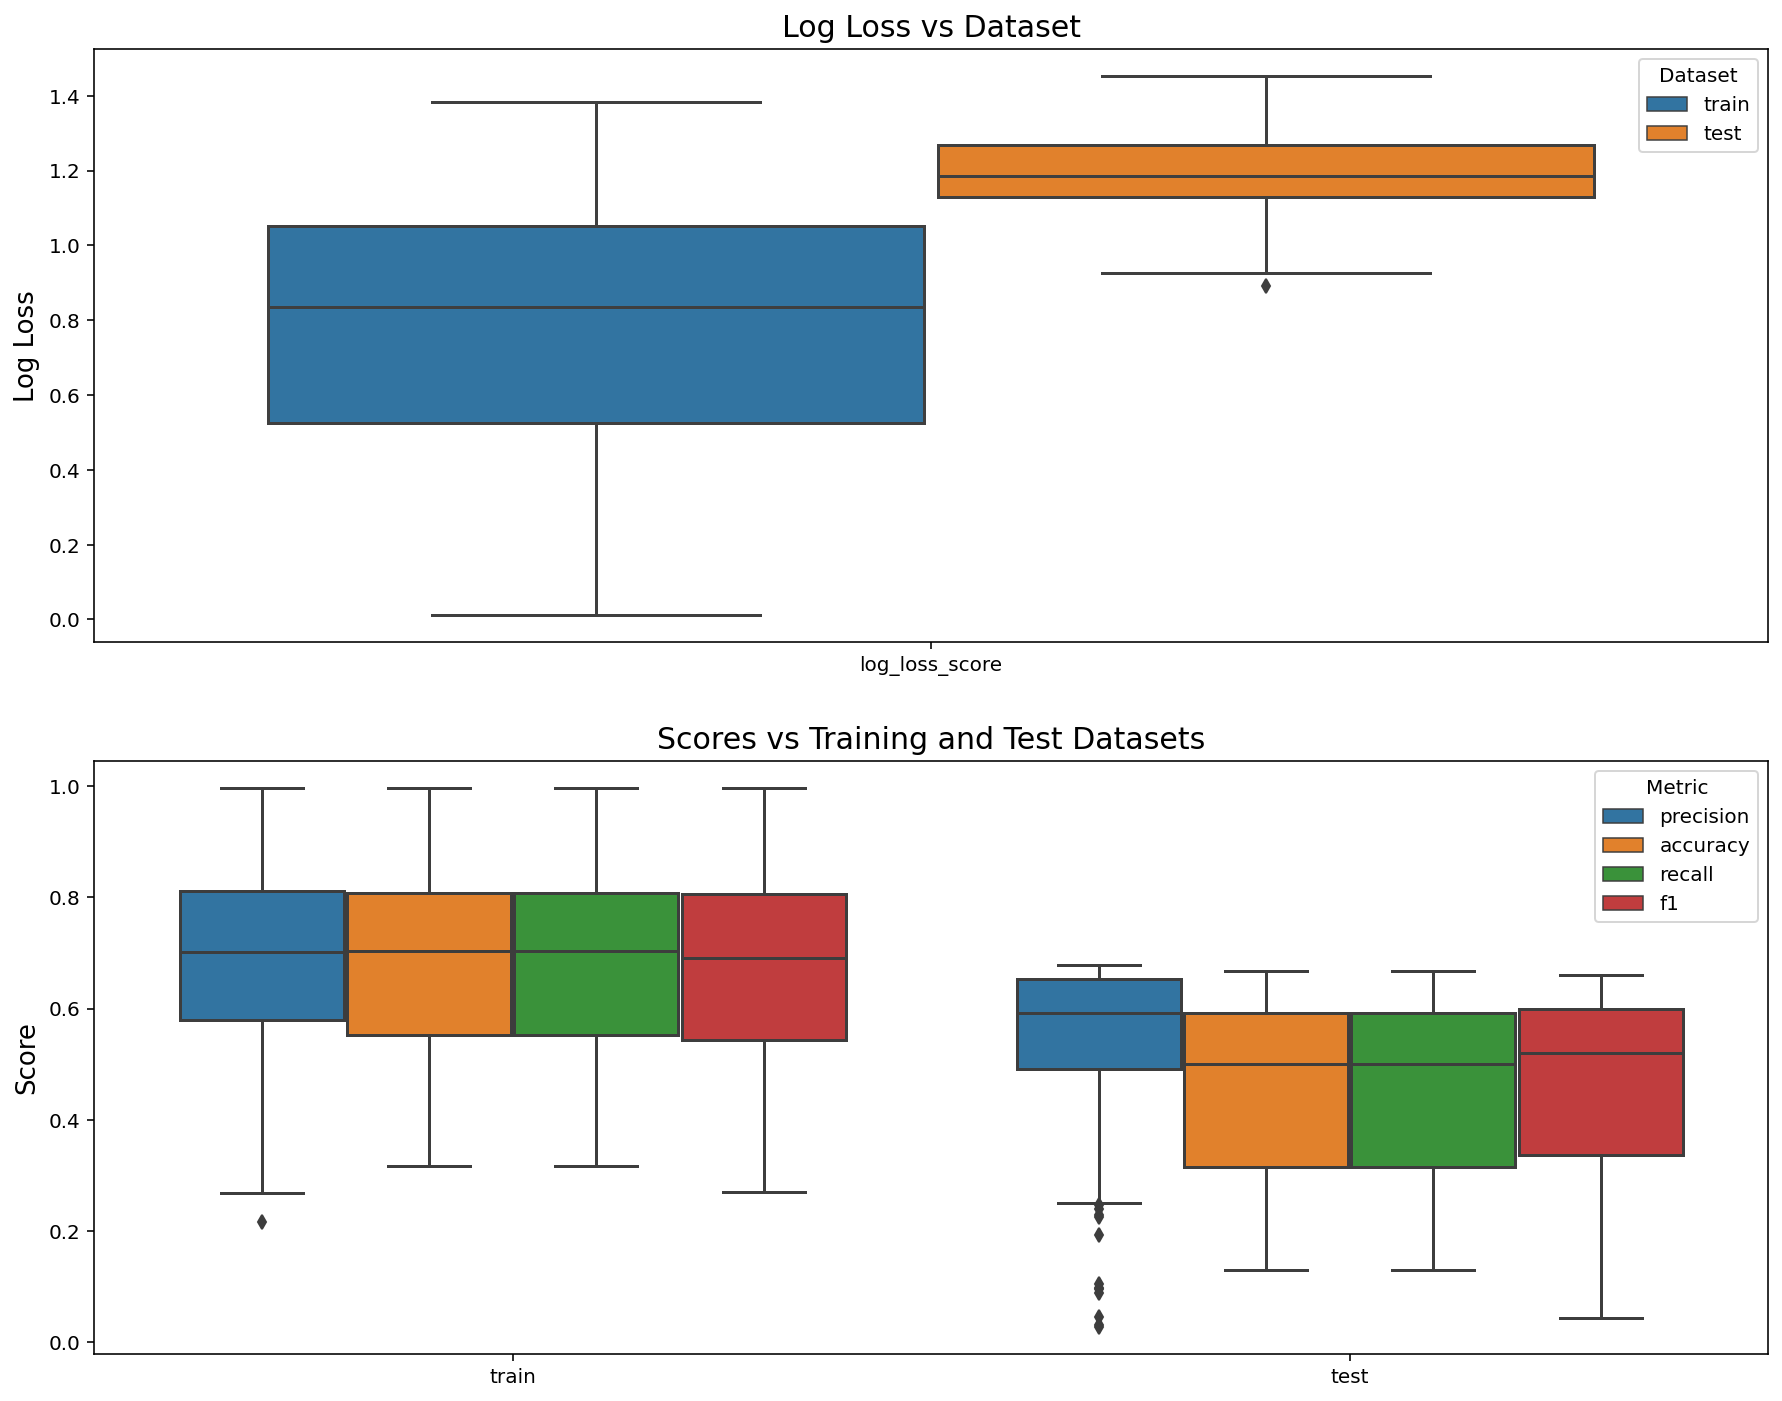

In [52]:
# Plot metrics for predicted values
plot_predictions(svc_gs)

The performances are considerably lower than the previous models. 

In [53]:
# Remove models with recall=1 
svc_gs.predictions = svc_gs.predictions.loc[svc_gs.predictions.recall<1]
svc_gs.predictions.sort_values(by=['recall'], ascending=False).head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
43,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[6.7822366393388366e-06, 0.9973084117791632, ...",0.014057,0.997506,0.997531,0.997506,0.997506
52,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[0.0017383451047460652, 0.9951001844617123, 0...",0.011615,0.997506,0.997531,0.997506,0.997506
34,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[0.0012966476468340607, 0.9954527714737089, 0...",0.025222,0.992519,0.992594,0.992519,0.992531
25,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[0.0022688126942607485, 0.9964836351365204, 0...",0.041045,0.987531,0.987606,0.987531,0.987544
16,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[0.04599427874362547, 0.9125005625449324, 0.0...",0.220153,0.972569,0.974051,0.972569,0.972806


In [54]:
# Find the best model and model metrics based on given metrics 
best_svc_model, best_svc_model_metrics = svc_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_svc_model)

# Store best model metrics 
best_svc_model_metrics = pd.DataFrame(best_svc_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_svc_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_svc_model.get_params

<bound method BaseEstimator.get_params of SVC(C=0.6, gamma=1.0, max_iter=5000.0, probability=True)>

In [55]:
# Best knn model metrics 
best_svc_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,49,test,"[2, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, ...","[[0.11885591764509788, 0.16077998208985758, 0....",0.926308,0.648148,0.67493,0.648148,0.659806


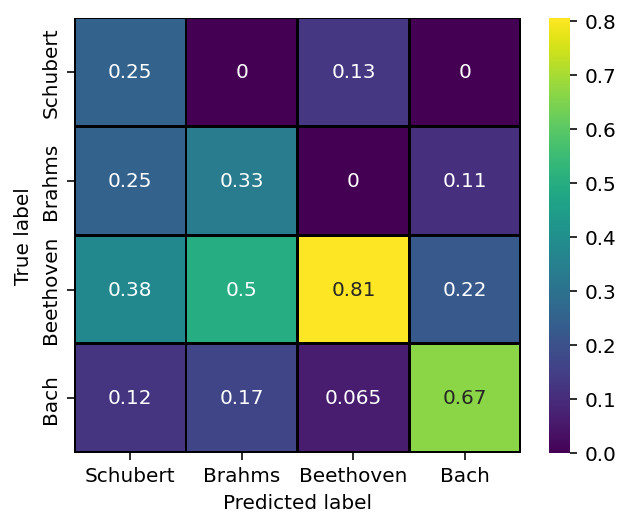

In [56]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_svc_model_metrics.preds[0], normalize='pred',
                      class_names=class_names);

As predicted, the model had significant amount of false negatives, with respect to novice expertise. 

## Information Gain Models

### Decision Tree Classifier

Maximum depth, minimum samples split and criterion were chosen to optimize for a decision tree classifier. Other parameters such as minimum samples leaf cause `zero division` errors and therefore, skipped. 

In [57]:
# Set model name
model_name = 'DecisionTreeClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():

    # Define max_depth range 
    max_depth = np.arange(1, 202, 10)

    # Define min_sample_split range 
    min_samples_split = np.linspace(0.1, 1, 10, endpoint=True)

    # Define parameters ranges 
    params = {'criterion':["'gini'", "'entropy'"],
              'max_depth':['None']+[str(s) for s in np.arange(1, 51, 5)],
              'min_samples_split':['2']+[str(s) for s in min_samples_split],
              'random_state':[str(SEED)]}

    # Create a Custom_GridSearchCV instance
    dt_gs = CGS(model_name, param_grid=params)

else:
    # Replace dt_gs by models_cv 
    dt_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = dt_gs.cross_validate(X_train_embed, y_train, 
                                                 scoring='accuracy',
                                                 SEED=SEED)

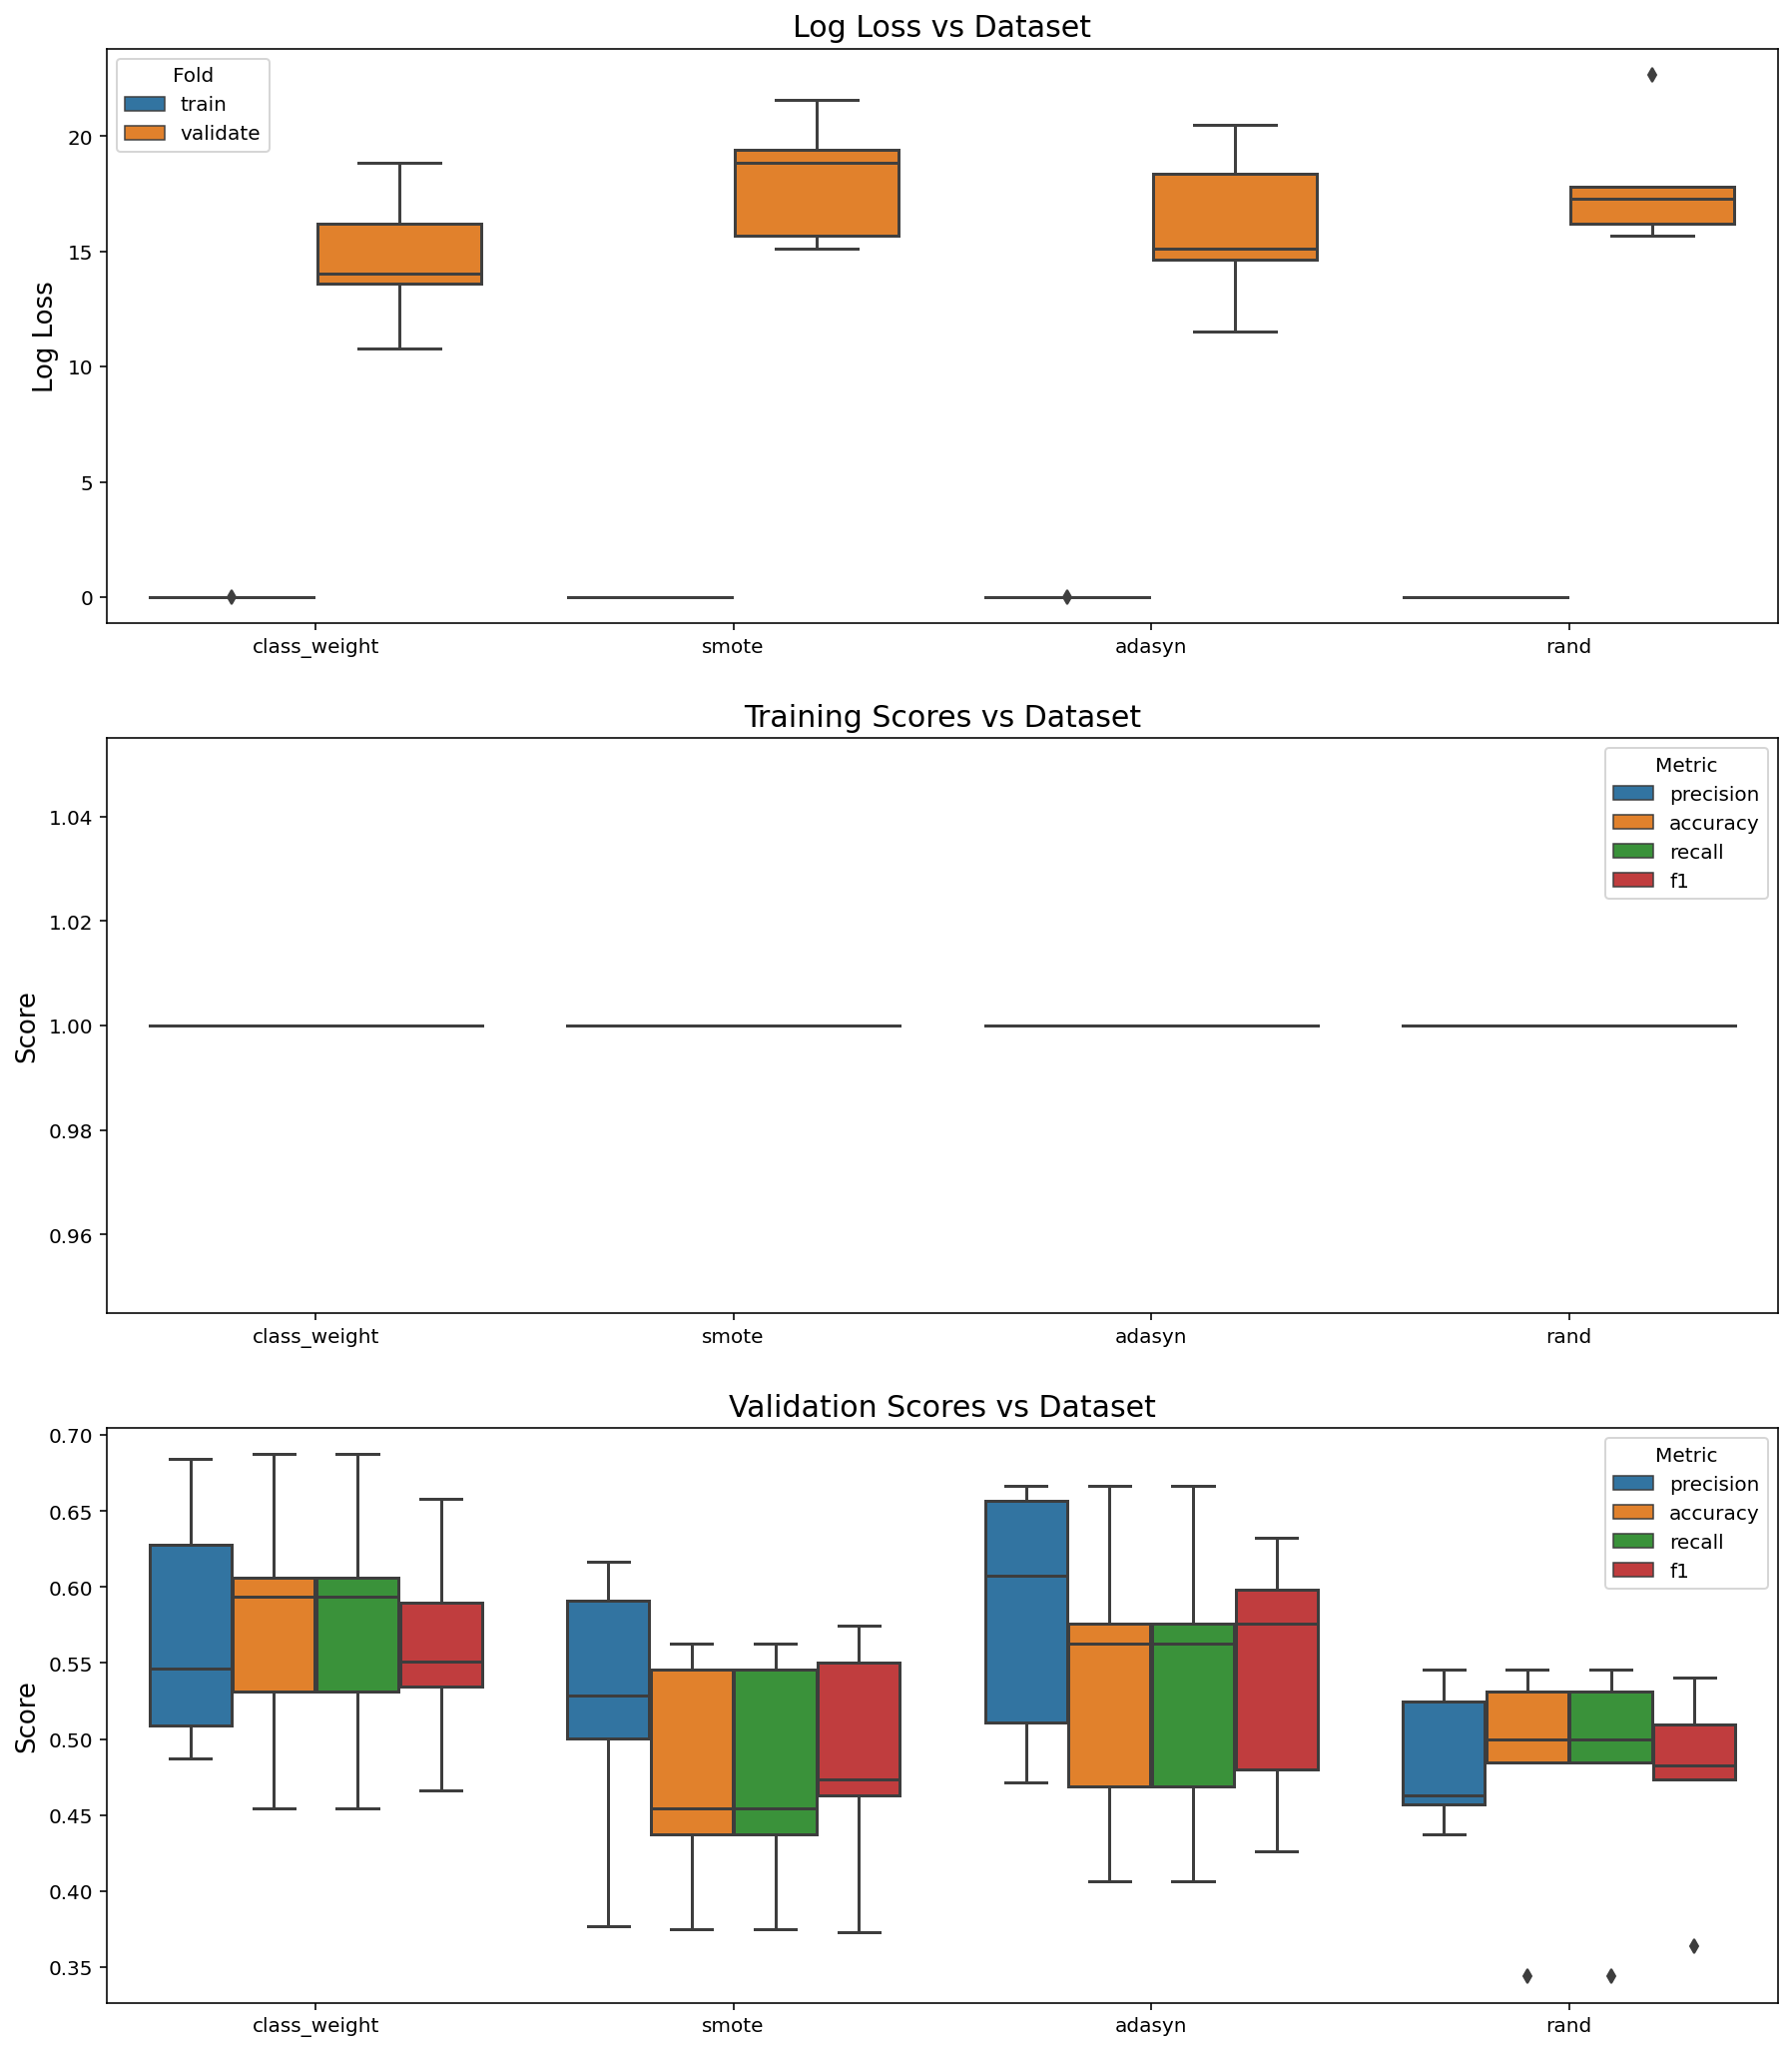

In [58]:
# Plot the metrics for training and validation datasets
plot_metrics(dt_gs)

In [59]:
# Find training and validation metrics
dt_gs_metrics_train,_ = prepare_metrics(dt_gs, train_val='train')
dt_gs_metrics_valid,_ = prepare_metrics(dt_gs, train_val='validate')

# Combine metrics 
dt_gs_metrics = pd.concat([dt_gs_metrics_train,dt_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
dt_gs_metrics.dataset = dt_gs_metrics.dataset+'_'+dt_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
dt_gs_metrics_mean = pd.DataFrame(columns=dt_gs_metrics.metric.unique(),
                                  index=dt_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in dt_gs_metrics_mean.columns:
    for idx in dt_gs_metrics_mean.index:
        avg = dt_gs_metrics.loc[(dt_gs_metrics.metric==col) & (dt_gs_metrics.dataset==idx),'value']
        dt_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy 
dt_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
class_weight_train,1,1,1,1
smote_train,1,1,1,1
adasyn_train,1,1,1,1
rand_train,1,1,1,1
class_weight_validate,0.571069,0.574621,0.574621,0.559923
adasyn_validate,0.582567,0.535985,0.535985,0.542564
smote_validate,0.522742,0.475,0.475,0.486826
rand_validate,0.485539,0.481061,0.481061,0.474084


In [60]:
# Fit grid search models with the best training dataset
# SMOTE has better accuracy and recall values
# Therefore, 'class_weight' is disabled
dt_gs.fit(X_train_embed, y_train, class_weight=True)

In [61]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(dt_gs.predictions, pd.DataFrame):
    dt_gs.predict(X_test_embed, y_test)
    dt_gs.predict(X_train_embed, y_train, train_test='train')
dt_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0], [...",14.071353,0.592593,0.596555,0.592593,0.582282
1,test,"[3, 1, 1, 0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, ...","[[0.14197297909276171, 0.2079402219035399, 0.0...",9.559684,0.462963,0.513548,0.462963,0.482892
2,test,"[2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, ...","[[0.08702477962358661, 0.1189631667581689, 0.6...",6.488212,0.518519,0.586844,0.518519,0.539007
3,test,"[2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, ...","[[0.08702477962358661, 0.1189631667581689, 0.6...",3.664113,0.500000,0.560155,0.500000,0.515124
4,test,"[2, 3, 3, 0, 3, 0, 1, 2, 1, 2, 3, 3, 3, 3, 3, ...","[[0.08702477962358661, 0.1189631667581689, 0.6...",3.613270,0.314815,0.448135,0.314815,0.287672


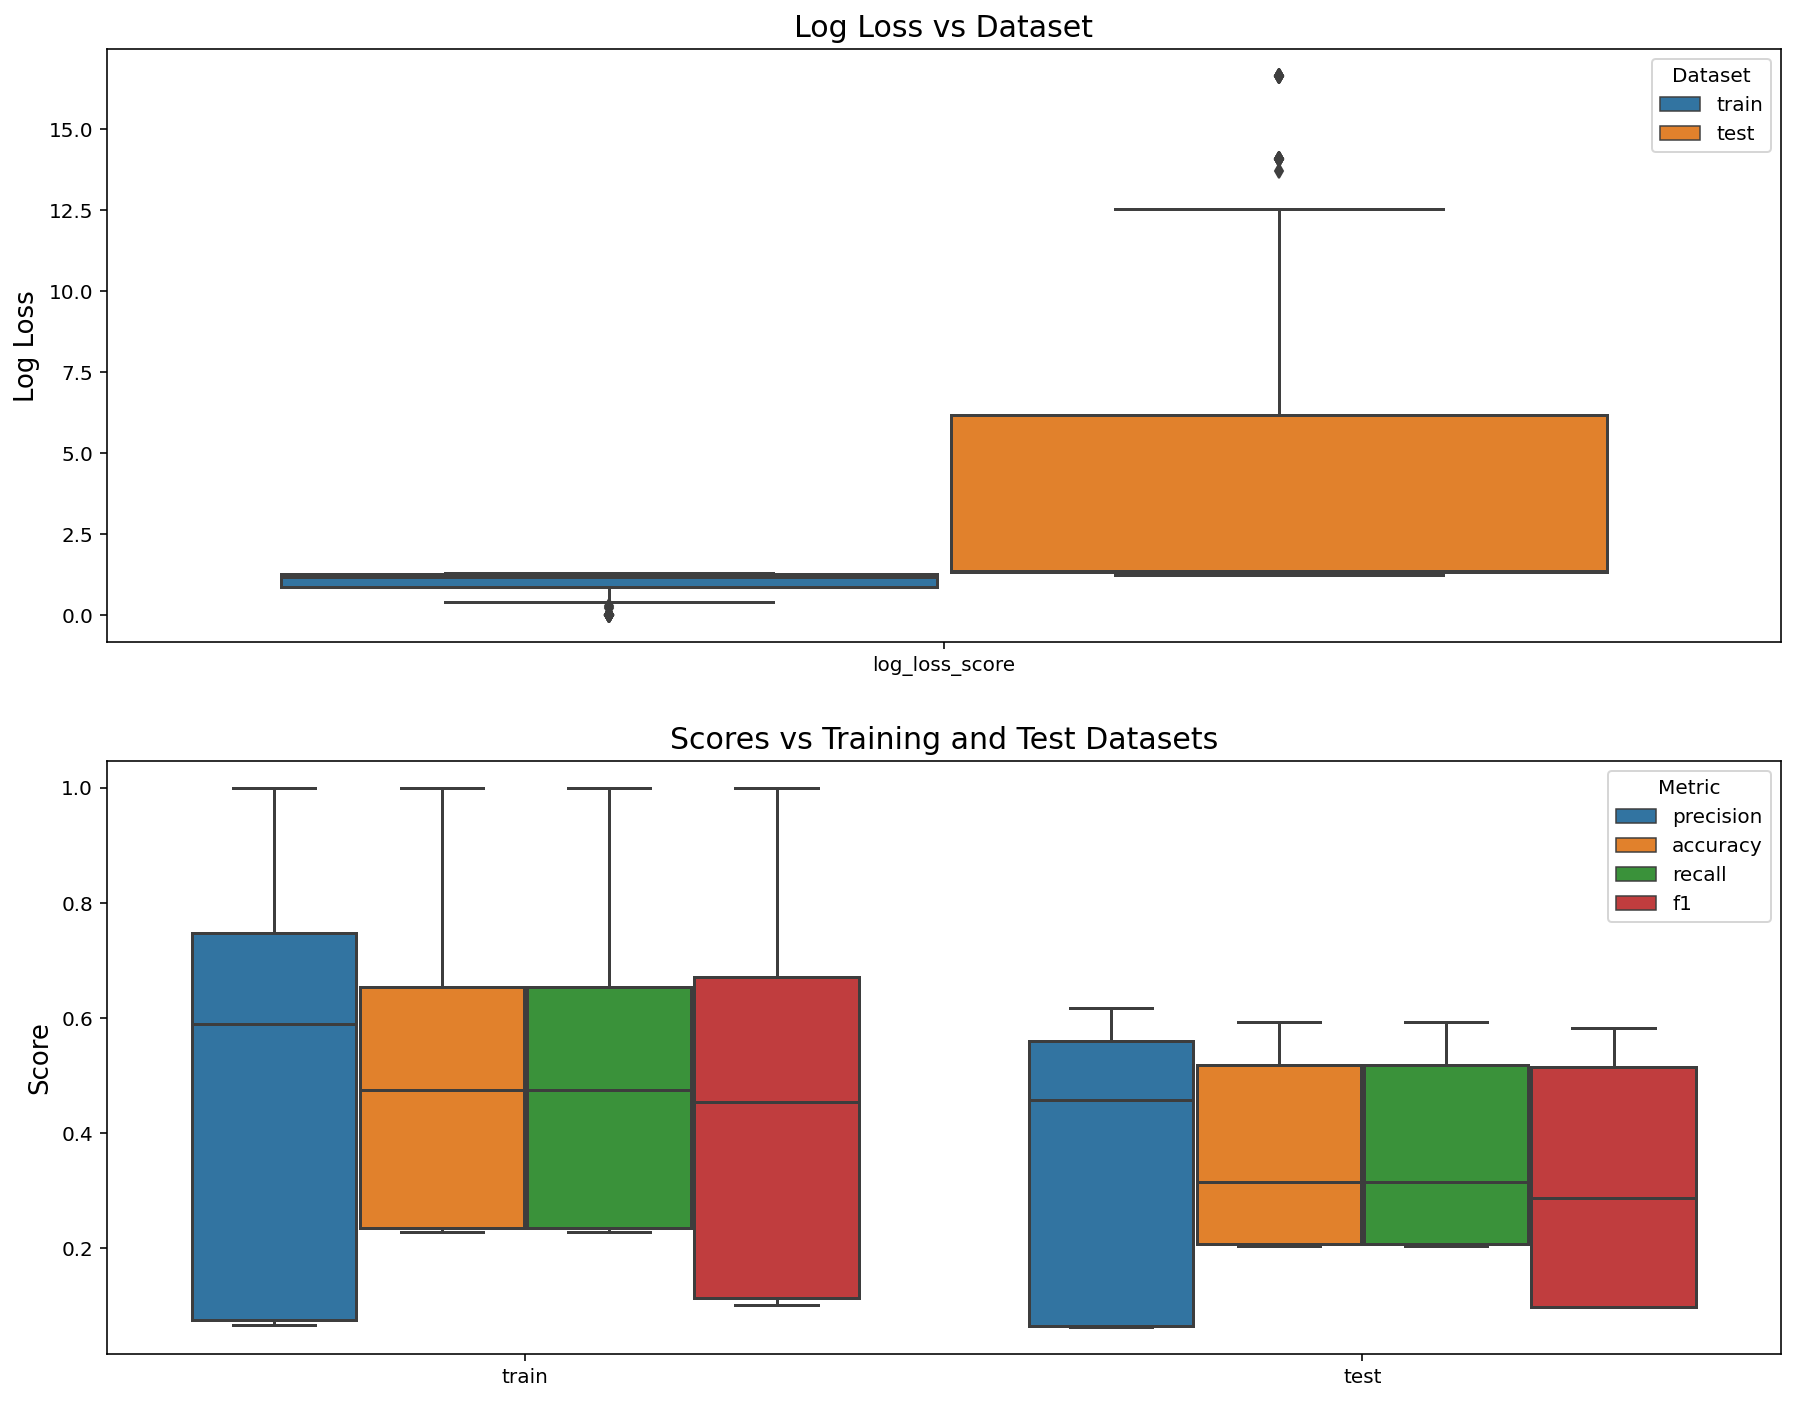

In [62]:
# Plot metrics for predicted values
plot_predictions(dt_gs)

There is a great improvement when fitted with the training dataset as opposed to the cross-validation. 

In [63]:
# Find the best model and model metrics based on given metrics 
best_dt_model, best_dt_model_metrics = dt_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_dt_model)

# Store best model metrics 
best_dt_model_metrics = pd.DataFrame(best_dt_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_dt_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_dt_model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight={0: 1.396551724137931,
                                     1: 0.4090909090909091, 2: 2.7,
                                     3: 2.1315789473684212},
                       random_state=123)>

In [64]:
# Best DT model metrics 
best_dt_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,0,test,"[3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0], [...",14.0714,0.592593,0.596555,0.592593,0.582282


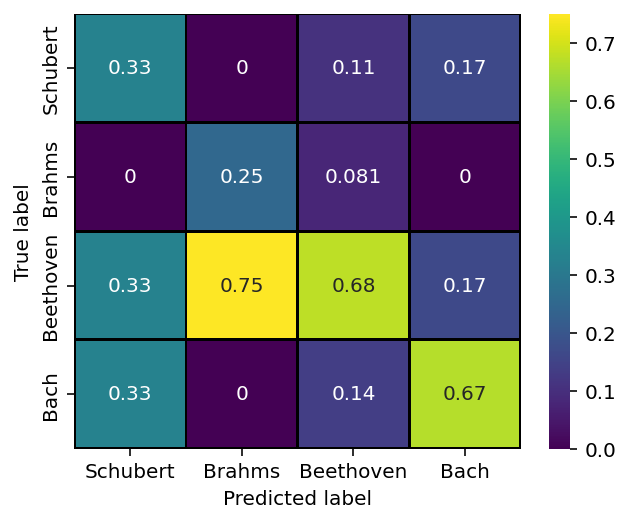

In [65]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_dt_model_metrics.preds[0], normalize='pred',
                     class_names=class_names);

Compared to logistic regression, there are more false positives in the best decision tree model. 

### Random Forest Classifer 

For random forest, the same parameters for the decision tree plus number of estimators are optimized instead. 

In [66]:
# Set model name
model_name = 'RandomForestClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():

    # Define n_estimators range
    n_estimators = np.arange(10, 100, 5)

    # Define max_depth range 
    max_depth = np.arange(1, 202, 5)

    # Define min_sample_split range 
    min_samples_split = np.linspace(0.1, 1, 10, endpoint=True)

    # Define parameters ranges 
    params = {'criterion':["'gini'", "'entropy'"],
              'max_depth':['None']+[str(s) for s in max_depth],
              'min_samples_split':['2']+[str(s) for s in min_samples_split],
              'n_estimators':[str(n) for n in n_estimators],
              'n_jobs':[str(n_cpu)],
              'random_state':[str(SEED)]}

    # Create a Custom_GridSearchCV instance
    rf_gs = CGS(model_name, param_grid=params)
else:
    # Load 'rf_gs' from models_cv
    rf_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = rf_gs.cross_validate(X_train_embed, y_train, 
                                                 scoring='accuracy', 
                                                 SEED=SEED)

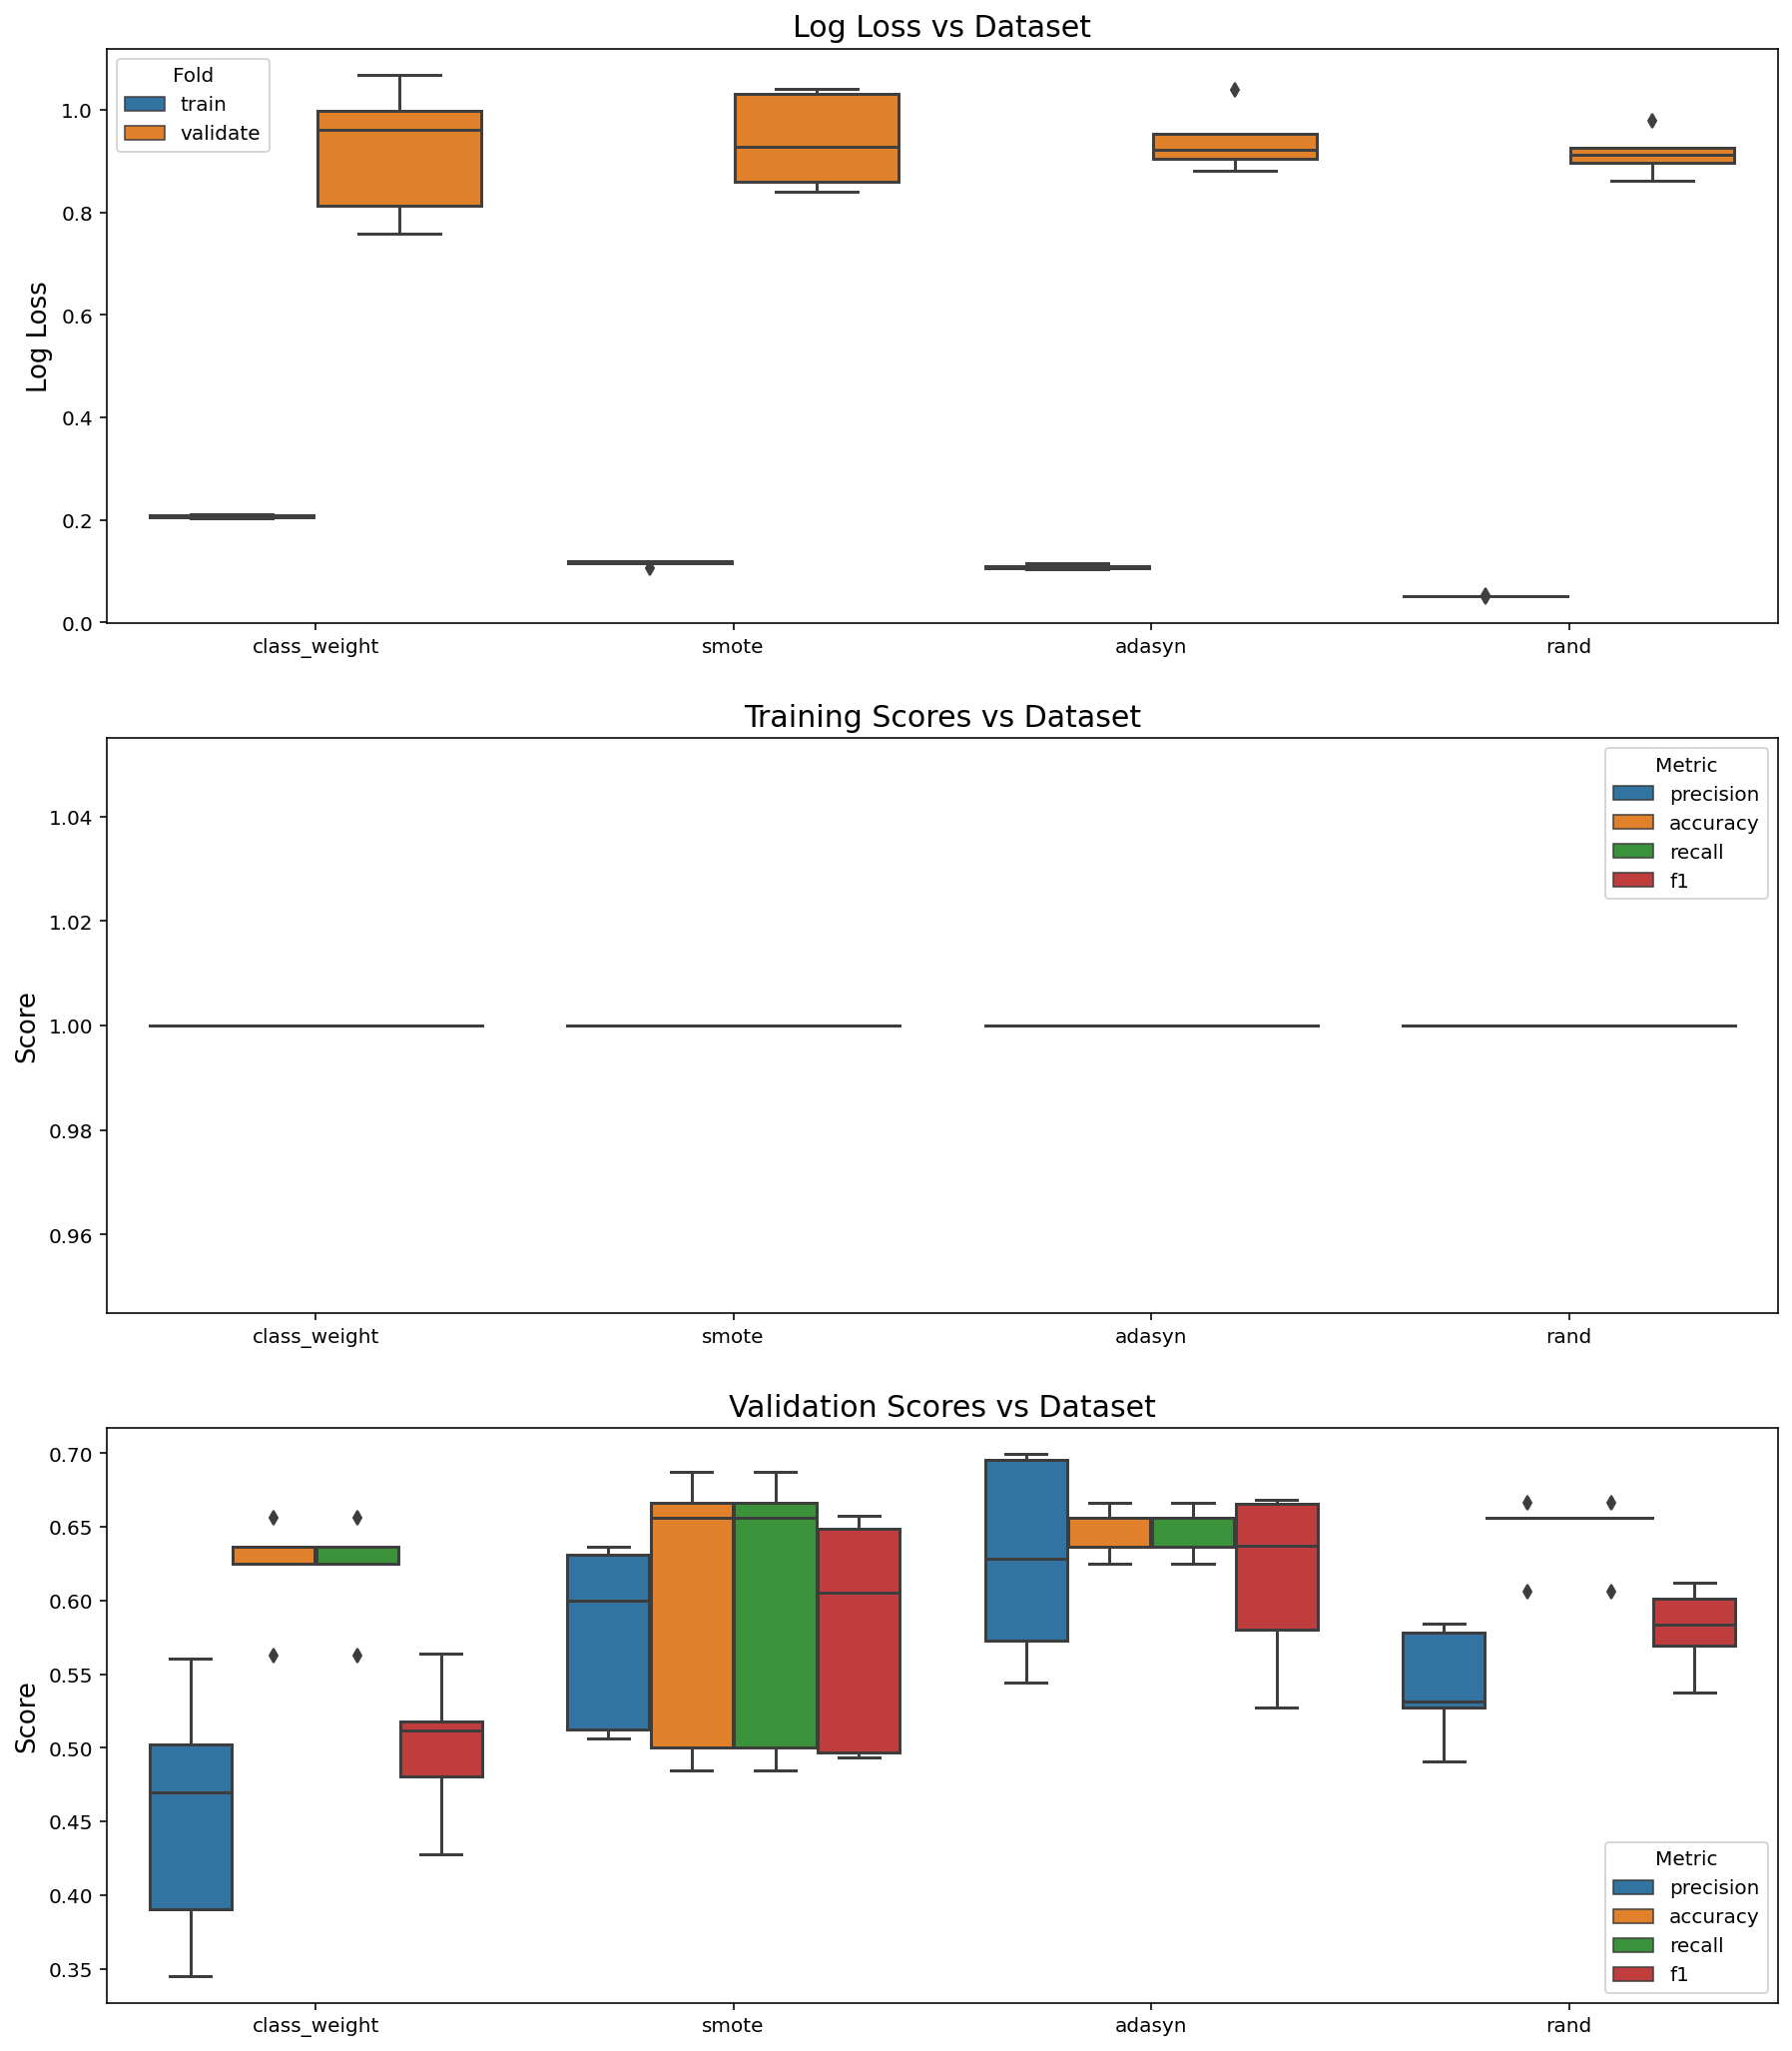

In [67]:
# Plot the metrics for training and validation datasets
plot_metrics(rf_gs)

In [68]:
# Find training and validation metrics
rf_gs_metrics_train,_ = prepare_metrics(rf_gs, train_val='train')
rf_gs_metrics_valid,_ = prepare_metrics(rf_gs, train_val='validate')

# Combine metrics 
rf_gs_metrics = pd.concat([rf_gs_metrics_train,rf_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
rf_gs_metrics.dataset = rf_gs_metrics.dataset+'_'+rf_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
rf_gs_metrics_mean = pd.DataFrame(columns=rf_gs_metrics.metric.unique(),
                                  index=rf_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in rf_gs_metrics_mean.columns:
    for idx in rf_gs_metrics_mean.index:
        avg = rf_gs_metrics.loc[(rf_gs_metrics.metric==col) & (rf_gs_metrics.dataset==idx),'value']
        rf_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy
rf_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
class_weight_train,1,1,1,1
smote_train,1,1,1,1
adasyn_train,1,1,1,1
rand_train,1,1,1,1
adasyn_validate,0.628119,0.648106,0.648106,0.615802
rand_validate,0.542332,0.648295,0.648295,0.580768
smote_validate,0.577382,0.599053,0.599053,0.580404
class_weight_validate,0.453584,0.623295,0.623295,0.500462


In [69]:
# Fit grid search models with the best training dataset
# SMOTE has better accuracy and recall values
# Therefore, 'class_weight' is disabled
rf_gs.fit(X_train_resam_ada, y_train_resam_ada)

In [70]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(rf_gs.predictions, pd.DataFrame):
    rf_gs.predict(X_test_embed, y_test)
    rf_gs.predict(X_train_resam_ada, y_train_resam_ada, train_test='train')
rf_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, ...","[[0.2, 0.3, 0.3, 0.2], [0.0, 0.6, 0.1, 0.3], [...",2.653569,0.592593,0.579521,0.592593,0.585959
1,test,"[3, 1, 3, 0, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, ...","[[0.26666666666666666, 0.2, 0.2, 0.33333333333...",1.445489,0.648148,0.697666,0.648148,0.660067
2,test,"[3, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, ...","[[0.25, 0.15, 0.2, 0.4], [0.05, 0.4, 0.1, 0.45...",1.438006,0.648148,0.734703,0.648148,0.674176
3,test,"[3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, ...","[[0.28, 0.12, 0.24, 0.36], [0.04, 0.4, 0.12, 0...",0.838896,0.666667,0.735256,0.666667,0.686114
4,test,"[0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, ...","[[0.3333333333333333, 0.13333333333333333, 0.2...",0.838106,0.722222,0.747795,0.722222,0.721778


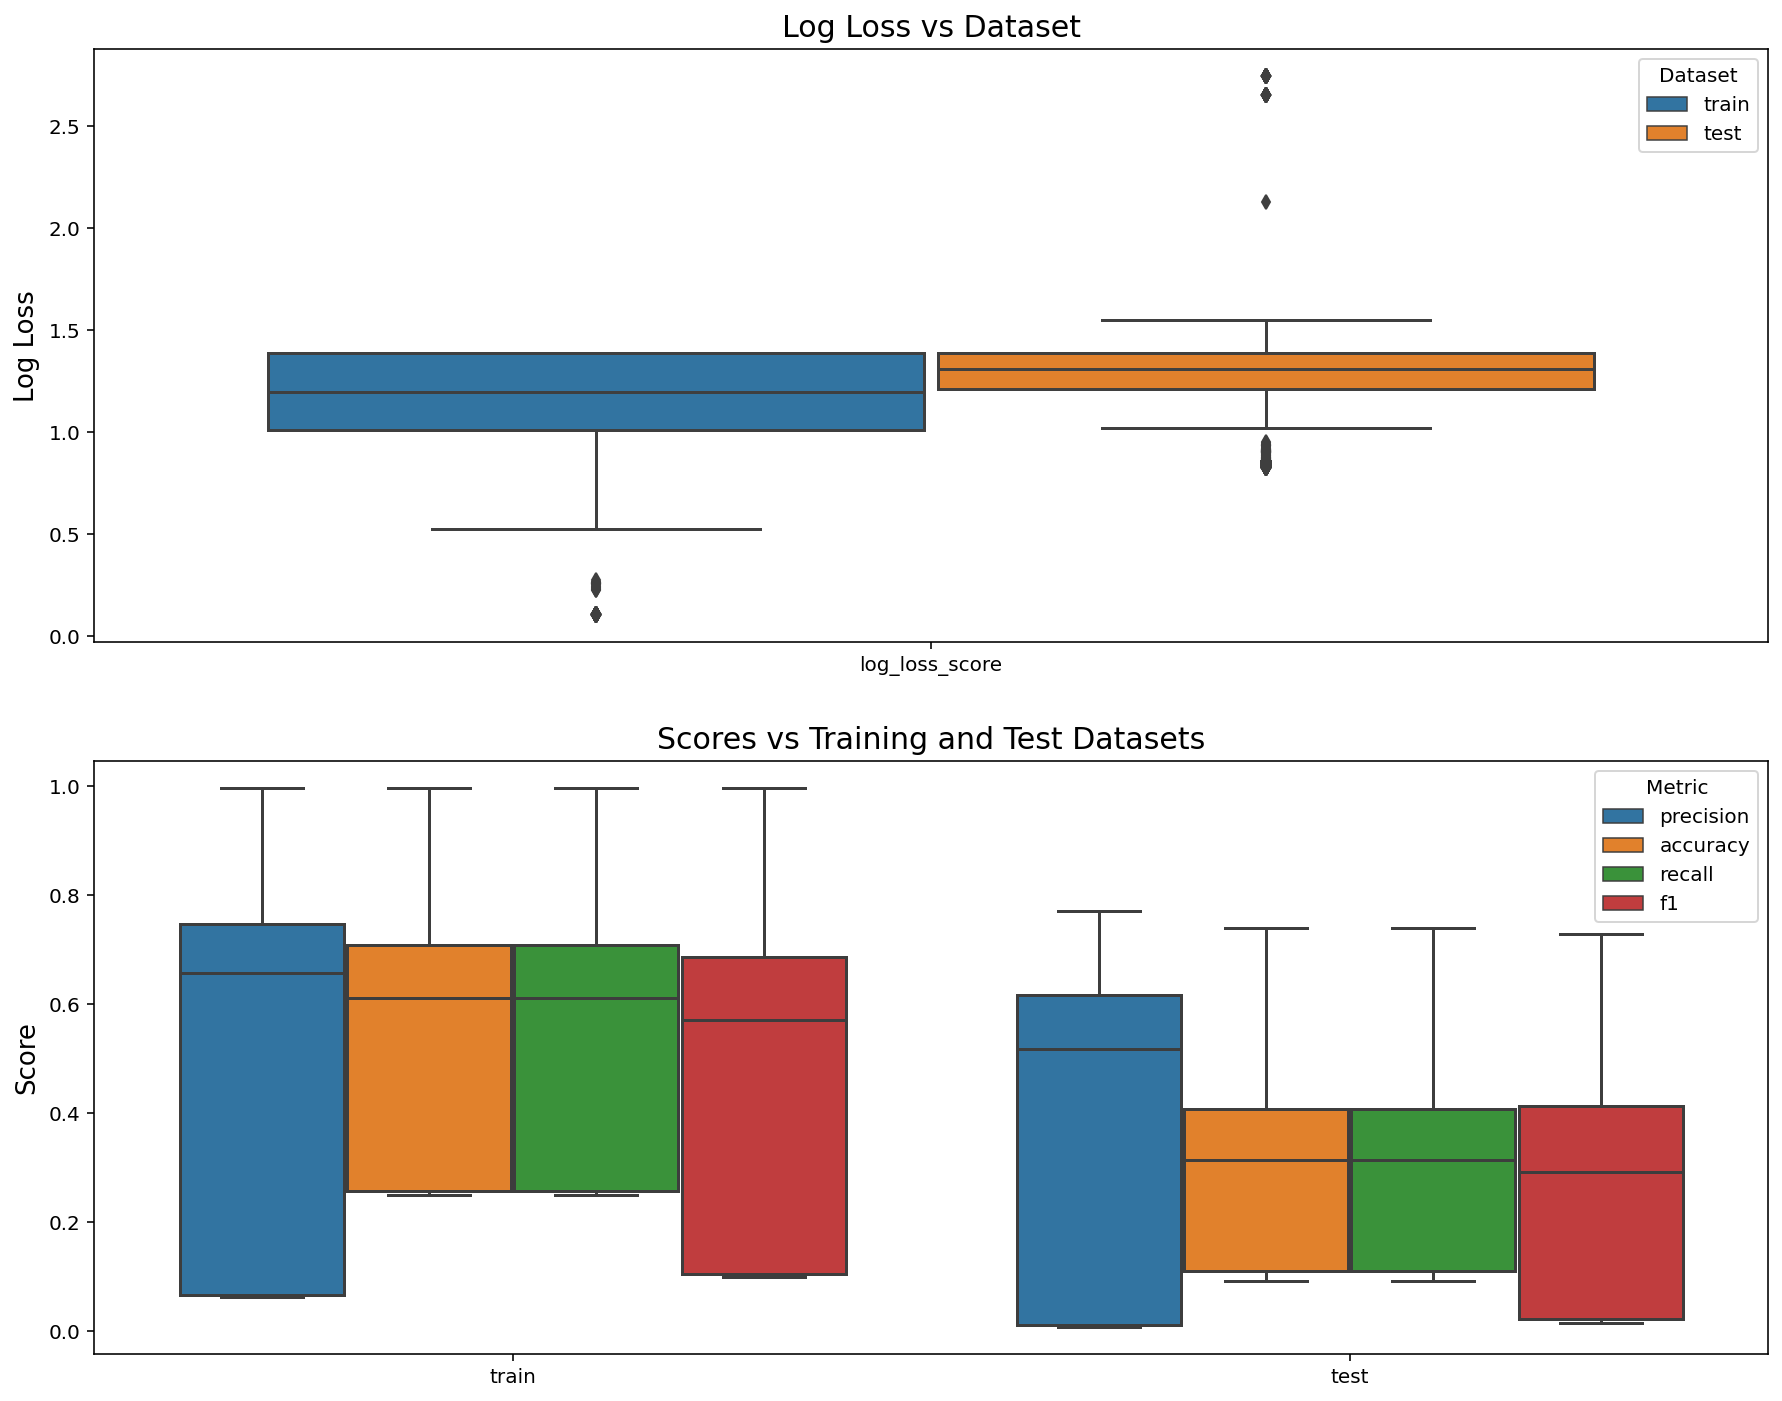

In [71]:
# Plot metrics for predicted values
plot_predictions(rf_gs)

Some of the parameters used in random forest caused zero division error when thrown into `recall_score` function. That is why the standard deviation of the ROC curve is larger towards the center. Therefore, all recall values equal to 1 are removed. 

In [72]:
# Remove models with recall=1 
rf_gs.predictions = rf_gs.predictions.loc[rf_gs.predictions.recall<1]
rf_gs.predictions.sort_values(by=['recall'], ascending=False).head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
8716,train,"[1, 3, 1, 0, 1, 1, 0, 3, 2, 1, 3, 1, 1, 1, 1, ...","[[0.07133655394524958, 0.8673978609085286, 0.0...",0.228161,0.997506,0.997530,0.997506,0.997506
402,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, ...","[[0.08435359299603429, 0.6992951990212463, 0.0...",0.262587,0.997506,0.997531,0.997506,0.997506
11484,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 0, 3, 1, 1, 1, 1, ...","[[0.0, 0.9, 0.1, 0.0], [0.0, 0.0, 0.0, 1.0], [...",0.103669,0.997506,0.997531,0.997506,0.997506
5346,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 0, 3, 1, 1, 1, 1, ...","[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...",0.107319,0.997506,0.997531,0.997506,0.997506
16434,train,"[1, 3, 1, 0, 1, 1, 0, 1, 2, 0, 3, 1, 1, 1, 1, ...","[[0.0, 0.9, 0.1, 0.0], [0.0, 0.0, 0.0, 1.0], [...",0.103669,0.997506,0.997531,0.997506,0.997506


In [73]:
# Find the best model and model metrics based on given metrics 
best_rf_model, best_rf_model_metrics = rf_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_rf_model)

# Store best model metrics 
best_rf_model_metrics = pd.DataFrame(best_rf_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_rf_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_rf_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=45, n_jobs=7, random_state=123)>

In [74]:
# Best RF model metrics 
best_rf_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,7,test,"[3, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, ...","[[0.28888888888888886, 0.15555555555555556, 0....",0.839918,0.740741,0.770238,0.740741,0.729355


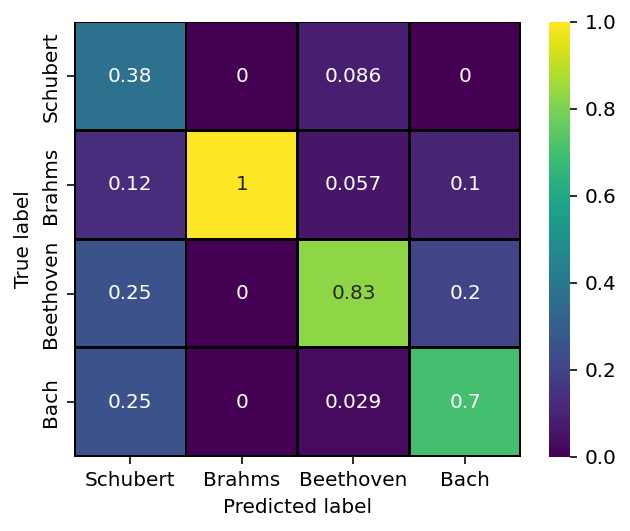

In [75]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_rf_model_metrics.preds[0], normalize='pred',
                     class_names=class_names);

This is the best prediction so far. 

### Adaptive Boosting Classifier

For adaptive boosting, number of estimators and learning rates were used for model grid search. Adaptive boosting, just as KNN does not have `class_weight` attribute. 

In [76]:
# Set model name
model_name = 'AdaBoostClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():

    # Define n_estimators range
    n_estimators = np.arange(10, 100, 2)

    # Define min_sample_split range 
    learning_rate = np.linspace(0.1, 1, 10, endpoint=True)
    
    # Define parameters ranges 
    params = {'learning_rate':[str(s) for s in learning_rate],
              'n_estimators':[str(n) for n in n_estimators],
              'random_state':[str(SEED)]}

    # Create a Custom_GridSearchCV instance
    ab_gs = CGS(model_name, param_grid=params)
else:
    # Load 'ab_gs' by from models_cv
    ab_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = ab_gs.cross_validate(X_train_embed, y_train, 
                                                 scoring='accuracy',
                                                 SEED=SEED)

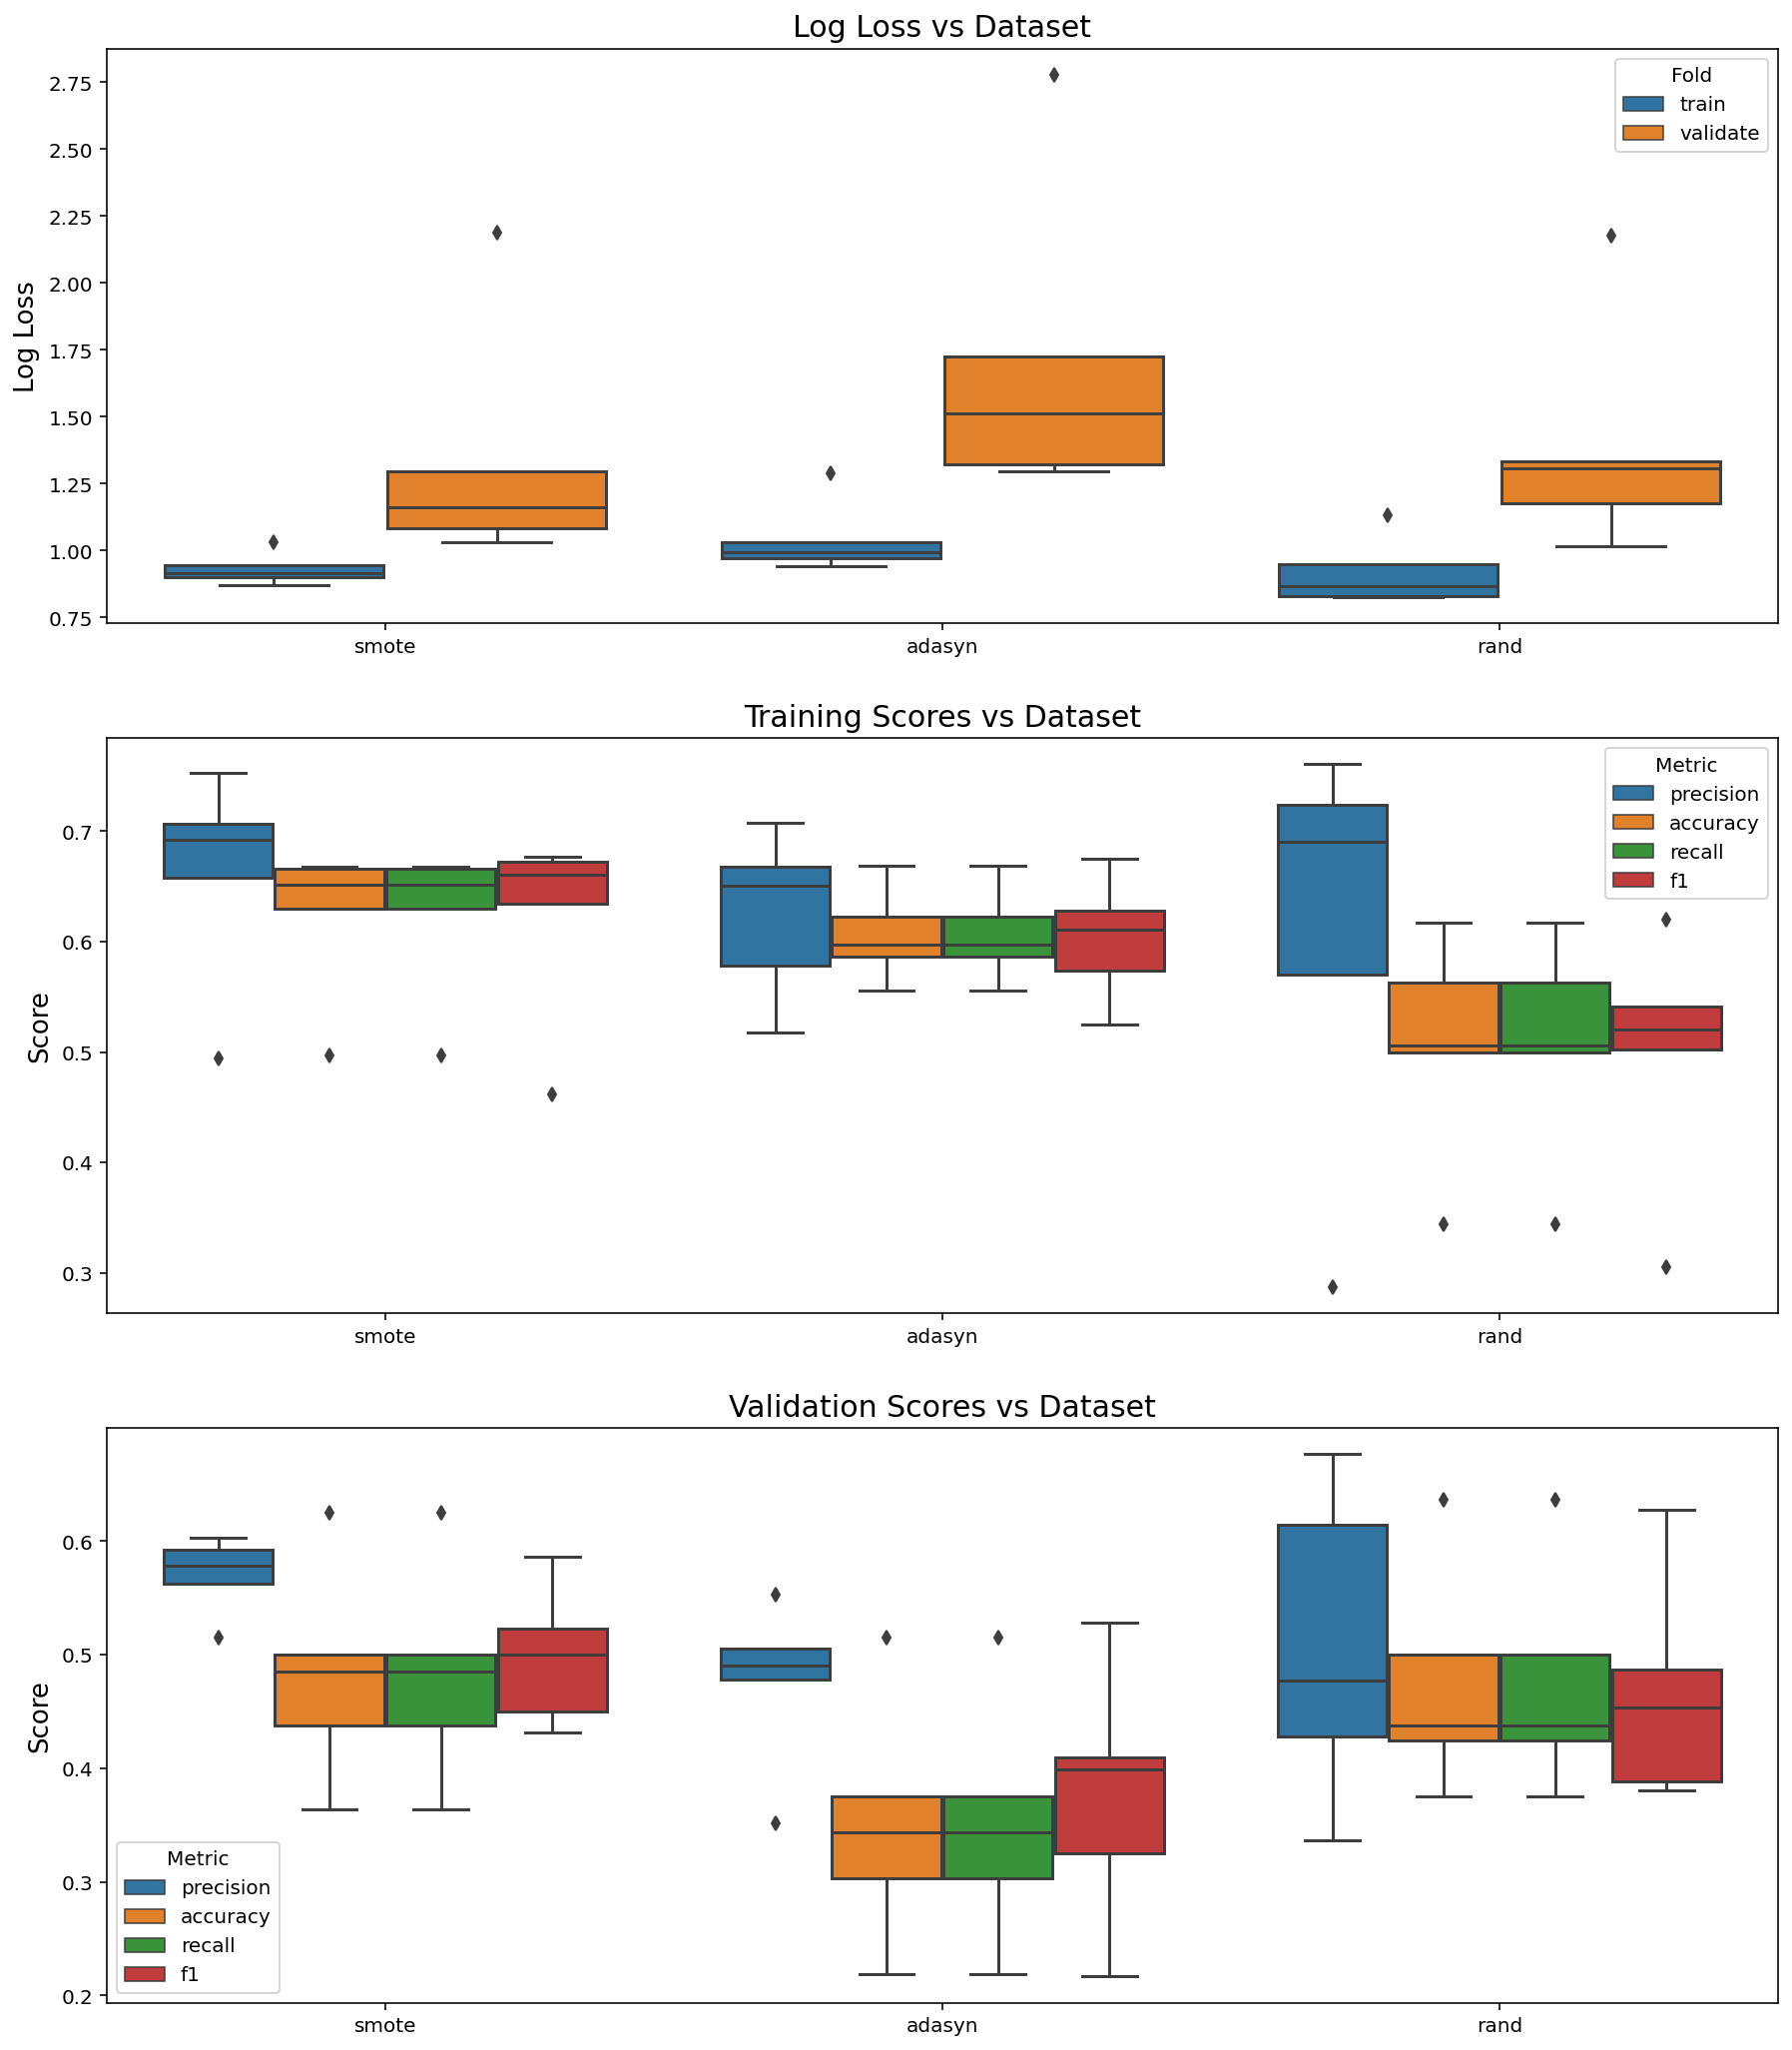

In [77]:
# Plot the metrics for training and validation datasets
plot_metrics(ab_gs)

In [78]:
# Find training and validation metrics
ab_gs_metrics_train,_ = prepare_metrics(ab_gs, train_val='train')
ab_gs_metrics_valid,_ = prepare_metrics(ab_gs, train_val='validate')

# Combine metrics 
ab_gs_metrics = pd.concat([ab_gs_metrics_train,ab_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
ab_gs_metrics.dataset = ab_gs_metrics.dataset+'_'+ab_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
ab_gs_metrics_mean = pd.DataFrame(columns=ab_gs_metrics.metric.unique(),
                                  index=ab_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in ab_gs_metrics_mean.columns:
    for idx in ab_gs_metrics_mean.index:
        avg = ab_gs_metrics.loc[(ab_gs_metrics.metric==col) & (ab_gs_metrics.dataset==idx),'value']
        ab_gs_metrics_mean.loc[idx,col] = avg.mean()

# Sort average metrics by recall, AUC and accuracy
ab_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
smote_train,0.660704,0.622366,0.622366,0.621282
adasyn_train,0.624437,0.606219,0.606219,0.602576
smote_validate,0.570322,0.482197,0.482197,0.498359
rand_train,0.606572,0.506092,0.506092,0.497865
rand_validate,0.506546,0.474621,0.474621,0.467582
adasyn_validate,0.475541,0.351136,0.351136,0.375708


In [79]:
# Fit grid search models with the best training dataset
# Random oversampling has better accuracy and recall values
# Therefore, 'class_weight' is disabled
ab_gs.fit(X_train_resam_rand, y_train_resam_rand)

In [80]:
# Predict test and training datasets 
# Also get the metrics of fit
# Check if the models have not been predicted yet 
if not isinstance(ab_gs.predictions, pd.DataFrame): 
    ab_gs.predict(X_test_embed, y_test)
    ab_gs.predict(X_train_resam_rand, y_train_resam_rand, train_test='train')
ab_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[1, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, ...","[[0.03688094013018598, 0.5758974471737678, 0.3...",1.226981,0.407407,0.517881,0.407407,0.425930
1,test,"[1, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, ...","[[0.05827860115424811, 0.5667960272642424, 0.3...",1.217503,0.388889,0.566799,0.388889,0.418056
2,test,"[1, 1, 3, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, ...","[[0.11842268245696569, 0.7521099088158965, 0.0...",1.237945,0.555556,0.555638,0.555556,0.548116
3,test,"[1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, ...","[[0.1385112594566042, 0.728249156990062, 0.006...",1.289781,0.592593,0.548354,0.592593,0.568150
4,test,"[1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.15832173167822194, 0.6908150900120632, 0.0...",1.258249,0.629630,0.554167,0.629630,0.586363


Similar to random forest, some models resulted in zero division or recall. Therefore, all recall values less than one were considered instead.  

In [81]:
# Remove models with recall=1 
ab_gs.predictions = ab_gs.predictions.loc[ab_gs.predictions.recall<1]
ab_gs.predictions.sort_values(by=['recall'], ascending=False).head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
180,test,"[1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[[0.025167330379322655, 0.9260737446370129, 0....",1.257797,0.703704,0.705247,0.703704,0.684382
28,test,"[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.2327003647858215, 0.5909235395851198, 0.02...",1.221294,0.703704,0.743893,0.703704,0.645192
426,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, ...","[[0.2385854880862981, 0.4977046957947437, 0.09...",1.048291,0.703704,0.671296,0.703704,0.653439
44,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.20112385215512152, 0.5737876374343627, 0.0...",1.172967,0.703704,0.771991,0.703704,0.639918
25,test,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.22575248843158333, 0.6109148139006426, 0.0...",1.206463,0.703704,0.753472,0.703704,0.642054


In [82]:
# Find the best model and model metrics based on given metrics 
best_ab_model, best_ab_model_metrics = ab_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_ab_model)

# Store best model metrics 
best_ab_model_metrics = pd.DataFrame(best_ab_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_ab_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_ab_model.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(learning_rate=0.5, n_estimators=10, random_state=123)>

In [83]:
# Best AB model metrics 
best_ab_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,180,test,"[1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[[0.025167330379322655, 0.9260737446370129, 0....",1.2578,0.703704,0.705247,0.703704,0.684382


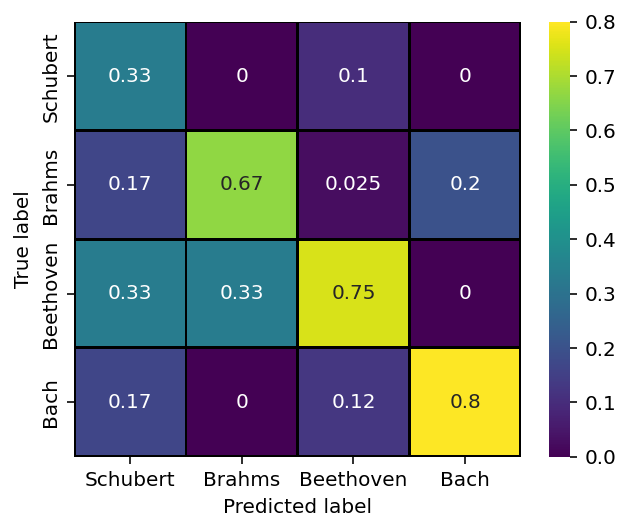

In [84]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_ab_model_metrics.preds[0], normalize='pred',
                     class_names=class_names);

The predictions with the best adaptive boosting model are somewhat similar to that of random forest. Therefore, it is possible to say that these two models are approaching the theoretical limit of an ideal classifier. 

## Gradient Boosting Models 

### Extreme Gradient Boosting 

In addition to the parameters used for random forest, learning rate is added as a parameter for Extreme Gradient Boosting (`XGBoost`). Also notice that `GPU` is enabled for `XGBoost`. 

In [85]:
# Set model name
model_name = 'XGBClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():
    # Define n_estimators range
    n_estimators = np.arange(10, 101, 20)

    # Define learning rate range
    learning_rate = [0.001,0.01,0.1,0.2,0.3]

    # Define min_child_weight range 
    min_child_weight = np.arange(1, 5)

    # Define max_depth range 
    max_depth = np.arange(5, 10)
          
    # Define parameters ranges 
    params = {'learning_rate': [str(l) for l in learning_rate],
              'max_depth': ['None']+[str(m) for m in max_depth],
              'min_child_weight': ['None']+[str(m) for m in min_child_weight],
              'n_estimators': [str(n) for n in n_estimators],
              'random_state':[str(SEED)],
              'tree_method':["'gpu_hist'"]}

    # Create a Custom_GridSearchCV instance
    xgb_gs = CGS(model_name, param_grid=params)
else:
    # Load 'xgb_gs' from models_cv 
    xgb_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = xgb_gs.cross_validate(X_train_embed, y_train, 
                                                  scoring='accuracy',
                                                  SEED=SEED)

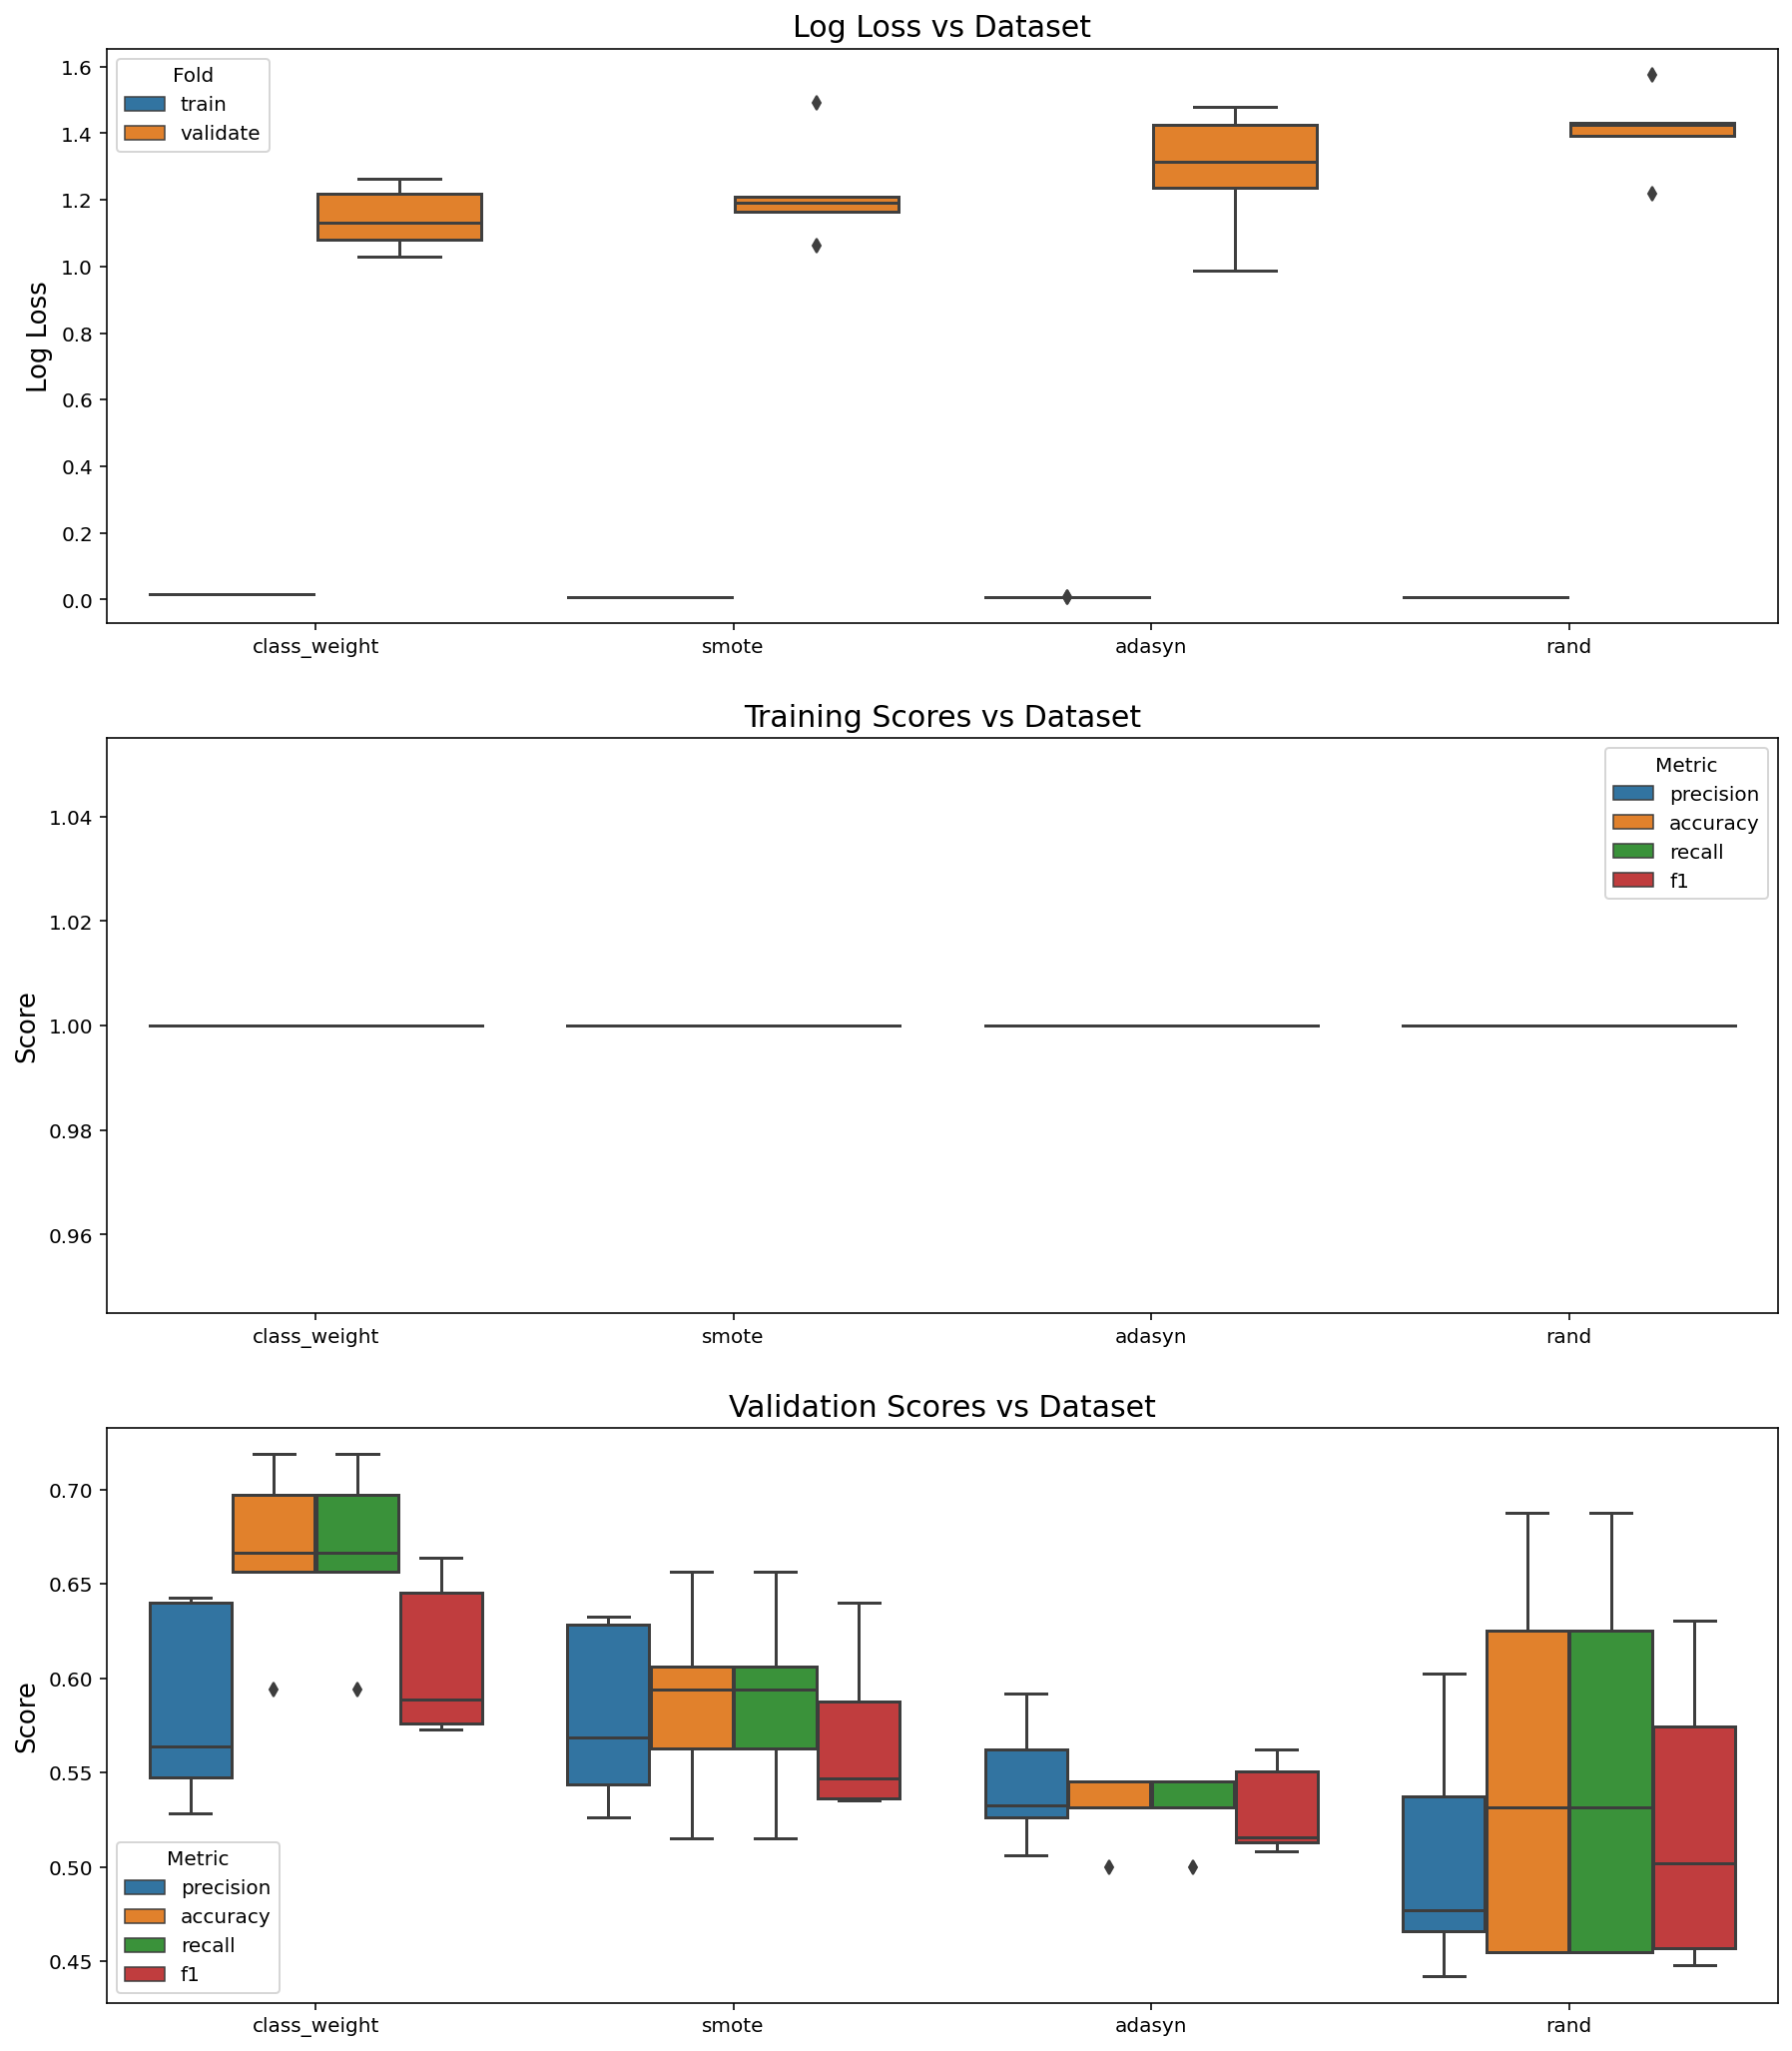

In [86]:
# Plot the metrics for training and validation datasets
plot_metrics(xgb_gs)

In [87]:
# Find training and validation metrics
xgb_gs_metrics_train,_ = prepare_metrics(xgb_gs, train_val='train')
xgb_gs_metrics_valid,_ = prepare_metrics(xgb_gs, train_val='validate')

# Combine metrics 
xgb_gs_metrics = pd.concat([xgb_gs_metrics_train,xgb_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
xgb_gs_metrics.dataset = xgb_gs_metrics.dataset+'_'+xgb_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
xgb_gs_metrics_mean = pd.DataFrame(columns=xgb_gs_metrics.metric.unique(),
                                  index=xgb_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in xgb_gs_metrics_mean.columns:
    for idx in xgb_gs_metrics_mean.index:
        avg = xgb_gs_metrics.loc[(xgb_gs_metrics.metric==col) & (xgb_gs_metrics.dataset==idx),'value']
        xgb_gs_metrics_mean.loc[idx,col] = avg.mean()
        
# Sort average metrics by accuracy, recall, and AUC
xgb_gs_metrics_mean.sort_values(by=metrics, ascending=False)

,precision,accuracy,recall,f1
class_weight_train,1,1,1,1
smote_train,1,1,1,1
adasyn_train,1,1,1,1
rand_train,1,1,1,1
class_weight_validate,0.584541,0.666477,0.666477,0.609422
smote_validate,0.579825,0.586742,0.586742,0.569206
adasyn_validate,0.54391,0.530682,0.530682,0.529904
rand_validate,0.504987,0.550568,0.550568,0.522324


In [88]:
# Fit grid search models with the best training dataset
# Class weight has better accuracy and recall values on validation
# Therefore, 'class_weight' is enabled
xgb_gs.fit(X_train_embed, y_train, class_weight=True)

In [89]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(xgb_gs.predictions, pd.DataFrame):
    xgb_gs.predict(X_test_embed, y_test)
    xgb_gs.predict(X_train_embed, y_train, train_test='train')
xgb_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.25325224, 0.24766949, 0.25097638, 0.248101...",1.378709,0.592593,0.570245,0.592593,0.575461
1,test,"[0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.25965273, 0.24303372, 0.25282234, 0.244491...",1.363914,0.592593,0.570245,0.592593,0.575461
2,test,"[0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.26583248, 0.23836322, 0.25481558, 0.240988...",1.349611,0.611111,0.591466,0.611111,0.597590
3,test,"[0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.27207807, 0.23391873, 0.2565065, 0.2374966...",1.335962,0.611111,0.591466,0.611111,0.597590
4,test,"[0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.27780855, 0.23077947, 0.2577185, 0.2336935...",1.322755,0.611111,0.591466,0.611111,0.597590


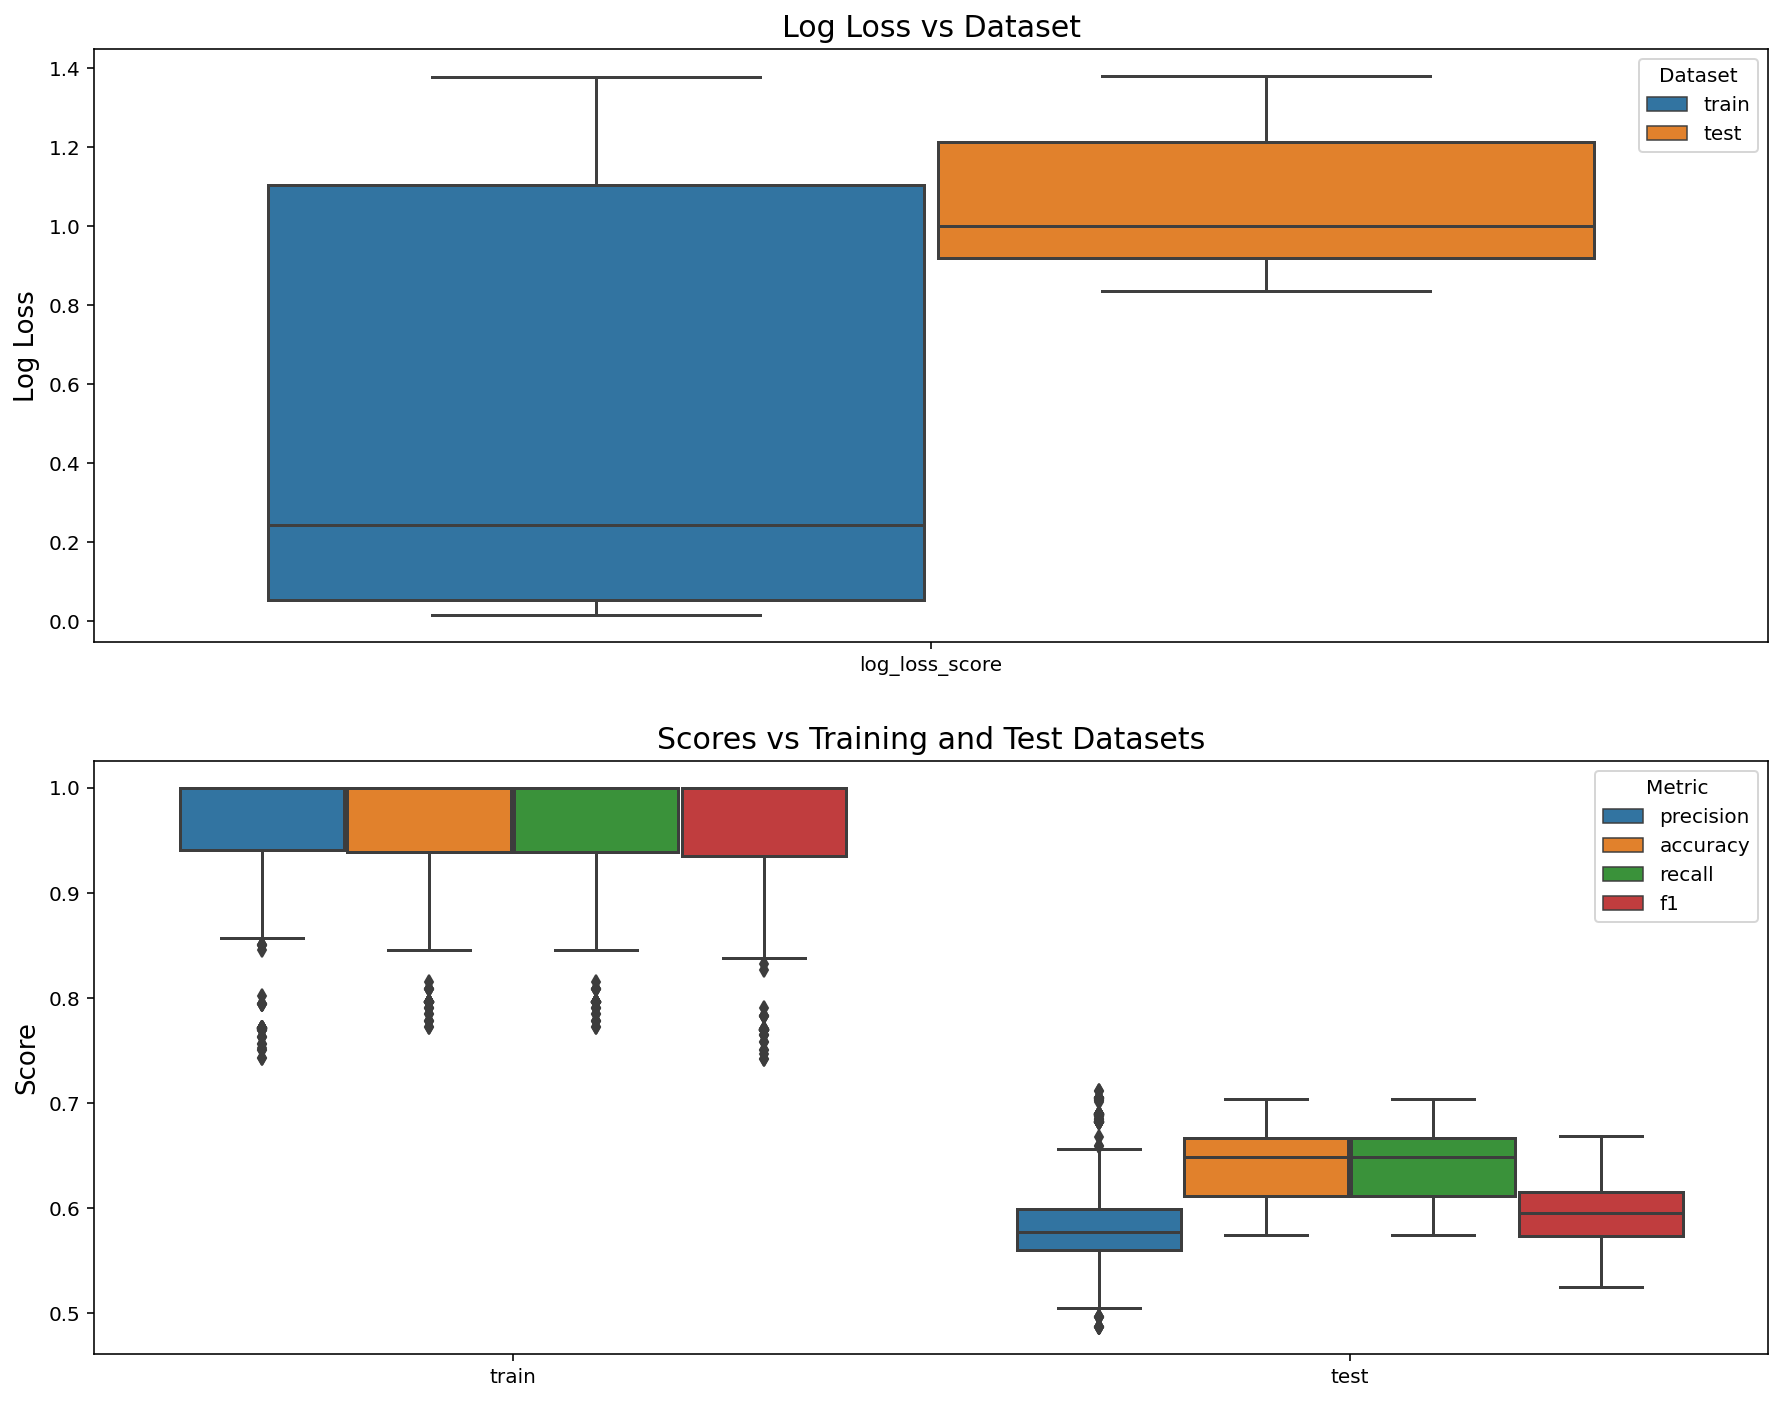

In [90]:
# Plot metrics for predicted values
plot_predictions(xgb_gs)

In [91]:
# Find the best model and model metrics based on given metrics 
best_xgb_model, best_xgb_model_metrics = xgb_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_xgb_model)

# Store best model metrics 
best_xgb_model_metrics = pd.DataFrame(best_xgb_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_xgb_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=90, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)>

In [92]:
# Best DT model metrics 
best_xgb_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,719,test,"[0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[0.38196194, 0.066153884, 0.34483507, 0.20704...",0.961695,0.703704,0.700241,0.703704,0.66801


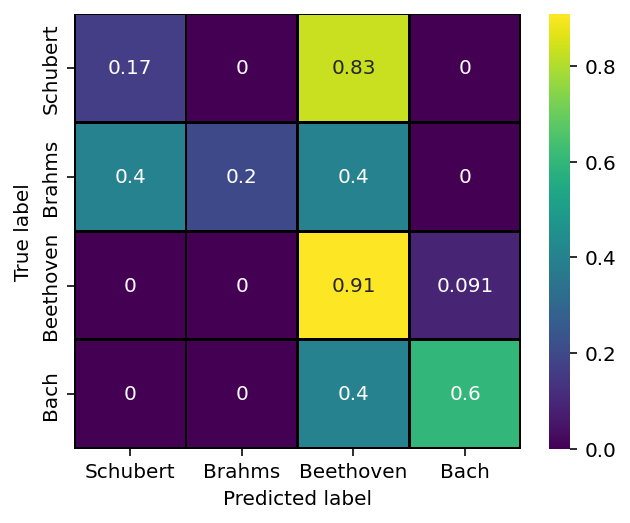

In [93]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_xgb_model_metrics.preds[0], normalize='true',
                     class_names=class_names);

XGBoost gave few false positive and false negative results. 

### Categorical Boosting 

For  Categorical Boosting (`CatBoost`), border count, depth, iterations, l2 leaf regularization and learning rate were used as grid parameters. Similar to `XGBoost`, `GPU` are also enabled. Class weights were rejected by the model as those parameters needed to be defined along with `fit` function, which were not implemented in the `Custom_GridSearchCV` class. Despite enabling `GPU`, CatBoost took the longest to run. 

In [94]:
# Set model name
model_name = 'CatBoostClassifier'

# Store model name 
model_names.append(model_name)

# Check if the variable exists
if 'models_cv' not in globals():
    # Define parameters ranges 
    params = {'border_count':[10,50,100,200],
              'depth':np.arange(1,11,2),          
              'iterations':[100,500,1000],
              'l2_leaf_reg':[1,5,10,100],
              'learning_rate':[0.001,0.01,0.1,0.3],
              'logging_level':["'Silent'"],
              'random_state':[str(SEED)],
              'task_type':["'GPU'"],
              'thread_count':[str(n_cpu)]}

    # Convert parameters to string 
    for key in params.keys():
        params[key] = [str(p) for p in params[key]]

    # Create a Custom_GridSearchCV instance
    cb_gs = CGS(model_name, param_grid=params)
else:
    # Load 'cb_gs' from models_cv 
    cb_gs = models_cv[model_name]

# Run cross-validation with accuracy as the primary scoring
rprt, rp_df, best_dataset = cb_gs.cross_validate(X_train_embed, y_train, 
                                                 scoring='accuracy',
                                                 SEED=SEED)

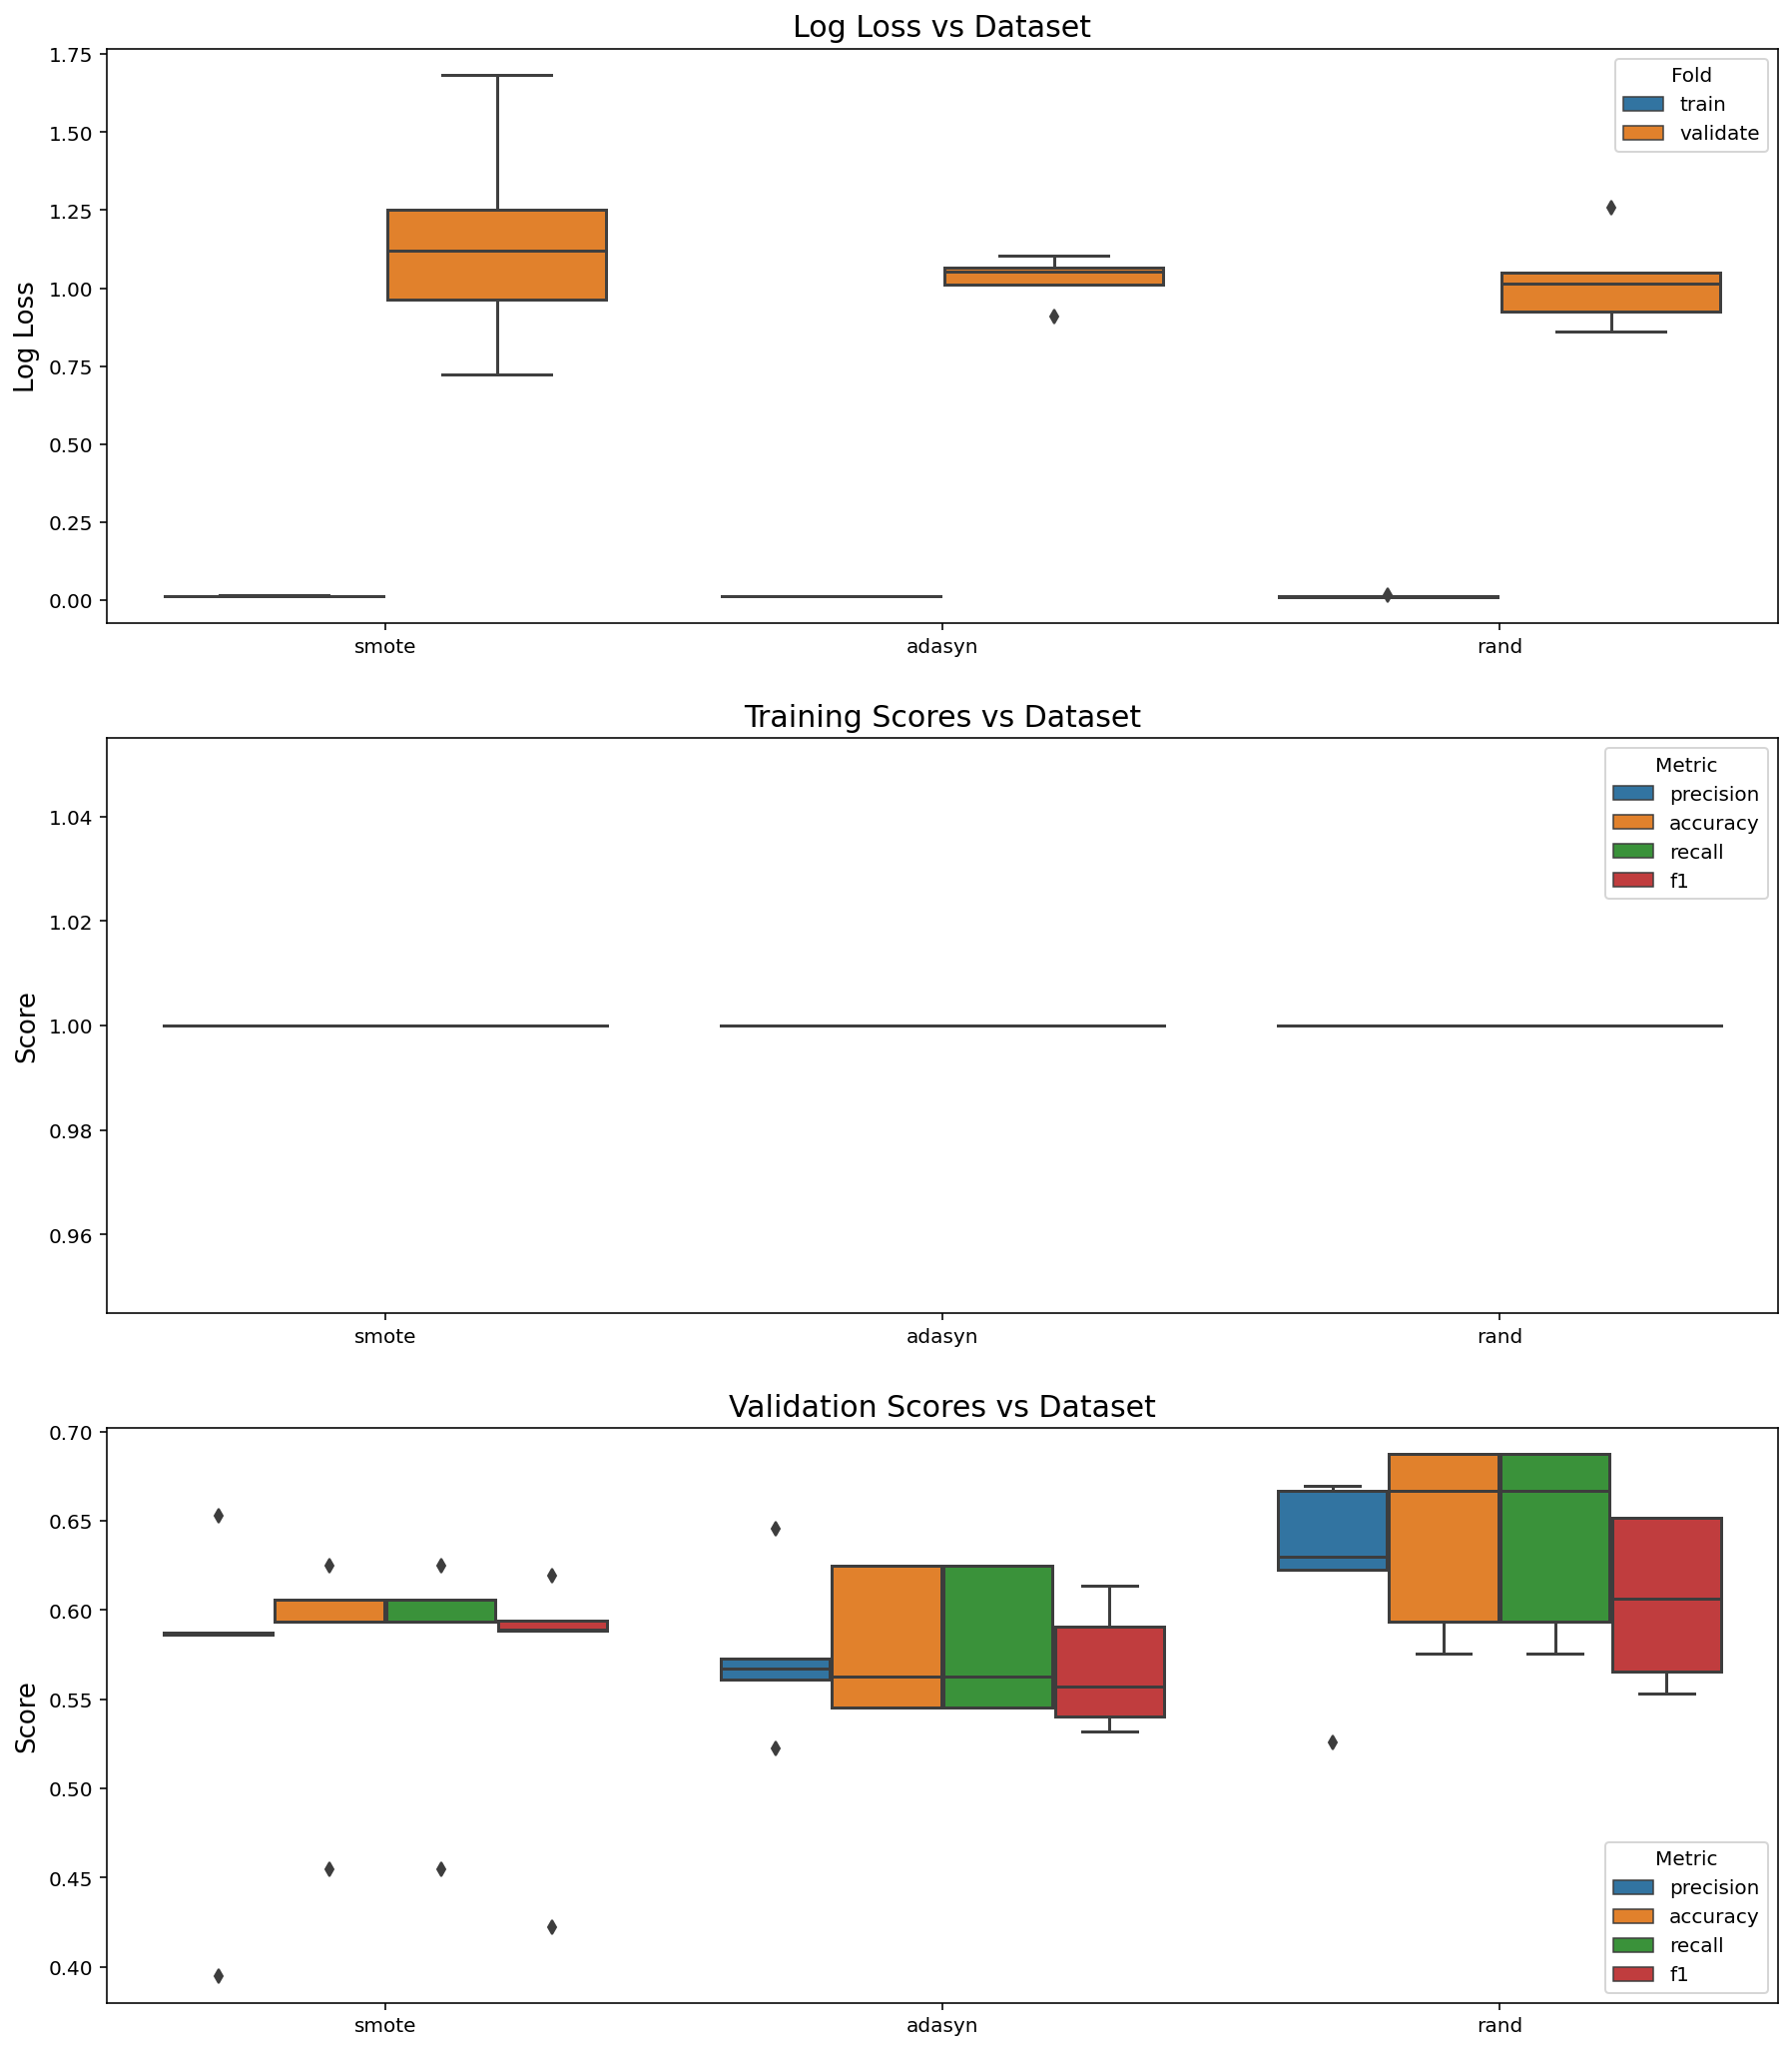

In [95]:
# Plot the metrics for training and validation datasets
plot_metrics(cb_gs)

In [96]:
# Find training and validation metrics
cb_gs_metrics_train,_ = prepare_metrics(cb_gs, train_val='train')
cb_gs_metrics_valid,_ = prepare_metrics(cb_gs, train_val='validate')

# Combine metrics 
cb_gs_metrics = pd.concat([cb_gs_metrics_train,cb_gs_metrics_valid])

# Rename dataset as 'dataset_train/validate'
cb_gs_metrics.dataset = cb_gs_metrics.dataset+'_'+cb_gs_metrics.train_val

# Create a placeholder dataframe to store the average values
cb_gs_metrics_mean = pd.DataFrame(columns=cb_gs_metrics.metric.unique(),
                                  index=cb_gs_metrics.dataset.unique())

# Iterate through each row and column, aggregate values and take the mean
for col in cb_gs_metrics_mean.columns:
    for idx in cb_gs_metrics_mean.index:
        avg = cb_gs_metrics.loc[(cb_gs_metrics.metric==col) & (cb_gs_metrics.dataset==idx),'value']
        cb_gs_metrics_mean.loc[idx,col] = avg.mean()
        
# Sort average metrics by recall, AUC and accuracy
cb_gs_metrics_mean.sort_values(by=metrics,ascending=False)

,precision,accuracy,recall,f1
smote_train,1,1,1,1
adasyn_train,1,1,1,1
rand_train,1,1,1,1
rand_validate,0.62313,0.642235,0.642235,0.605704
adasyn_validate,0.573867,0.580682,0.580682,0.56685
smote_validate,0.561592,0.574621,0.574621,0.562598


In [97]:
# Fit grid search models with the best training dataset
# SMOTE has better accuracy and recall values
# Therefore, 'class_weight' is disabled
cb_gs.fit(X_train_resam_rand, y_train_resam_rand)

In [98]:
# Predict test and training datasets 
# Also get the metrics of fit 
if not isinstance(cb_gs.predictions, pd.DataFrame):
    cb_gs.predict(X_test_embed, y_test)
    cb_gs.predict(X_train_resam_rand, y_train_resam_rand, train_test='train')
cb_gs.predictions.head()

,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,test,"[2, 3, 2, 2, 3, 1, 0, 2, 2, 2, 3, 3, 1, 3, 3, ...","[[0.25324452674147746, 0.24202474236210286, 0....",1.375366,0.407407,0.628439,0.407407,0.404022
1,test,"[2, 3, 3, 2, 3, 1, 0, 3, 2, 2, 3, 3, 1, 3, 3, ...","[[0.2602240785865084, 0.1889251119939562, 0.35...",1.296750,0.351852,0.651446,0.351852,0.332748
2,test,"[2, 1, 3, 0, 1, 1, 0, 3, 2, 2, 1, 1, 1, 1, 3, ...","[[0.25799445107701474, 0.1270885212828572, 0.3...",1.020786,0.555556,0.643573,0.555556,0.579029
3,test,"[3, 1, 3, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 3, ...","[[0.20406725678735307, 0.07865911788583843, 0....",0.998971,0.648148,0.690035,0.648148,0.663772
4,test,"[2, 3, 2, 2, 3, 1, 0, 2, 2, 2, 3, 3, 1, 3, 3, ...","[[0.252375134031546, 0.24323020008965487, 0.26...",1.376266,0.407407,0.628439,0.407407,0.404022


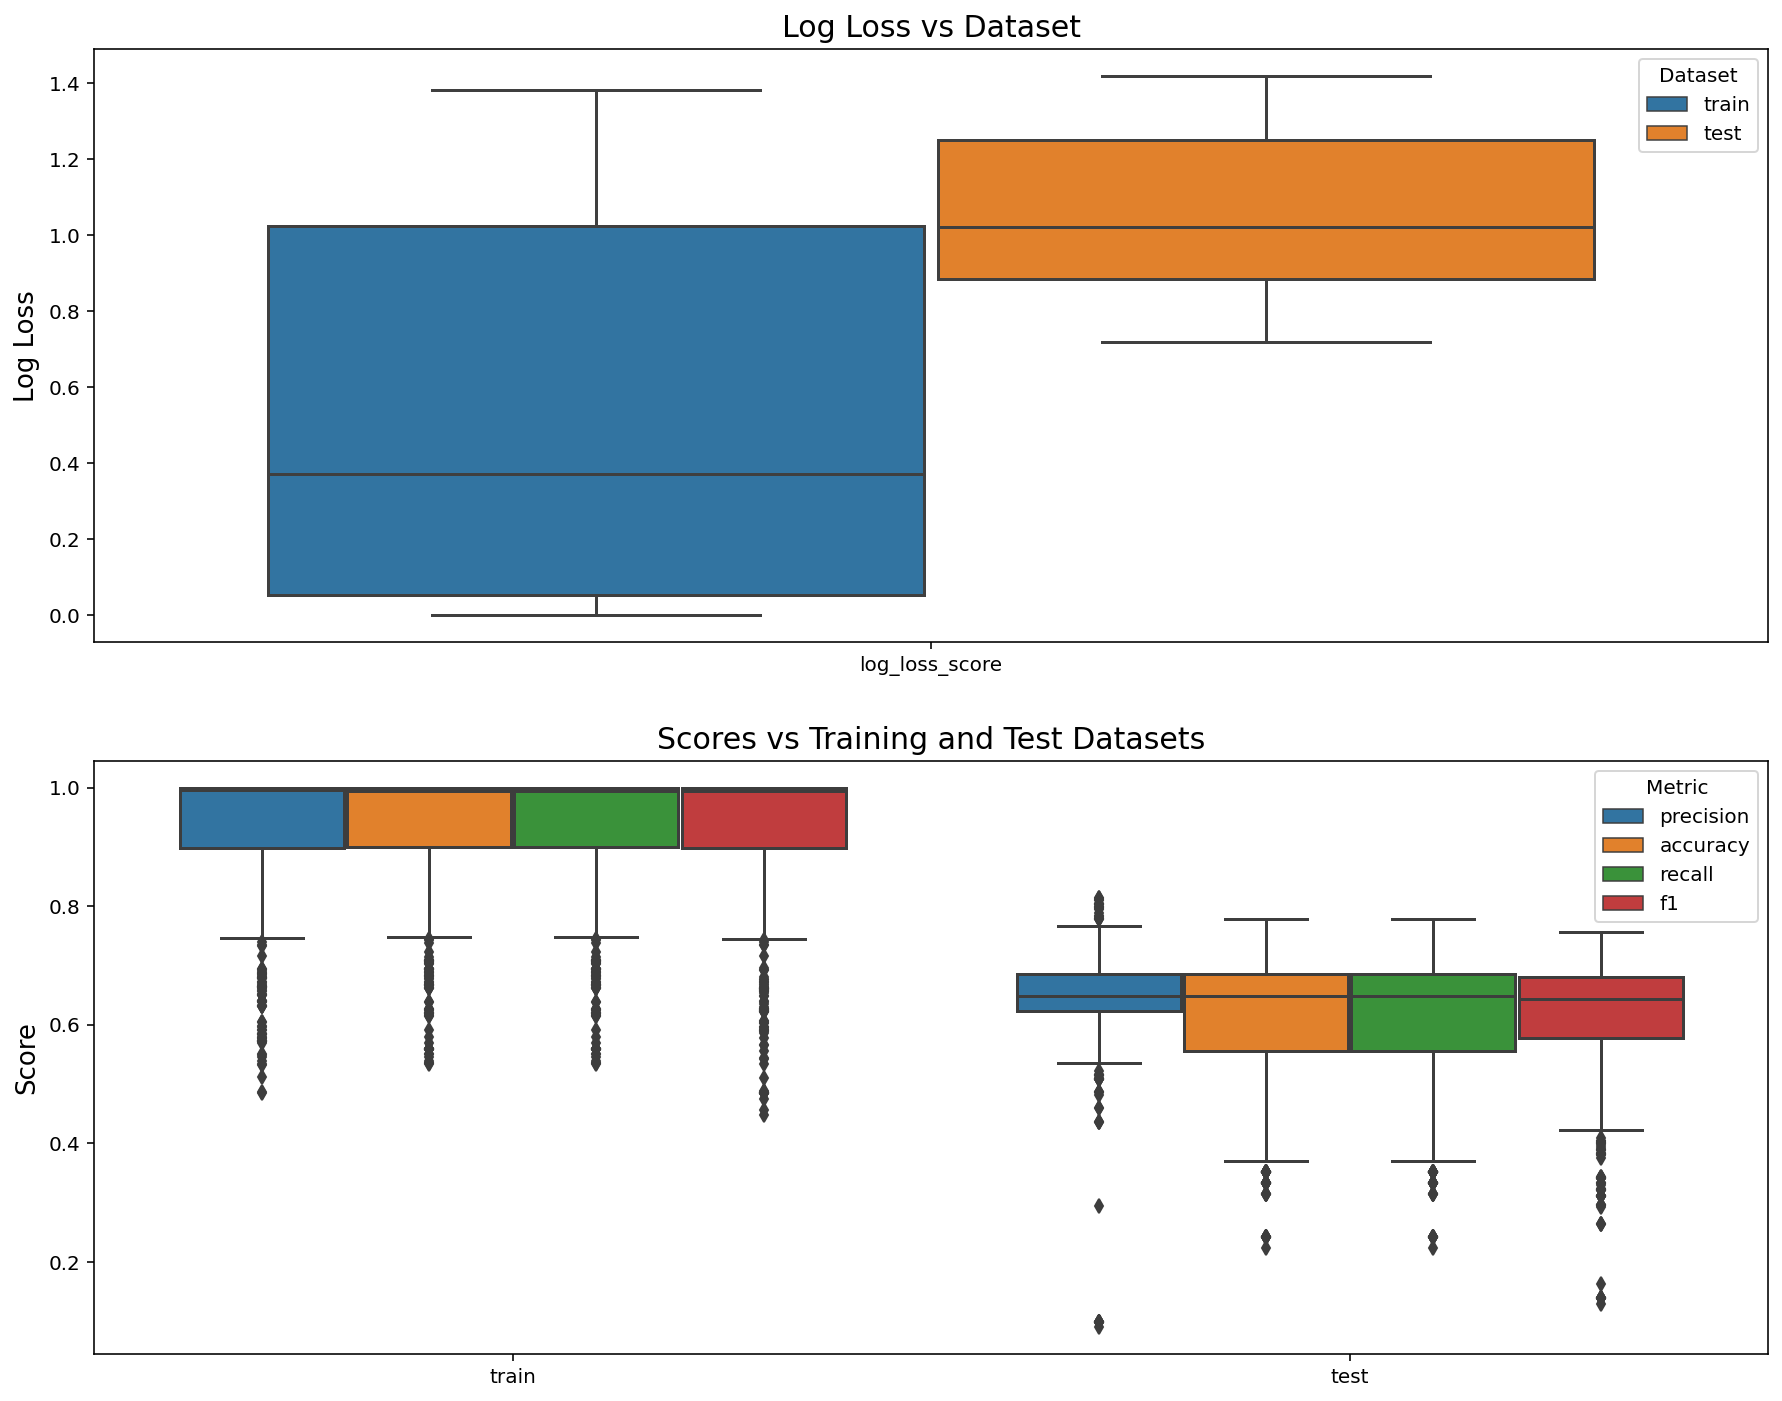

In [99]:
# Plot metrics for predicted values
plot_predictions(cb_gs)

In [100]:
# Find the best model and model metrics based on given metrics 
best_cb_model, best_cb_model_metrics = cb_gs.best_model(metrics=metrics)

# Store best model 
best_models.append(best_cb_model)

# Store best model metrics 
best_cb_model_metrics = pd.DataFrame(best_cb_model_metrics).transpose()
best_models_metrics = pd.concat([best_models_metrics,best_cb_model_metrics],
                               ignore_index=True)

# Display best model parameters 
best_cb_model.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostClassifier object at 0x000001D3F2EB32E0>>

In [101]:
# Best DT model metrics 
best_cb_model_metrics

,index,train_test,preds,prob_preds,log_loss_score,accuracy,precision,recall,f1
0,118,test,"[0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, ...","[[0.36434452351229973, 0.26369593949496783, 0....",0.83344,0.777778,0.809796,0.777778,0.75693


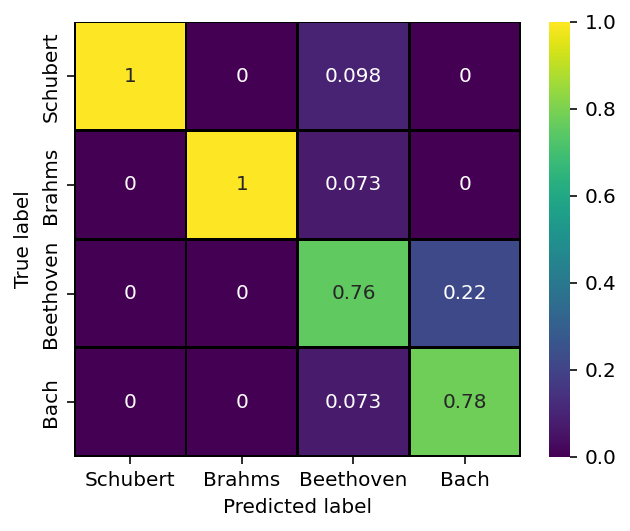

In [102]:
# Confusion matrix 
plot_confusion_matrix(y_test, best_cb_model_metrics.preds[0], normalize='pred', 
                      class_names=class_names);

So far, CatBoost also gave one of the best performing models. 

Now that all types of models are fitted, we can now save the grid search of each model to file. 

In [103]:
# Check if the 'data/model.pkl' exists
if not os.path.exists('data/model.pkl'):
    # Save models to file as a dictionary
    models_cv_list = [logreg_gs, knn_gs, svc_gs, dt_gs, rf_gs, ab_gs, xgb_gs, 
                      cb_gs]
    models_cv = dict(zip(model_names, models_cv_list))
    with open('data/model.pkl', 'wb') as f:    
        pickle.dump(models_cv, f)

Now that all the models are trained and the best models are selected, it is time to compare the metrics for these models and select the best one as a final model. 

# Evaluation

## Model Performances

The performance summary of the best models selected are summarized in the figures plotted below.

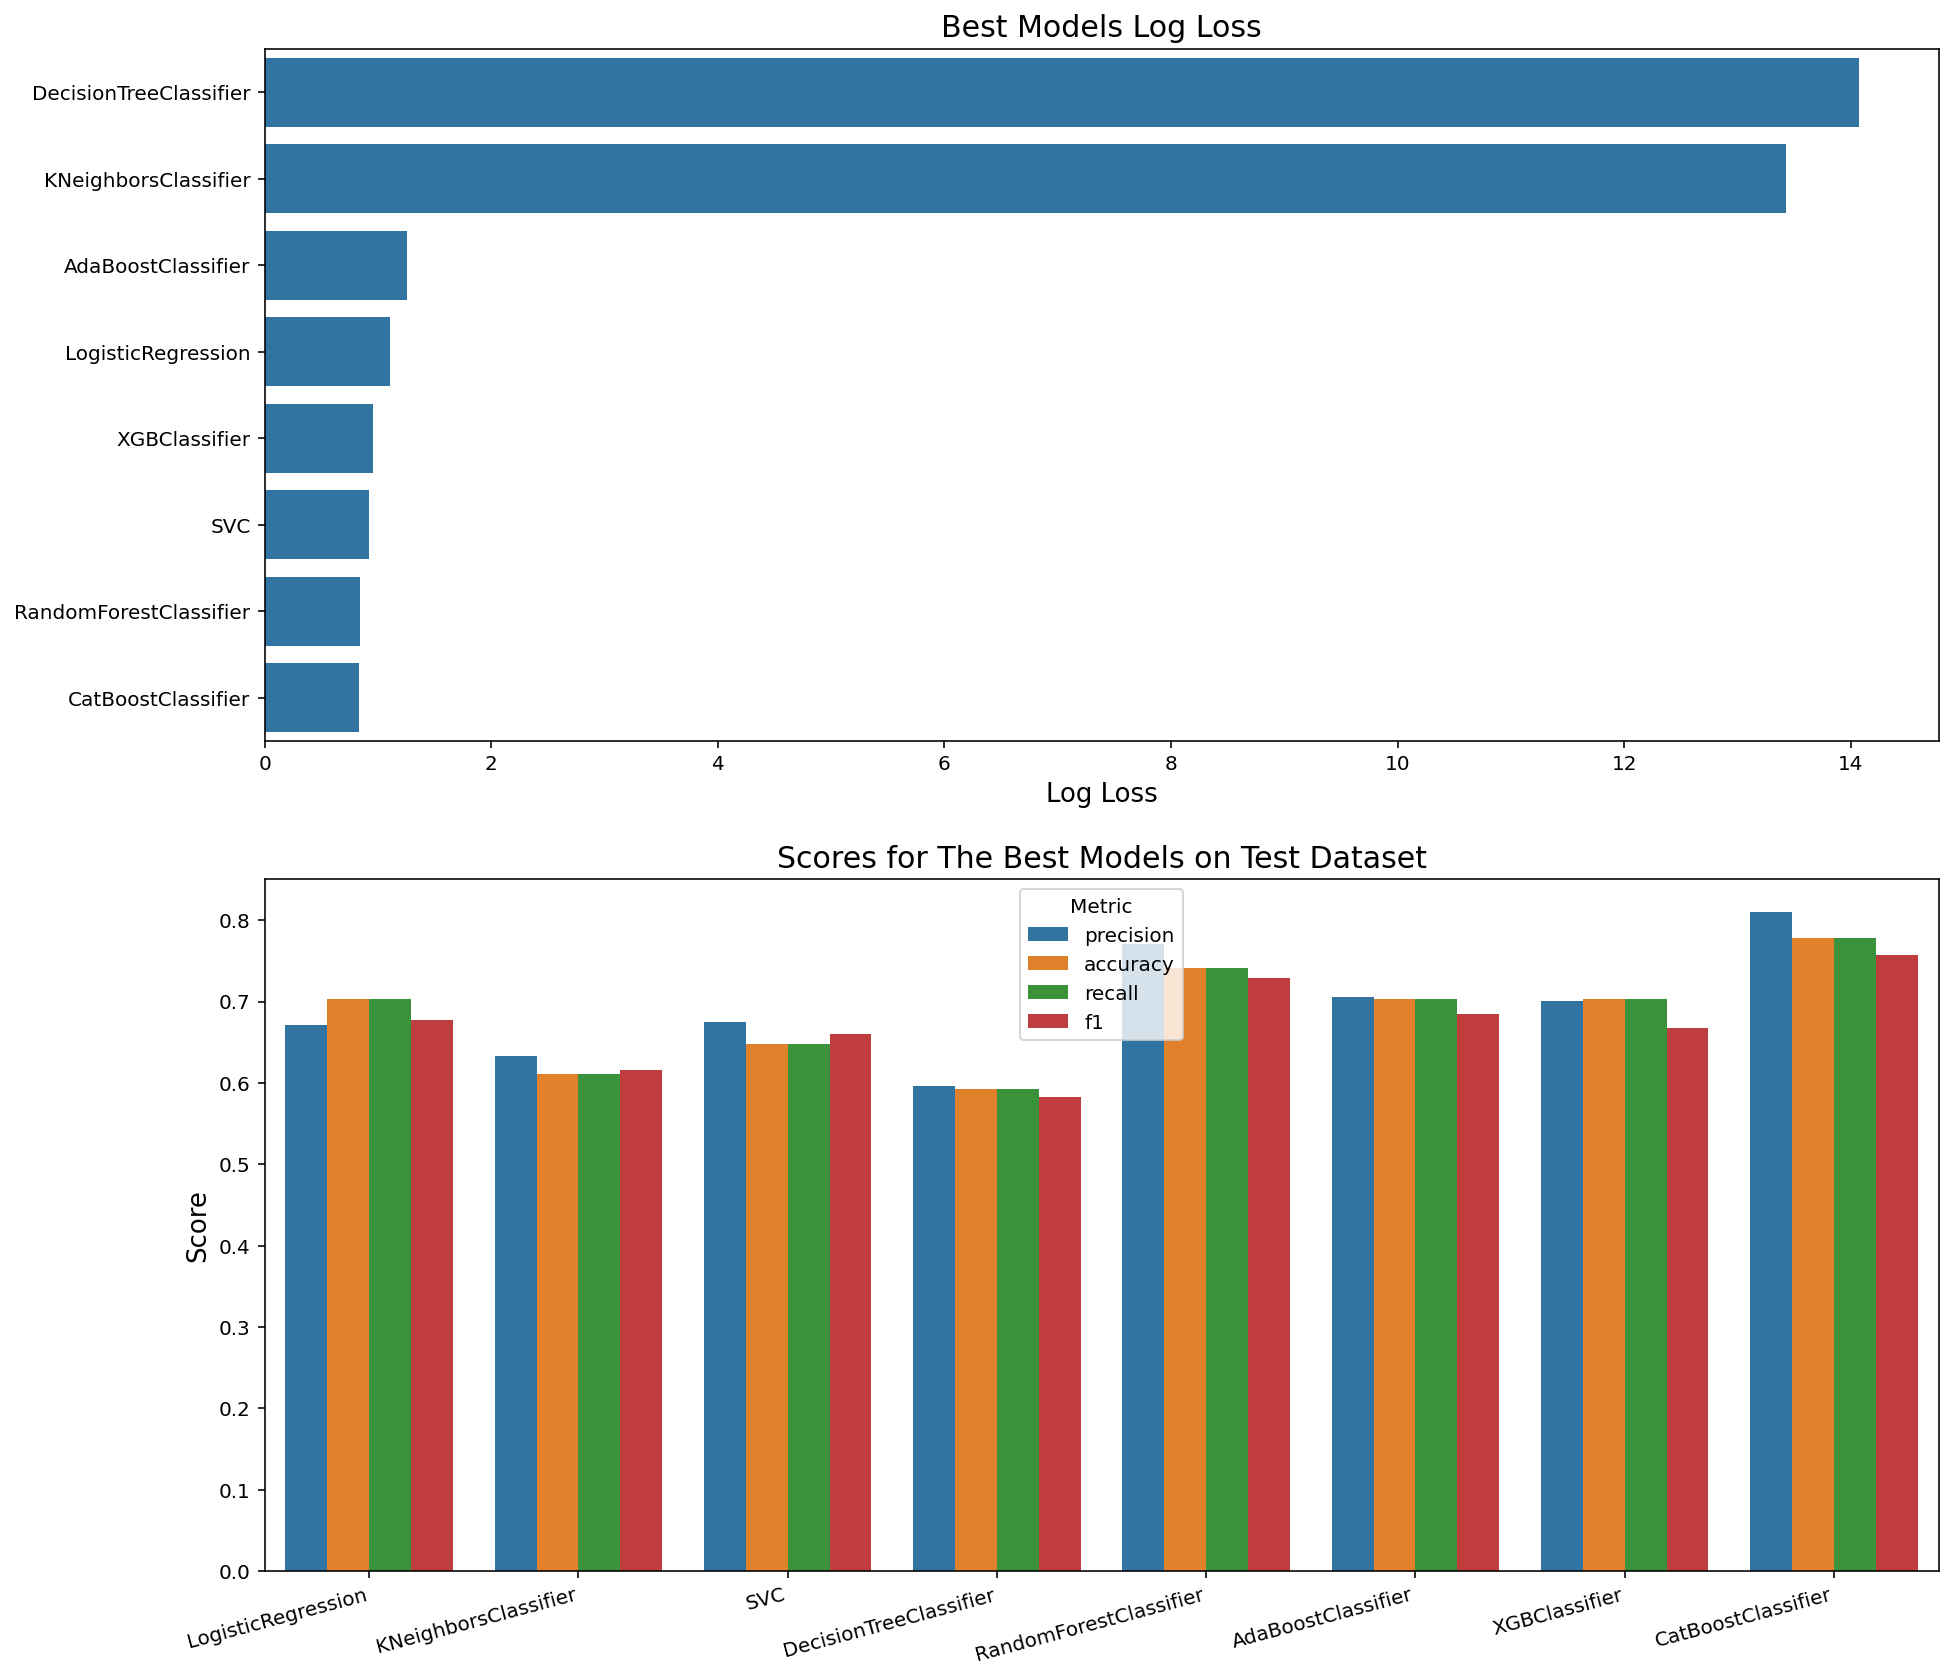

In [104]:
# Set columns 
columns = cb_gs_metrics_mean.columns

# Find the labels from the name of the models
labels = list(models_cv.keys())

# Set labels as indices 
best_models_metrics.index = labels

# Create figure to plot log loss and ROC curve 
fig, axes = plt.subplots(2 , 1, figsize=(15,14))

# Report dataframe
rep = pd.DataFrame([labels, best_models_metrics['log_loss_score']]).T
rep.columns = ['model','log_loss']
rep = rep.sort_values(by=['log_loss'], ascending=False)

# Log loss for the models  
g1 = sns.barplot(y=rep.model, x=rep.log_loss,
                 color='tab:blue',
                 ax=axes[0])

# Format labels and title 
g1.set_ylabel('')
g1.set_xlabel('Log Loss',fontsize=13)
g1.set_title('Best Models Log Loss',fontsize=15)

# Plot metrics for the models
report_df = pd.DataFrame(columns=['model','value','metric'])
for col in columns:
    tmp_df = pd.DataFrame(columns=report_df.columns)
    tmp_df.value = best_models_metrics.loc[:, col]
    tmp_df.model = best_models_metrics.index    
    tmp_df.metric = col
    report_df = pd.concat([report_df, tmp_df], ignore_index=True)

g3 = sns.barplot(x="model", y="value", hue="metric",
                     data=report_df, ax=axes[1])

# Format labels and title
g3.set_xlabel('')
g3.set_ylabel('Score', fontsize=13)
g3.set_title('Scores for The Best Models on Test Dataset',fontsize=15)
g3.legend(title='Metric');
g3.set_xticklabels(g3.get_xticklabels(), rotation=15, 
                  horizontalalignment='right')
# Save figure 
plt.savefig('images/best_model_performance.jpg');

## Final Model

In order to choose the best model, the area under the curve (`roc_auc`) is used a primary metric. The reason behind this decision is to elevate both accuracy and recall. 

In [105]:
# Copy best_models_metrics  
tmp_df = best_models_metrics.copy()

# Sort values by difference between accuracy and recall 
tmp_df = tmp_df.sort_values(by='accuracy', ascending=False)

# Reset index
tmp_df = tmp_df.reset_index()

# Select the index of the first in the table 
idx = tmp_df.loc[0,'level_0']

# Final model
final_model =  best_models[labels.index(idx)]

# Get predictions 
final_preds = tmp_df.loc[0,'preds']

# Print final model name and get parameters
print(labels[labels.index(idx)])
final_model.get_params()

CatBoostClassifier


{'iterations': 500,
 'learning_rate': 0.1,
 'depth': 5,
 'l2_leaf_reg': 5,
 'border_count': 10,
 'thread_count': 7,
 'logging_level': 'Silent',
 'task_type': 'GPU',
 'random_state': 123}

Looks like CatBoost classifier showed the highest metric. 

## Model Interpretation

Now that our model has been selected, it is time to explain the significance of each variable used to make the prediction. SHAP (Shapely values) is used to measure the importance of each feature and return the top `n` features that have the highest impact on the models. SHAP also provides feature importance, but it does so by creating a pseudo data based on some of the training and test datasets. By following those steps, we can learn more about the features that can actively influence our predictions. 

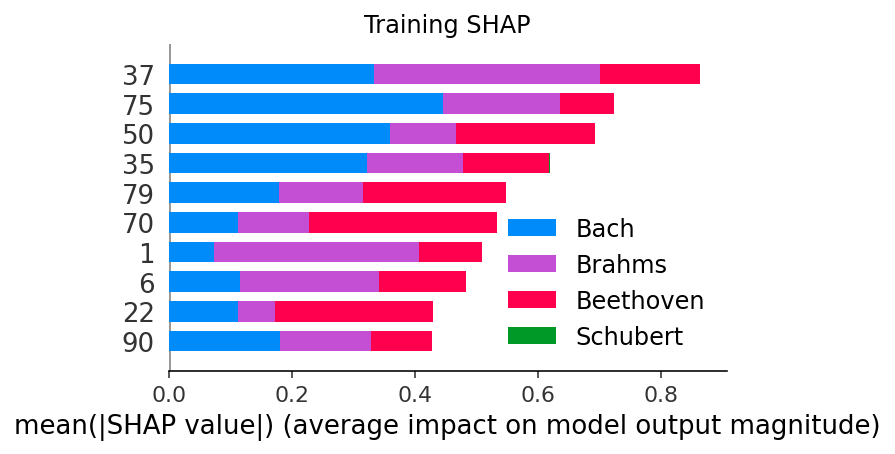

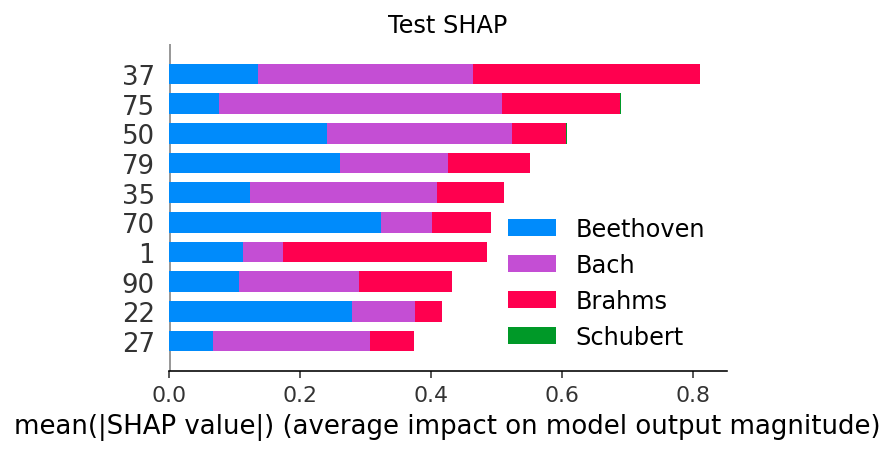

In [108]:
# Create a SHAP tree explainer plot to show impact magnitude 
# Bundle datasets and labels 
datasets = (X_train_resam_rand, X_test_embed)

# Intitialize labels
d_labels = ('Training SHAP', 'Test SHAP')

# Maximum feature display  
max_display = 10

# Iterate through each dataset and plot SHAP values
for i, dataset in enumerate(datasets):
    
    # Compute SHAP values 
    shap_values = shap.TreeExplainer(final_model).shap_values(dataset)
    
    # Set title
    plt.title(d_labels[i])
    
    # Display feature importance from SHAP values
    shap.summary_plot(shap_values, dataset, plot_type="bar",
                      plot_size=(5,3), max_display=max_display, 
                      class_names=class_names)

The two plots on training and test dataset show that **features 37, 75, 50, 35, 79, 70, 1, 90 and 22** have the highest impact on predicting the composer in both the training and test datasets. Only features **35, 50 and 75** appear to have higher impact in classifying Schubert. 

## Model Deployment

We can now move on to test the final model on unseen dataset in `PS2` folder. 

In [129]:
# Test folder path
test_path = 'MusicNet/PS2'

# MIDI information storing dict 
midi_files = {'title':[], 'harmonic_keys':[]}

# Iterate through each MIDI by the composer 
for _loc in os.listdir(test_path+'/'):
    # Find all .mid files 
    if _loc.endswith('.mid'):        
        # Some files cannot be read so 'try...except' is used here
        try:
            # Load MIDI file 
            midi_file = open_midi('/'.join([test_path,_loc]))
            # Perform harmonic reduction 
            harmonic = harmonic_reduction(midi_file)
            # Store values
            midi_files['title'].append(_loc.split('.mid')[0])
            midi_files['harmonic_keys'].append(harmonic)
        except:
            continue
# Convert dict to dataframe 
test_df = pd.DataFrame(midi_files)

In [131]:
# Show dataframe 
test_df.head()

,title,harmonic_keys
0,0.002716920481628_adj,"[i, vi, V65, i42, bvii, i42, IV65, bvii42, IV,..."
1,0.033313986422223163_adj,"[i, i, bi, i, v, v, bv, #vi, VII65, bi, i64, b..."
2,0.047574444458241216_adj,"[v, i, iii, #iii42, #iii65, I6, vi, vi42, V53,..."
3,0.06402123326764841_adj,"[i53, i6, III, i, V64, V64, v6, IV, IV53, iv, ..."
4,0.07186746659481313_adj,"[III, #iii, III, III42, i42, #iv, v, #iii, #ii..."


In [132]:
# Perform embedding
new_midi_embed = embedding(test_df.harmonic_keys)

When using the model, the probabilities of prediction are needed to be certain which midi files in the `PS2` folder are NOT written by those four composers. One way to do that is by taking the maximum probability for each file and see if it clears above a 0.5 threshold. 

In [133]:
# Get probabilites of prediction 
new_midi_preds = final_model.predict_proba(new_midi_embed)

Now, we can display the MIDI files that might not belong to any of the composers. 

In [148]:
# Display MIDI that are not confidently classified
idx = np.max(new_midi_preds,axis=1)<0.5
test_df.loc[idx].title

3     0.06402123326764841_adj
4     0.07186746659481313_adj
8     0.10630249969742178_adj
19    0.33695573887576447_adj
27     0.5807329043589801_adj
29     0.7491289879531658_adj
Name: title, dtype: object

Finally, the final model is saved for a possible web deployment. 

In [149]:
# Save the final model, scaler, continent_dict and features to file
# This pickle file is used for Flask deployment in the future 
summary = {'model':final_model, 'class_names':class_names}
with open('summary.pkl', 'wb') as f:    
    pickle.dump(summary, f)

Saving requirement files...

In [150]:
!pipreqs ./

INFO: Successfully saved requirements file in ./requirements.txt


# Conclusion and Recommendation

The final model was able to achieve 77.8% accuracy on the test dataset. However, it is possible to improve the prediction using neural networks, which were not implemented due to time constraint. In addition, the data imbalance has led to classifying fewer Schubert compositions compared to the rest. Another approach towards making classifications using regressive models instead of classifiers. In fact, this can greatly benefit in making predictions for MIDI files that were not composed by any of the composers. It would be interesting to investigate if more data that is balanced among the composers can benefit the prediction.

In this project, the harmonics were reduced to expedite embedding. It is possible that, by adding all notes, better prediction can be achieved. It is also important to note that arbitrary vector length of size 100 was considered to train the `Word2Vec` embedding. That can result in overfitting as more features are used to describe a composition. Even after accounting for class imbalance, in retrospect, taking that many features might not be a good approach. 

Lastly, as a recommendation, it would be interesting to compare the MIDI notes approach to some of the most common audio classification techniques, which is decomposing audio file to spectral power of frequencies using Fast Fourier Transforms (FFT) and employ spectrograms to identify notable frequencies and their levels. 